## Datasets & Params¶


In [ ]:
# Choose alpha value between 0-1
# ALPHA = 1.0

# Choose Dataset

# Experiment 1
# DATASET_NAME ='COMPAS_RACE_AM'

# Experiment 2
#DATASET_NAME = 'COMPAS_SEX'

# Experiment 3
# DATASET_NAME = 'ADULT_RACE'

# Experiment 4
#DATASET_NAME = 'ADULT_SEX'

# Experiment 5
# DATASET_NAME='CREDIT_SEX'

# Experiment 6
# DATASET_NAME = 'BANK_AGE'

# Experiment 7
#DATASET_NAME = 'RECRUIT_AGE'

# Experiment 8
# DATASET_NAME = 'RECRUIT_SEX'

# Experiment 9
#DATASET_NAME = 'DIABETES_SEX'

# Experiment 9
DATASET_NAME = 'NURSERY'

# Experiment 9
# DATASET_NAME = 'DEFAULT_CREDIT'

In [ ]:
# upload kaggle.json file using user prompt
from google.colab import files

uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))


Saving nursery.csv to nursery.csv
User uploaded file "nursery.csv" with length 1072398 bytes


## Imports

In [ ]:
! pip install ctgan
! pip install --upgrade category_encoders

from sklearn.preprocessing import MinMaxScaler

import time
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import category_encoders as ce
import math
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, auc, roc_auc_score, confusion_matrix
import os
from statistics import mean
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import StratifiedGroupKFold
from datetime import datetime
import pprint
import json



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 917.8 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 629.0 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━

## Fairness metrics and functions


In [ ]:
def print_metrics(y_gt, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_gt, y_pred).ravel()
    print('conf matrix:\n ', confusion_matrix(y_gt, y_pred) ,
          '\naccuracy: ', (tp+tn)/(tp+tn+fn+fp),
          'precision: ', tp/(tp+fp),
          'recall: ', tp/(tp+fn),
          'fpr: ', fp/(fp+tn),
          'tpr: ', tp /(tp + fn),
          'fn+fp', fn+fp)
    #returm fpr, tpr, accuracy
    return fp/(fp+tn), tp /(tp + fn), (tp+tn)/(tp+tn+fn+fp)

# bias metric - equal opportunity difference
def opportunity_diff_tpr(tpr1, tpr2):
    return abs(tpr1-tpr2)

# bias metric - equal opportunity difference
def opportunity_diff_fpr(fpr1, fpr2):
    return abs(fpr1-fpr2)

# bias metric - avarage absolute odds difference
def odds_diff(tpr1, tpr2, fpr1, fpr2):
    return 0.5*(abs(tpr2-tpr1) + abs(fpr2-fpr1))

# bias metric - statistical parity difference
def parity_diff(y_pred_0, y_pred_1):
    return abs(len(y_pred_0)/(len(y_pred_0)+len(y_pred_1)) - len(y_pred_1)/(len(y_pred_1)+len(y_pred_0)))


    # bias metric - Disparate impact
def disparate_impact(y_pred_0, y_pred_1):
    return 1
    #return min((len(y_pred_0)/len(y_pred_0+y_pred_1)) / (len(y_pred_1)/len(y_pred_1+len(y_pred_0)))
    #,(len(y_pred_1)/len(y_pred_0+y_pred_1)) / (len(y_pred_0)/len(y_pred_1+len(y_pred_0))))

def fairness_metrics_roc_auc_std(data , y):
    clf = RandomForestClassifier(n_estimators=10, max_depth=5, random_state=1234)

    cv = StratifiedKFold(n_splits=5, random_state=1234, shuffle=True)
    results = pd.DataFrame(columns=['training_score', 'test_score'])

    fprs, tprs, scores, op_list ,op_f_list, od_list ,par_dif_list,dis_impact_list, acc_list = [], [], [], [],[], [], [],[],[]

    start_time = datetime.now()
    for (train, test), i in zip(cv.split(data, y), range(5)):
        clf.fit(data.iloc[train], y.iloc[train])
        _, _, auc_score_train = compute_roc_auc(train,clf, data, y)
        fpr, tpr, auc_score = compute_roc_auc(test,clf, data, y)
        scores.append((auc_score_train, auc_score))
        fprs.append(fpr)
        tprs.append(tpr)
        y_pred = clf.predict(data.iloc[test])
        o_p, o_p_fpr, o_d ,par_dif, dis_impact, acc_ = calc_bias(data.iloc[test],  y.iloc[test], PRIV_FEATURE,y_pred, 'subexperiment - baseline Ensemble'+' model:'+str(i))
        acc_list.append(acc_)
        op_list.append(o_p)
        op_f_list.append(o_p_fpr)
        od_list.append(o_d)
        par_dif_list.append(par_dif)
        dis_impact_list.append(dis_impact)

    std_op = np.std(op_list)
    op_str = f"{mean(op_list):.3f} ± {std_op:.3f}"

    std_op_f = np.std(op_f_list)
    op_f_str = f"{mean(op_f_list):.3f} ± {std_op_f:.3f}"

    std_od = np.std(od_list)
    od_str = f"{mean(od_list):.3f} ± {std_od:.3f}"

    std_par_dif = np.std(par_dif_list)
    par_dif_str = f"{mean(par_dif_list):.3f} ± {std_par_dif:.3f}"

    std_dis_impact = np.std(dis_impact_list)
    dis_imp_str = f"{mean(dis_impact_list):.3f} ± {std_dis_impact:.3f}"


    std_acc = np.std(acc_list)
    acc_str = f"{mean(acc_list):.3f} ± {std_acc:.3f}"
    time_elapsed_baseline = datetime.now() - start_time
    plot_roc_curve(fprs, tprs);
    pd.DataFrame(scores, columns=['AUC Train', 'AUC Test'])
    print('Accaracy list : ', acc_list)
    print('equal opportunity for tpr : ', op_list)
    print('equal opportunity for fpr : ',op_f_list)
    print('odds difference list : ' , od_list)
    print('The mean accuracy is ', acc_str)
    print('The mean equal opportunity for tpr: (close to 0)', op_str)
    print('The mean equal opportunity for fpr: (close to 0)', op_f_str)
    print('The mean odds difference: (close to 0)',od_str)
    print('The mean parity difference: (close to 0)', par_dif_str)
    print('The mean disperate impact: (close to 1)',dis_imp_str)

    return acc_str, op_str, op_f_str ,od_str,par_dif_str , dis_imp_str

In [ ]:
# calculate the bias of divided dataset by the privileged feature
def calc_bias(data,y, priv_feature,y_pred, experiment_text):
    data_full =  pd.concat([data, y], axis=1)
    data_full['y_pred'] = y_pred

    label = TARGET_COL
    # print('performance for whole ds:'+ experiment_text)
    fpr, tpr, acc = print_metrics(data_full[TARGET_COL], data_full['y_pred'] )

    feature_cat_list = list(data[priv_feature].unique())
    #print(feature_cat_list)
    valid_cat0 = data_full[data_full[priv_feature]==feature_cat_list[0]]
    valid_cat1 = data_full[data_full[priv_feature]==feature_cat_list[1]]
    # print('performance for 0 sub-group:')
    fpr_0, tpr_0 , acc_0 = print_metrics(valid_cat0[TARGET_COL], valid_cat0['y_pred'])
    # print('performance for 1 sub-group:')

    fpr_1, tpr_1, acc_1 = print_metrics(valid_cat1[TARGET_COL], valid_cat1['y_pred'])
    op_diff = opportunity_diff_tpr(tpr_0, tpr_1)
    op_diff_fpr = opportunity_diff_fpr(fpr_0, fpr_1)
    od_diff = odds_diff(tpr_0, tpr_1, fpr_0, fpr_1)
    par_diff = parity_diff(valid_cat0[valid_cat0['y_pred']==1], valid_cat1[valid_cat1['y_pred']==1])
    dis_impact = disparate_impact(valid_cat0[valid_cat0['y_pred']==1], valid_cat1[valid_cat1['y_pred']==1])
    # print('bias metrics:')
    # print('equal opportunity for tpr: (close to 0)', op_diff)
    # print('equal opportunity for fpr: (close to 0)', op_diff_fpr)
    # print('avarage absolute odds difference: (close to 0)',od_diff)
    # print('statistical parity difference: (close to 0) ',par_diff)
    # print('disparate_impact: (close to 1) ',dis_impact)


    return (op_diff,op_diff_fpr, od_diff,par_diff ,dis_impact,acc)

In [ ]:
def fairness_metrics_roc_auc(data , y):
    clf = RandomForestClassifier(n_estimators=10, max_depth=5, random_state=1234)

    cv = StratifiedKFold(n_splits=5, random_state=1234, shuffle=True)
    results = pd.DataFrame(columns=['training_score', 'test_score'])

    fprs, tprs, scores, op_list ,op_f_list, od_list ,par_dif_list,dis_impact_list, acc_list = [], [], [], [],[], [], [],[],[]

    start_time = datetime.now()
    for (train, test), i in zip(cv.split(data, y), range(5)):
        clf.fit(data.iloc[train], y.iloc[train])
        _, _, auc_score_train = compute_roc_auc(train,clf, data, y)
        fpr, tpr, auc_score = compute_roc_auc(test,clf, data, y)
        scores.append((auc_score_train, auc_score))
        fprs.append(fpr)
        tprs.append(tpr)
        y_pred = clf.predict(data.iloc[test])
        o_p, o_p_fpr, o_d ,par_dif, dis_impact, acc_ = calc_bias(data.iloc[test],  y.iloc[test], PRIV_FEATURE,y_pred, 'subexperiment - baseline Ensemble'+' model:'+str(i))
        acc_list.append(acc_)
        op_list.append(o_p)
        op_f_list.append(o_p_fpr)
        od_list.append(o_d)
        par_dif_list.append(par_dif)
        dis_impact_list.append(dis_impact)

    std_op = np.std(op_list)
    op_str = f"{mean(op_list):.3f} ± {std_op:.3f}"

    std_op_f = np.std(op_f_list)
    op_f_str = f"{mean(op_f_list):.3f} ± {std_op_f:.3f}"

    std_od = np.std(od_list)
    od_str = f"{mean(od_list):.3f} ± {std_od:.3f}"

    std_par_dif = np.std(par_dif_list)
    par_dif_str = f"{mean(par_dif_list):.3f} ± {std_par_dif:.3f}"

    std_dis_impact = np.std(dis_impact_list)
    dis_imp_str = f"{mean(dis_impact_list):.3f} ± {std_dis_impact:.3f}"


    std_acc = np.std(acc_list)
    acc_str = f"{mean(acc_list):.3f} ± {std_acc:.3f}"
    time_elapsed_baseline = datetime.now() - start_time
    plot_roc_curve(fprs, tprs);
    pd.DataFrame(scores, columns=['AUC Train', 'AUC Test'])
    print('Accaracy list : ', acc_list)
    print('equal opportunity for tpr : ', op_list)
    print('equal opportunity for fpr : ',op_f_list)
    print('odds difference list : ' , od_list)
    print('The mean accuracy is ', acc_str)
    print('The mean equal opportunity for tpr: (close to 0)', op_str)
    print('The mean equal opportunity for fpr: (close to 0)', op_f_str)
    print('The mean odds difference: (close to 0)',od_str)
    print('The mean parity difference: (close to 0)', par_dif_str)
    print('The mean disperate impact: (close to 1)',dis_imp_str)

    return acc_list, op_list, op_f_list ,od_list,par_dif_list , dis_impact_list

In [ ]:
def fairness_metrics_roc_auc_no_print(data , y):
    clf = RandomForestClassifier(n_estimators=10, max_depth=5,random_state=1234)

    cv = StratifiedKFold(n_splits=5, random_state=1234, shuffle=True)
    results = pd.DataFrame(columns=['training_score', 'test_score'])

    fprs, tprs, scores, op_list ,op_f_list, od_list ,par_dif_list,dis_impact_list, acc_list = [], [], [], [],[], [], [],[],[]

    start_time = datetime.now()
    for (train, test), i in zip(cv.split(data, y), range(5)):
        clf.fit(data.iloc[train], y.iloc[train])
        _, _, auc_score_train = compute_roc_auc(train,clf, data, y)
        fpr, tpr, auc_score = compute_roc_auc(test,clf, data, y)
        scores.append((auc_score_train, auc_score))
        fprs.append(fpr)
        tprs.append(tpr)
        y_pred = clf.predict(data.iloc[test])
        o_p, o_p_fpr, o_d ,par_dif, dis_impact, acc_ = calc_bias(data.iloc[test],  y.iloc[test], PRIV_FEATURE,y_pred, 'subexperiment - baseline Ensemble'+' model:'+str(i))
        acc_list.append(acc_)
        op_list.append(o_p)
        op_f_list.append(o_p_fpr)
        od_list.append(o_d)
        par_dif_list.append(par_dif)
        dis_impact_list.append(dis_impact)

    return acc_list, op_list, op_f_list ,od_list,par_dif_list , dis_impact_list

## Roc & AUC functions¶


In [ ]:
def plot_roc_curve(fprs, tprs):
    """Plot the Receiver Operating Characteristic from a list
    of true positive rates and false positive rates."""

    # Initialize useful lists + the plot axes.
    tprs_interp = []
    aucs, acc = [], []
    mean_fpr = np.linspace(0, 1, 100)
    f, ax = plt.subplots(figsize=(14,10))

    # Plot ROC for each K-Fold + compute AUC scores.
    for i, (fpr, tpr) in enumerate(zip(fprs, tprs)):
        tprs_interp.append(np.interp(mean_fpr, fpr, tpr))
        tprs_interp[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        ax.plot(fpr, tpr, lw=1, alpha=0.3,
                 label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    # Plot the luck line.
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
             label='Luck', alpha=.8)

    # Plot the mean ROC.
    mean_tpr = np.mean(tprs_interp, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
             label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
             lw=2, alpha=.8)

    # Plot the standard deviation around the mean ROC.
    std_tpr = np.std(tprs_interp, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                     label=r'$\pm$ 1 std. dev.')

    # Fine tune and show the plot.
    ax.set_xlim([-0.05, 1.05])
    ax.set_ylim([-0.05, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic')
    ax.legend(loc="lower right")
    plt.show()
    return (f, ax)

def compute_roc_auc(index,clf ,data, y):
    y_predict = clf.predict_proba(data.iloc[index])[:,1]
    fpr, tpr, thresholds = roc_curve(y.iloc[index], y_predict)
    auc_score = auc(fpr, tpr)
    return fpr, tpr, auc_score

In [ ]:
if DATASET_NAME == 'ADULT_SEX':
    TARGET_COL = 'income'
    PRIV_FEATURE = "sex"
    PRIV_CLASS = 1
    PRIV_VALUE_FEATURE = 1
    orig_data = pd.read_csv('/content/adult.csv')
    orig_data[TARGET_COL] = orig_data[TARGET_COL].apply(lambda x: 0 if x == '<=50K' else 1)
    orig_data['sex'] = np.where(orig_data['sex'] == 'Male', 1,0)
    orig_data.replace('?',np.nan,inplace = True)
    orig_data.dropna(how='any',inplace = True)
    orig_data.drop_duplicates()
    orig_data.reset_index(inplace=True, drop=True)

    privileged_groups = [{'sex': 1}] # Male
    unprivileged_groups = [{'sex': 0}] # Female

    feature_columns = ['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country']

    CATEGORICAL = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'native.country']


elif DATASET_NAME == 'ADULT_RACE':
    TARGET_COL = 'income'
    PRIV_FEATURE = "black"
    PRIV_CLASS = 1
    PRIV_VALUE_FEATURE = 1
    orig_data = pd.read_csv('/content/adult.csv')
    orig_data[TARGET_COL] = orig_data[TARGET_COL].apply(lambda x: 0 if x == '<=50K' else 1)
    orig_data['sex'] = np.where(orig_data['sex'] == 'Male', 1,0)
    orig_data['black'] = np.where(orig_data['race'] == 'Black', 0,1)
    orig_data.replace('?',np.nan,inplace = True)
    orig_data.dropna(how='any',inplace = True)
    orig_data.drop_duplicates()
    orig_data.reset_index(inplace=True, drop=True)

    feature_columns = ['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country', 'black']

    CATEGORICAL = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'native.country']

elif DATASET_NAME =='COMPAS_RACE_AM':
    orig_data = pd.read_csv('/content/compas-scores-two-years_v1.csv')
    orig_data = orig_data[((orig_data['days_b_screening_arrest'] <=30) &
      (orig_data['days_b_screening_arrest'] >= -30) &
      (orig_data['is_recid'] != -1) &
      (orig_data['c_charge_degree'] != 'O') &
      (orig_data['score_text'] != 'N/A')
     )]
    TARGET_COL = 'two_year_recid'
    orig_data['sex'] = np.where(orig_data['sex'] == 'Male', 1, 0)
    orig_data['am'] = np.where(orig_data['race'] == 'African-American', 1,0)
    PRIV_FEATURE = 'am'
#     PRIV_FEATURE = 'sex'
    PRIV_CLASS = 0
    PRIV_VALUE_FEATURE = 0
    feature_columns = ['age', 'c_charge_degree', 'race', 'age_cat', 'score_text', 'sex', 'priors_count',
               'days_b_screening_arrest', 'decile_score','am']
    CATEGORICAL = [ 'age_cat', 'race', 'c_charge_degree', 'score_text']



elif DATASET_NAME =='COMPAS_SEX':
    orig_data = pd.read_csv('/content/compas-scores-two-years_v1.csv')
    orig_data = orig_data[((orig_data['days_b_screening_arrest'] <=30) &
      (orig_data['days_b_screening_arrest'] >= -30) &
      (orig_data['is_recid'] != -1) &
      (orig_data['c_charge_degree'] != 'O') &
      (orig_data['score_text'] != 'N/A')
     )]
    TARGET_COL = 'two_year_recid'
    orig_data['sex'] = np.where(orig_data['sex'] == 'Male', 1, 0)
    orig_data['am'] = np.where(orig_data['race'] == 'African-American', 1,0)
    PRIV_FEATURE = 'sex'
    PRIV_CLASS = 0
    PRIV_VALUE_FEATURE = 0
    feature_columns = ['age', 'c_charge_degree', 'race', 'age_cat', 'score_text', 'sex', 'priors_count',
               'days_b_screening_arrest', 'decile_score','am']
    CATEGORICAL = [ 'age_cat', 'race', 'c_charge_degree', 'score_text']


elif DATASET_NAME == 'CREDIT_SEX':
    orig_data = pd.read_csv('/content/german_credit_data.csv')
    TARGET_COL = 'Risk'
    PRIV_FEATURE = 'Sex'
    PRIV_CLASS = 1
    PRIV_VALUE_FEATURE = 0
    orig_data[TARGET_COL] = orig_data[TARGET_COL].apply(lambda x: 0 if x == 'bad' else 1)
    orig_data['Sex'] = np.where(orig_data['Sex'] == 'male', 0,1)
    orig_data = orig_data.drop(["Unnamed: 0"],axis=1)
    orig_data['young'] = orig_data['Age'].apply(lambda x: 0 if x < 25 else 1)
    CATEGORICAL = ['Housing', 'Saving accounts' , 'Checking account', 'Purpose']
    feature_columns = ['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account','Credit amount', 'Duration', 'Purpose']

elif DATASET_NAME =='BANK_AGE':
    orig_data = pd.read_csv('/content/bank.csv')
    TARGET_COL = 'deposit'
    orig_data[TARGET_COL] = orig_data[TARGET_COL].apply(lambda x: 0 if x == 'no' else 1)

    orig_data['age_cat'] = np.where(((pd.to_numeric(orig_data['age']) > 65) |  (pd.to_numeric(orig_data['age']) < 25)), 0,1)
    PRIV_FEATURE = 'age_cat'
    PRIV_VALUE_FEATURE = 0
    PRIV_CLASS = 1
    feature_columns = ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'age_cat',
       'previous', 'poutcome']
    CATEGORICAL = [ 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month','poutcome']

elif DATASET_NAME == 'RECRUIT_AGE':
    orig_data = pd.read_csv('/content/recruitmentdataset-2022-1.3.csv')
    TARGET_COL = 'decision'
    PRIV_FEATURE = 'age'
    PRIV_VALUE_FEATURE = 1
    orig_data = orig_data.drop(['Id'],axis=1)
    orig_data['age'] = np.where(((pd.to_numeric(orig_data['age']) > 32) |  (pd.to_numeric(orig_data['age']) < 25)), 0,1)


    PRIV_CLASS = 1
    orig_data['gender'] = np.where(orig_data['gender'] == 'male', 0,1)
    orig_data['decision'] = np.where(orig_data['decision'] == False, 0,1)
    CATEGORICAL = [ 'nationality', 'sport',
       'ind-debateclub', 'ind-programming_exp', 'ind-international_exp',
       'ind-entrepeneur_exp', 'ind-exact_study', 'ind-degree',
       'company']
    feature_columns = ['gender', 'age', 'nationality', 'sport', 'ind-university_grade',
       'ind-debateclub', 'ind-programming_exp', 'ind-international_exp',
       'ind-entrepeneur_exp', 'ind-languages', 'ind-exact_study', 'ind-degree',
       'company']

elif DATASET_NAME == 'RECRUIT_SEX':
    orig_data = pd.read_csv('/content/recruitmentdataset-2022-1.3.csv')
    TARGET_COL = 'decision'
    PRIV_FEATURE = 'gender'
    PRIV_VALUE_FEATURE = 0
    orig_data = orig_data.drop(['Id'],axis=1)
    orig_data['age'] = np.where(((pd.to_numeric(orig_data['age']) > 32) |  (pd.to_numeric(orig_data['age']) < 25)), 0,1)


    PRIV_CLASS = 1
    orig_data['gender'] = np.where(orig_data['gender'] == 'male', 0,1)
    orig_data['decision'] = np.where(orig_data['decision'] == False, 0,1)
    CATEGORICAL = [ 'nationality', 'sport',
       'ind-debateclub', 'ind-programming_exp', 'ind-international_exp',
       'ind-entrepeneur_exp', 'ind-exact_study', 'ind-degree',
       'company']
    feature_columns = ['gender', 'age', 'nationality', 'sport', 'ind-university_grade',
       'ind-debateclub', 'ind-programming_exp', 'ind-international_exp',
       'ind-entrepeneur_exp', 'ind-languages', 'ind-exact_study', 'ind-degree',
       'company']

elif DATASET_NAME == "DIABETES_SEX":
    orig_data = pd.read_csv('/content/diabetes_prediction_dataset.csv')
    TARGET_COL = 'diabetes'
    PRIV_FEATURE = 'gender'
    PRIV_VALUE_FEATURE = 1
    PRIV_CLASS = 0
    orig_data = orig_data[orig_data['gender'] != 'Other']
    orig_data['gender'] = np.where(orig_data['gender'] == 'Male', 0,1)

    feature_columns = ['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level']
    CATEGORICAL = ['hypertension', 'heart_disease', 'smoking_history']


elif DATASET_NAME == "NURSERY":
    orig_data = pd.read_csv('/content/nursery.csv')
    TARGET_COL = 'class'
    PRIV_FEATURE = 'great_pret'
    PRIV_VALUE_FEATURE = 1
    PRIV_CLASS = 0
    orig_data['class'] = np.where(orig_data['class'] == 'spec_prior', 1,0)
    orig_data['great_pret'] = np.where(orig_data['parents'] == 'great_pret', 1,0)

    feature_columns = list(orig_data.columns)
    feature_columns.remove(TARGET_COL)
    CATEGORICAL = ['has_nurs','form','children','housing','finance','social','health','parents']

elif DATASET_NAME == "DEFAULT_CREDIT":
    orig_data = pd.read_csv('/content/default of credit card clients.csv')
    TARGET_COL = 'default payment next month'
    PRIV_FEATURE = 'SEX'
    PRIV_VALUE_FEATURE = 1
    PRIV_CLASS = 0

    feature_columns = list(orig_data.columns)
    feature_columns.remove(TARGET_COL)
    CATEGORICAL = []

In [ ]:
orig_data

,parents,has_nurs,form,children,housing,finance,social,health,class,great_pret
0,usual,proper,complete,1,convenient,convenient,nonprob,recommended,0,0
1,usual,proper,complete,1,convenient,convenient,nonprob,priority,0,0
2,usual,proper,complete,1,convenient,convenient,nonprob,not_recom,0,0
3,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended,0,0
4,usual,proper,complete,1,convenient,convenient,slightly_prob,priority,0,0
...,...,...,...,...,...,...,...,...,...,...
12955,great_pret,very_crit,foster,more,critical,inconv,slightly_prob,priority,1,1
12956,great_pret,very_crit,foster,more,critical,inconv,slightly_prob,not_recom,0,1
12957,great_pret,very_crit,foster,more,critical,inconv,problematic,recommended,1,1
12958,great_pret,very_crit,foster,more,critical,inconv,problematic,priority,1,1


In [ ]:
orig_data.columns


Index(['parents', 'has_nurs', 'form', 'children', 'housing', 'finance',
       'social', 'health', 'class', 'great_pret'],
      dtype='object')

## Data_Visualization

In [ ]:
#Based on class
orig_data_one , orig_data_zero = [x for _, x in orig_data.groupby(orig_data[TARGET_COL] == 0)]

#Based on priv feature
orig_data_one_priv, orig_data_one_non_priv = [x for _, x in orig_data_one.groupby(orig_data_one[PRIV_FEATURE] != PRIV_VALUE_FEATURE)]
orig_data_zero_priv, orig_data_zero_non_priv = [x for _, x in orig_data_zero.groupby(orig_data_zero[PRIV_FEATURE] != PRIV_VALUE_FEATURE)]

print(orig_data_one_priv.shape,orig_data_one_non_priv.shape,orig_data_zero_priv.shape,orig_data_zero_non_priv.shape)

(2022, 10) (2022, 10) (2298, 10) (6618, 10)


In [ ]:
orig_data_one_non_priv

,parents,has_nurs,form,children,housing,finance,social,health,class,great_pret
2683,usual,critical,complete,2,critical,convenient,nonprob,priority,1,0
2686,usual,critical,complete,2,critical,convenient,slightly_prob,priority,1,0
2688,usual,critical,complete,2,critical,convenient,problematic,recommended,1,0
2689,usual,critical,complete,2,critical,convenient,problematic,priority,1,0
2692,usual,critical,complete,2,critical,inconv,nonprob,priority,1,0
...,...,...,...,...,...,...,...,...,...,...
8632,pretentious,very_crit,foster,more,critical,inconv,nonprob,priority,1,0
8634,pretentious,very_crit,foster,more,critical,inconv,slightly_prob,recommended,1,0
8635,pretentious,very_crit,foster,more,critical,inconv,slightly_prob,priority,1,0
8637,pretentious,very_crit,foster,more,critical,inconv,problematic,recommended,1,0


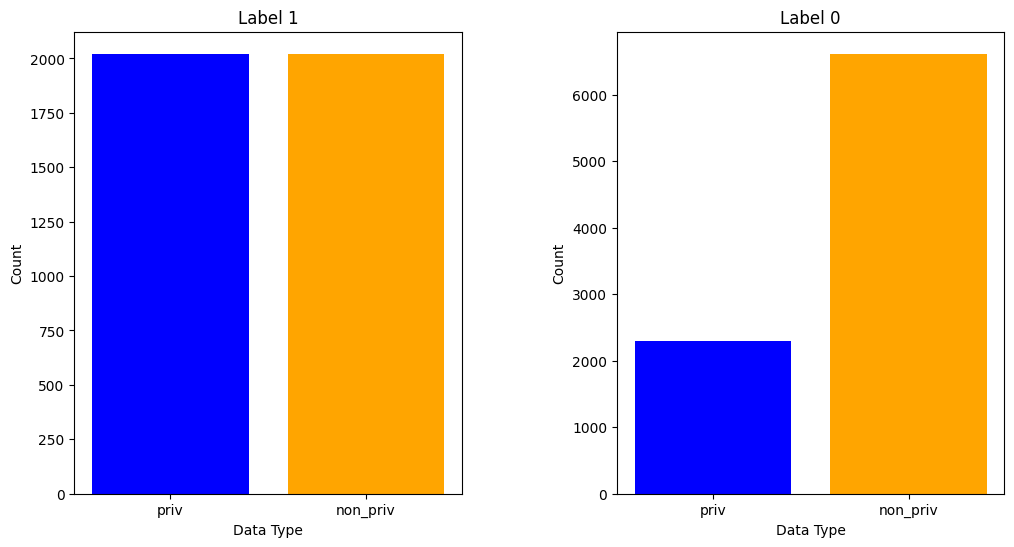

In [ ]:
# Plot for orig_data_one_priv.shape[0] and orig_data_one_non_priv.shape[0]
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Bar colors
colors = ['blue', 'orange']

# Plot 1 - orig_data_one_priv and orig_data_one_non_priv
axs[0].bar(['priv', 'non_priv'], [orig_data_one_priv.shape[0], orig_data_one_non_priv.shape[0]], color=colors)
axs[0].set_xlabel('Data Type')
axs[0].set_ylabel('Count')
axs[0].set_title('Label 1')

# Plot 2 - orig_data_zero_priv and orig_data_zero_non_priv
axs[1].bar(['priv', 'non_priv'], [orig_data_zero_priv.shape[0], orig_data_zero_non_priv.shape[0]], color=colors)
axs[1].set_xlabel('Data Type')
axs[1].set_ylabel('Count')
axs[1].set_title('Label 0')


# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.4)

plt.savefig('plot_original_ratios.jpg')


# Show the plots
plt.show()

In [ ]:
orig_data

,parents,has_nurs,form,children,housing,finance,social,health,class,great_pret
0,usual,proper,complete,1,convenient,convenient,nonprob,recommended,0,0
1,usual,proper,complete,1,convenient,convenient,nonprob,priority,0,0
2,usual,proper,complete,1,convenient,convenient,nonprob,not_recom,0,0
3,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended,0,0
4,usual,proper,complete,1,convenient,convenient,slightly_prob,priority,0,0
...,...,...,...,...,...,...,...,...,...,...
12955,great_pret,very_crit,foster,more,critical,inconv,slightly_prob,priority,1,1
12956,great_pret,very_crit,foster,more,critical,inconv,slightly_prob,not_recom,0,1
12957,great_pret,very_crit,foster,more,critical,inconv,problematic,recommended,1,1
12958,great_pret,very_crit,foster,more,critical,inconv,problematic,priority,1,1


In [ ]:
# dataset for training
orig_data.dropna(thresh=len(feature_columns)/2, inplace=True)
orig_data.reset_index(drop=True, inplace=True)

y_orig = orig_data[TARGET_COL]
# y_orig = orig_data[TARGET_COL].to_frame()

y_orig.dropna(inplace=True)

orig_data = orig_data.loc[:, feature_columns]
# data = data[feature_columns]
encoder = ce.TargetEncoder(cols=CATEGORICAL)

encoder.fit(orig_data, y_orig)
orig_data_encoded = encoder.transform(orig_data)

In [ ]:
orig_dataset = pd.concat([orig_data, y_orig], axis=1)


## Acc, fairness metrics and roc & auc for original dataset

conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matrix:
  [[1282   44]
 [  53  339]] 
accuracy:  0.9435389988358557 precision:  0.8851174934725848 recall:  0.8647959183673469 fpr:  0.033182503770739065 tpr:  0.8647959183673469 fn+fp 97
conf matrix:
  [[413  45]
 [ 20 396]] 
accuracy:  0.9256292906178489 precision:  0.8979591836734694 recall:  0.9519230769230769 fpr:  0.0982532751091703 tpr:  0.9519230769230769 fn+fp 65
conf matrix:
  [[1691   92]
 [  74  735]] 
accuracy:  0.9359567901234568 precision:  0.8887545344619106 recall:  0.9085290482076638 fpr:  0.051598429613011774 tpr:  0.9085290482076638 fn+fp 166
conf matrix:
  [[1259   55]
 [  56  367]] 
accuracy:  0.9360967184801382 precision:  0.8696682464454977 recall:  0.8676122931442081 fpr:  0.04185692541856925 tpr:  0.8676122931442081 fn+fp 111
conf matrix:
  [[432  37]
 [ 18 368]] 
accuracy:  0.

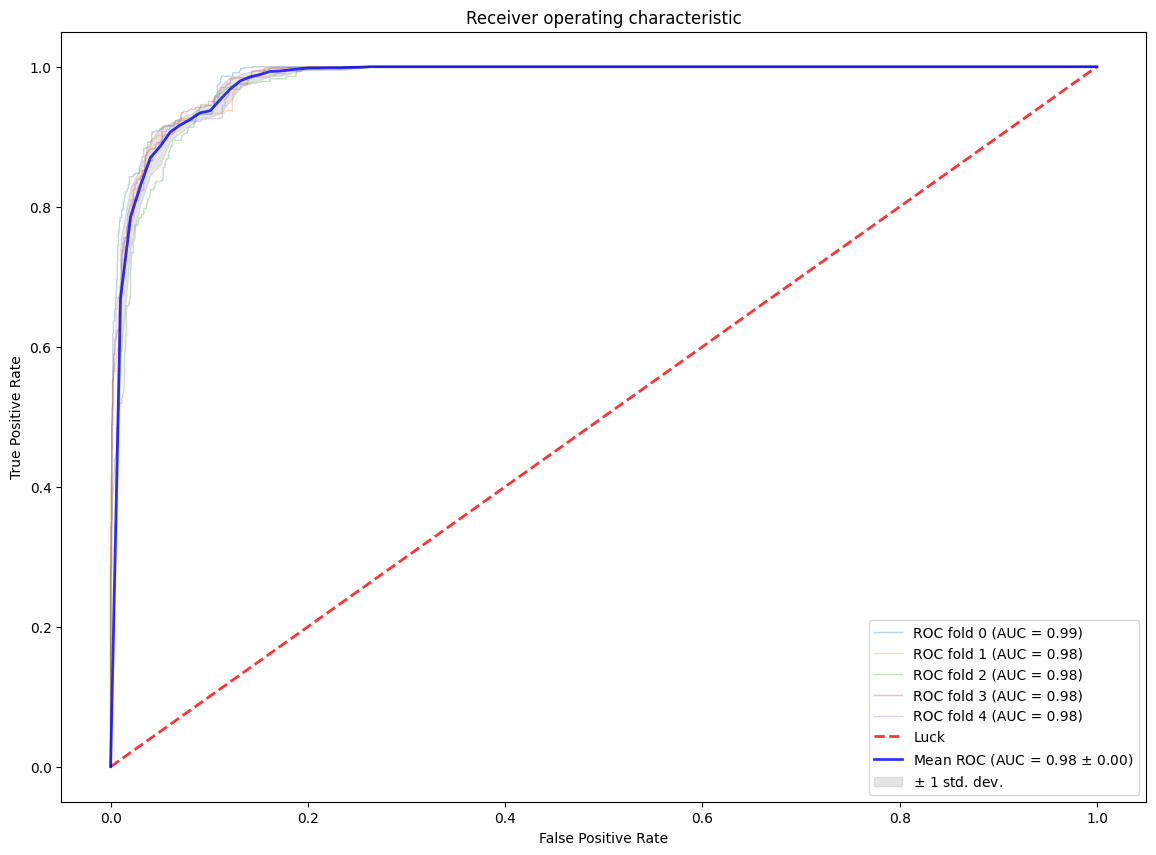

In [ ]:
orig_acc ,orig_op_diff, orig_op_diff_fpr, orig_od_diff, orig_par_diff , orig_dis_impact  = fairness_metrics_roc_auc(orig_data_encoded, y_orig )

# CTGAN On Priv Target Group

In [ ]:
orig_dataset[TARGET_COL] = orig_dataset[TARGET_COL].astype(int)

unprivileged_data_priv_target = orig_dataset[(orig_dataset[PRIV_FEATURE] != PRIV_VALUE_FEATURE ) & (orig_dataset[TARGET_COL] == PRIV_CLASS)]
privileged_data_priv_target = orig_dataset[(orig_dataset[PRIV_FEATURE] == PRIV_VALUE_FEATURE ) & (orig_dataset[TARGET_COL] == PRIV_CLASS)]
print(unprivileged_data_priv_target.shape[0])
print(privileged_data_priv_target.shape[0])

Accaracy list :  [0.9375, 0.9359567901234568, 0.9189814814814815, 0.9317129629629629, 0.933641975308642]
equal opportunity for tpr :  [0.08712715855572994, 0.08575558250346027, 0.02741442542787287, 0.051650366748166254, 0.12909437699446136]
equal opportunity for fpr :  [0.06507077133843123, 0.03703433257716636, 0.06398109062933383, 0.07287988663832624, 0.051213865799146996]
odds difference list :  [0.07609896494708059, 0.061394957540313315, 0.04569775802860335, 0.06226512669324625, 0.09015412139680418]
The mean accuracy is  0.932 ± 0.007
The mean equal opportunity for tpr: (close to 0) 0.076 ± 0.035
The mean equal opportunity for fpr: (close to 0) 0.058 ± 0.013
The mean odds difference: (close to 0) 0.067 ± 0.015
The mean parity difference: (close to 0) 0.043 ± 0.021
The mean disperate impact: (close to 1) 1.000 ± 0.000
6618
2298


In [ ]:
unprivileged_data_priv_target

,parents,has_nurs,form,children,housing,finance,social,health,great_pret,class
0,usual,proper,complete,1,convenient,convenient,nonprob,recommended,0,0
1,usual,proper,complete,1,convenient,convenient,nonprob,priority,0,0
2,usual,proper,complete,1,convenient,convenient,nonprob,not_recom,0,0
3,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended,0,0
4,usual,proper,complete,1,convenient,convenient,slightly_prob,priority,0,0
...,...,...,...,...,...,...,...,...,...,...
8627,pretentious,very_crit,foster,more,critical,convenient,slightly_prob,not_recom,0,0
8630,pretentious,very_crit,foster,more,critical,convenient,problematic,not_recom,0,0
8633,pretentious,very_crit,foster,more,critical,inconv,nonprob,not_recom,0,0
8636,pretentious,very_crit,foster,more,critical,inconv,slightly_prob,not_recom,0,0


In [ ]:
from ctgan import CTGAN
if unprivileged_data_priv_target.shape[0] < privileged_data_priv_target.shape[0]:
    ctgan_priv_target = CTGAN(verbose=True)
    # Fit the synthesizer to the unprivileged features
    ctgan_priv_target.fit(unprivileged_data_priv_target , CATEGORICAL, epochs = 200)
else:
    ctgan_priv_target = CTGAN(verbose=True)
    # Fit the synthesizer to the unprivileged features
    ctgan_priv_target.fit(privileged_data_priv_target , CATEGORICAL, epochs = 200)


# from ctgan import CTGAN

# if unprivileged_data_priv_target.shape[0] < privileged_data_priv_target.shape[0]:
#     ctgan_priv_target = CTGAN(verbose=True)
#     # Fit the synthesizer to the unprivileged features
#     ctgan_priv_target.fit(unprivileged_data_priv_target , CATEGORICAL, epochs = 200)


Gen. (-0.87) | Discrim. (0.17): 100%|██████████| 200/200 [01:12<00:00,  2.75it/s]


# CTGAN On Unpriv Target Group

In [ ]:
unprivileged_data_unpriv_target = orig_dataset[(orig_dataset[PRIV_FEATURE] != PRIV_VALUE_FEATURE ) & (orig_dataset[TARGET_COL] != PRIV_CLASS)]
privileged_data_unpriv_target = orig_dataset[(orig_dataset[PRIV_FEATURE] == PRIV_VALUE_FEATURE ) & (orig_dataset[TARGET_COL] != PRIV_CLASS)]

print(unprivileged_data_unpriv_target.shape[0])
print(privileged_data_unpriv_target.shape[0])
print(privileged_data_unpriv_target.shape[0]-unprivileged_data_unpriv_target.shape[0])

2022
2022
0


In [ ]:
from ctgan import CTGAN
if unprivileged_data_unpriv_target.shape[0] <= privileged_data_unpriv_target.shape[0]:
    ctgan_unpriv_target = CTGAN(verbose=True)
    # Fit the synthesizer to the unprivileged features
    ctgan_unpriv_target.fit(unprivileged_data_unpriv_target , CATEGORICAL, epochs = 200)

if unprivileged_data_unpriv_target.shape[0] > privileged_data_unpriv_target.shape[0]:
    ctgan_unpriv_target = CTGAN(verbose=True)
    # Fit the synthesizer to the unprivileged features
    ctgan_unpriv_target.fit(privileged_data_unpriv_target , CATEGORICAL, epochs = 200)


Gen. (-0.99) | Discrim. (0.08): 100%|██████████| 200/200 [01:01<00:00,  3.27it/s]


In [ ]:
orig_dataset = pd.concat([orig_data_encoded, y_orig], axis=1)
orig_dataset

,parents,has_nurs,form,children,housing,finance,social,health,great_pret,class
0,0.175463,0.097222,0.274074,0.248148,0.243519,0.286420,0.277778,0.365278,0,0
1,0.175463,0.097222,0.274074,0.248148,0.243519,0.286420,0.277778,0.570833,0,0
2,0.175463,0.097222,0.274074,0.248148,0.243519,0.286420,0.277778,0.000000,0,0
3,0.175463,0.097222,0.274074,0.248148,0.243519,0.286420,0.277778,0.365278,0,0
4,0.175463,0.097222,0.274074,0.248148,0.243519,0.286420,0.277778,0.570833,0,0
...,...,...,...,...,...,...,...,...,...,...
12955,0.468056,0.585648,0.350617,0.350617,0.372222,0.337654,0.277778,0.570833,1,1
12956,0.468056,0.585648,0.350617,0.350617,0.372222,0.337654,0.277778,0.000000,1,0
12957,0.468056,0.585648,0.350617,0.350617,0.372222,0.337654,0.380556,0.365278,1,1
12958,0.468056,0.585648,0.350617,0.350617,0.372222,0.337654,0.380556,0.570833,1,1


In [ ]:
print(DATASET_NAME)

NURSERY


Optuna FairUS

In [ ]:
def Upsampling_Dataset(lambda_0, lambda_1):
    priv_target_samples = ctgan_priv_target.sample(math.floor(lambda_0 * (abs(privileged_data_priv_target.shape[0] - unprivileged_data_priv_target.shape[0]))))
    #print(priv_target_samples)
    # print('number of samples i added(lambda_0)', len(priv_target_samples))
    y_priv = priv_target_samples[TARGET_COL]
    priv_target_samples = priv_target_samples.loc[:, feature_columns]

    priv_target_samples = encoder.transform(priv_target_samples)
    priv_target_samples = pd.concat([priv_target_samples, y_priv], axis=1)

    unpriv_target_samples = ctgan_unpriv_target.sample(math.floor(lambda_1 * (abs(privileged_data_unpriv_target.shape[0] - unprivileged_data_unpriv_target.shape[0]))))
    # print('number of samples i added(lambda_1)', len(unpriv_target_samples))
    y_unpriv = unpriv_target_samples[TARGET_COL]
    unpriv_target_samples = unpriv_target_samples.loc[:, feature_columns]

    unpriv_target_samples = encoder.transform(unpriv_target_samples)
    unpriv_target_samples = pd.concat([unpriv_target_samples, y_unpriv], axis=1)

    if len((priv_target_samples)>0) and (len(unpriv_target_samples)==0):
        df_list = [orig_dataset, priv_target_samples]  # List of your dataframes
        upsampled_df = pd.concat(df_list)
        y_upsampled = upsampled_df[TARGET_COL]
        upsampled_df_features = upsampled_df.loc[:, feature_columns]

    if (len(unpriv_target_samples)>0) and (len(priv_target_samples)==0):
        df_list = [orig_dataset, unpriv_target_samples]  # List of your dataframes
        upsampled_df = pd.concat(df_list)
        y_debias = upsampled_df[TARGET_COL]
        upsampled_df_features = upsampled_df.loc[:, feature_columns]

    if (len(priv_target_samples)>0) and (len(unpriv_target_samples)>0):
        df_list = [orig_dataset, priv_target_samples, unpriv_target_samples]  # List of your dataframes
        upsampled_df = pd.concat(df_list)
        y_upsampled = upsampled_df[TARGET_COL]
        upsampled_df_features = upsampled_df.loc[:, feature_columns]

    if (len(priv_target_samples)==0) and (len(unpriv_target_samples)==0):
        upsampled_df = orig_dataset
        y_upsampled = upsampled_df[TARGET_COL]
        upsampled_df_features = upsampled_df.loc[:, feature_columns]

    return upsampled_df


In [ ]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 9.3 MB/s eta 0:00:00


In [ ]:
!pip install cmaes


In [ ]:
import optuna


In [ ]:
all_upsampled_acc = []
all_upsampled_op_diff = []

def FairUS_Finding_Optimal_Lambdas_Optuna(trial):

    # Initialize original Equalized odds and Accuracy Scores
    orig_acc ,orig_op_diff, orig_op_diff_fpr, orig_od_diff, orig_par_diff , orig_dis_impact = fairness_metrics_roc_auc_no_print(orig_data_encoded, y_orig)

    OrigFair_score = mean(orig_od_diff)
    OrigAcc_score = mean(orig_acc)

    # Initialize matrices to store Fairness and Accuracy results
    #Fairness_Matrix = np.zeros((num_steps, num_steps))
    #Accuracy_Matrix = np.zeros((num_steps, num_steps))

    lambda_0 =  trial.suggest_float("lambda_0", 0, 2)
    lambda_1 =  trial.suggest_float("lambda_1", 0, 2)

    upsampled_df = Upsampling_Dataset(lambda_0, lambda_1)
    y_debias = upsampled_df[TARGET_COL]
    upsampled_df_features = upsampled_df.loc[:, feature_columns]

    upsampled_acc ,upsampled_op_diff, upsampled_op_diff_fpr, upsampled_od_diff, upsampled_par_diff , upsampled_dis_impact = fairness_metrics_roc_auc_no_print(upsampled_df_features, y_debias)

    CurrFair_score = mean(upsampled_od_diff)
    CurrAcc_score = mean(upsampled_acc)
    # if ALPHA == 1:
    #   optimization_objective = CurrFair_score/mean(orig_od_diff)
    # else:
      # optimization_objective = (ALPHA*CurrFair_score/mean(orig_od_diff)) - ((1-ALPHA)*CurrAcc_score/mean(orig_acc))
    optimization_objective = (CurrFair_score/mean(orig_od_diff)) - (CurrAcc_score/mean(orig_acc))
    # optimization_objective = (CurrFair_score) - (CurrAcc_score)

    # Update fairness matrix with Equalized odds subtraction
    #Fairness_Matrix[i, j] = -(CurrFair_score - OrigFair_score)
    # Update accuracy matrix with Minos accuracy subtraction
    #Accuracy_Matrix[i, j] = (CurrAcc_score - OrigAcc_score)


    #fairness_delta = np.max(Fairness_Matrix)-np.min(Fairness_Matrix)
    #acc_delta = np.max(Accuracy_Matrix)-np.min(Accuracy_Matrix)
    #fairness_factor = acc_delta / fairness_delta
    #scaled_fairness_matrix = fairness_factor * Fairness_Matrix


    #Accuracy_Matrix = -(Accuracy_Matrix)
    #scaled_fairness_matrix= -(scaled_fairness_matrix)
    print ('lambda_0:',lambda_0)
    print ('lambda_1:',lambda_1)
    #print ('fairness matrix before scaling: ',Fairness_Matrix)
    #print ('fairness matrix after scaling: ',scaled_fairness_matrix)
    #print ('acc matrix is: ', Accuracy_Matrix)

    # Save upsampled_acc and upsampled_op_diff as trial attributes
    upsampled_acc = mean(upsampled_acc)
    upsampled_op_diff = mean(upsampled_op_diff)
    trial.set_user_attr('upsampled_acc', upsampled_acc)
    trial.set_user_attr('upsampled_op_diff', upsampled_op_diff)
    print('---------------------------------------trail upsampled_acc is : ', trial.user_attrs.get('upsampled_acc'))
    print('---------------------------------------trail upsampled_op_diff is : ', trial.user_attrs.get('upsampled_op_diff'))
    all_upsampled_acc.append(upsampled_acc)
    all_upsampled_op_diff.append(upsampled_op_diff)

    # Return optimal dataset upsampled with lambda_0, lambda_1 values
    # return optimization_objective #scaled_fairness_matrix
    return CurrFair_score, CurrAcc_score #for multi objective


In [ ]:
# Record the start time
start_time = time.time()

In [ ]:
CME_flag = False

if CME_flag:
  from optuna.samplers import CmaEsSampler

  # Create an instance of CmaEsSampler
  # Create an instance of CmaEsSampler with specified parameters
  cma_es_sampler = CmaEsSampler(
      sigma0=0.01,  # Initial standard deviation of the distribution.
      n_startup_trials=10,  # The number of trials before using CMA-ES.
      independent_sampler=optuna.samplers.RandomSampler(seed=0)  # Sampler used for the first `n_startup_trials`.
  )


  # Pass the instance of CmaEsSampler to create_study
  # study = optuna.create_study(sampler=cma_es_sampler, direction='minimize')
  study = optuna.create_study(sampler=tpe_sampler, directions=['minimize', 'maximize']) #

  study.optimize(FairUS_Finding_Optimal_Lambdas_Optuna, n_trials=400)
else:
  from optuna.samplers import TPESampler

  # Create an instance of TPESampler with custom parameters
  # You can adjust parameters like n_startup_trials, n_ei_candidates, etc.
  tpe_sampler = TPESampler(n_startup_trials=20, n_ei_candidates=24, multivariate=True)

  # Pass the instance of TPESampler to create_study
  # study = optuna.create_study(sampler=tpe_sampler, direction='minimize') #directions=['minimize', 'maximize']
  study = optuna.create_study(sampler=tpe_sampler, directions=['minimize', 'maximize']) #

  study.optimize(FairUS_Finding_Optimal_Lambdas_Optuna, n_trials=200)

/usr/local/lib/python3.10/dist-packages/optuna/samplers/_tpe/sampler.py:319: ExperimentalWarning: ``multivariate`` option is an experimental feature. The interface can change in the future.
  warnings.warn(
[I 2024-04-02 13:49:50,511] A new study created in memory with name: no-name-14e680cf-5dbc-46bd-bafd-da1adbae6b0a


conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matrix:
  [[1282   44]
 [  53  339]] 
accuracy:  0.9435389988358557 precision:  0.8851174934725848 recall:  0.8647959183673469 fpr:  0.033182503770739065 tpr:  0.8647959183673469 fn+fp 97
conf matrix:
  [[413  45]
 [ 20 396]] 
accuracy:  0.9256292906178489 precision:  0.8979591836734694 recall:  0.9519230769230769 fpr:  0.0982532751091703 tpr:  0.9519230769230769 fn+fp 65
conf matrix:
  [[1691   92]
 [  74  735]] 
accuracy:  0.9359567901234568 precision:  0.8887545344619106 recall:  0.9085290482076638 fpr:  0.051598429613011774 tpr:  0.9085290482076638 fn+fp 166
conf matrix:
  [[1259   55]
 [  56  367]] 
accuracy:  0.9360967184801382 precision:  0.8696682464454977 recall:  0.8676122931442081 fpr:  0.04185692541856925 tpr:  0.8676122931442081 fn+fp 111
conf matrix:
  [[432  37]
 [ 18 368]] 
accuracy:  0.

[I 2024-04-02 13:49:52,429] Trial 0 finished with values: [0.16622312014500062, 0.8941105097207384] and parameters: {'lambda_0': 1.5318908404404321, 'lambda_1': 1.9114121780248507}. 


conf matrix:
  [[3009   97]
 [ 306  503]] 
accuracy:  0.8970625798212005 precision:  0.8383333333333334 recall:  0.6217552533992583 fpr:  0.031229877656149388 tpr:  0.6217552533992583 fn+fp 403
conf matrix:
  [[1325   26]
 [  90  326]] 
accuracy:  0.9343520090548953 precision:  0.9261363636363636 recall:  0.7836538461538461 fpr:  0.01924500370096225 tpr:  0.7836538461538461 fn+fp 116
conf matrix:
  [[1684   71]
 [ 216  177]] 
accuracy:  0.8663873370577281 precision:  0.7137096774193549 recall:  0.45038167938931295 fpr:  0.040455840455840456 tpr:  0.45038167938931295 fn+fp 287
conf matrix:
  [[3023   83]
 [ 353  456]] 
accuracy:  0.8886334610472542 precision:  0.8460111317254174 recall:  0.5636588380716935 fpr:  0.026722472633612365 tpr:  0.5636588380716935 fn+fp 436
conf matrix:
  [[1321   26]
 [ 103  301]] 
accuracy:  0.9263278126784694 precision:  0.9204892966360856 recall:  0.745049504950495 fpr:  0.019302152932442463 tpr:  0.745049504950495 fn+fp 129
conf matrix:
  [[1702   57]
 [ 

[I 2024-04-02 13:49:53,994] Trial 1 finished with values: [0.06429140472389638, 0.9224676410089627] and parameters: {'lambda_0': 0.18577528297190904, 'lambda_1': 0.8793437939468929}. 


conf matrix:
  [[1825  118]
 [ 102  707]] 
accuracy:  0.9200581395348837 precision:  0.8569696969696969 recall:  0.8739184177997528 fpr:  0.06073082861554297 tpr:  0.8739184177997528 fn+fp 220
conf matrix:
  [[1254   50]
 [  65  345]] 
accuracy:  0.9329054842473745 precision:  0.8734177215189873 recall:  0.8414634146341463 fpr:  0.03834355828220859 tpr:  0.8414634146341463 fn+fp 115
conf matrix:
  [[571  68]
 [ 37 362]] 
accuracy:  0.8988439306358381 precision:  0.8418604651162791 recall:  0.9072681704260651 fpr:  0.10641627543035993 tpr:  0.9072681704260651 fn+fp 105
lambda_0: 0.18577528297190904
lambda_1: 0.8793437939468929
---------------------------------------trail upsampled_acc is :  0.9224676410089627
---------------------------------------trail upsampled_op_diff is :  0.05615449646217854
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matrix:

[I 2024-04-02 13:49:55,359] Trial 2 finished with values: [0.15834762566742863, 0.8942557267648996] and parameters: {'lambda_0': 1.001721754300783, 'lambda_1': 0.23714923603672178}. 


conf matrix:
  [[2556   92]
 [ 272  537]] 
accuracy:  0.8947063928261498 precision:  0.8537360890302067 recall:  0.6637824474660075 fpr:  0.03474320241691843 tpr:  0.6637824474660075 fn+fp 364
conf matrix:
  [[1333   27]
 [  98  289]] 
accuracy:  0.9284487693188322 precision:  0.9145569620253164 recall:  0.7467700258397932 fpr:  0.019852941176470587 tpr:  0.7467700258397932 fn+fp 125
conf matrix:
  [[1223   65]
 [ 174  248]] 
accuracy:  0.860233918128655 precision:  0.792332268370607 recall:  0.5876777251184834 fpr:  0.05046583850931677 tpr:  0.5876777251184834 fn+fp 239
lambda_0: 1.001721754300783
lambda_1: 0.23714923603672178
---------------------------------------trail upsampled_acc is :  0.8942557267648996
---------------------------------------trail upsampled_op_diff is :  0.3022020290905835
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matrix

[I 2024-04-02 13:49:56,760] Trial 3 finished with values: [0.15794942744869708, 0.8964622441108486] and parameters: {'lambda_0': 1.0177579601614697, 'lambda_1': 0.9202481020434836}. 


conf matrix:
  [[2550  112]
 [ 243  566]] 
accuracy:  0.8977239988475944 precision:  0.8348082595870207 recall:  0.6996291718170581 fpr:  0.042073628850488355 tpr:  0.6996291718170581 fn+fp 355
conf matrix:
  [[1297   45]
 [  69  336]] 
accuracy:  0.934745277618775 precision:  0.8818897637795275 recall:  0.8296296296296296 fpr:  0.03353204172876304 tpr:  0.8296296296296296 fn+fp 114
conf matrix:
  [[1253   67]
 [ 174  230]] 
accuracy:  0.8602088167053364 precision:  0.7744107744107744 recall:  0.5693069306930693 fpr:  0.05075757575757576 tpr:  0.5693069306930693 fn+fp 241
lambda_0: 1.0177579601614697
lambda_1: 0.9202481020434836
---------------------------------------trail upsampled_acc is :  0.8964622441108486
---------------------------------------trail upsampled_op_diff is :  0.3023019944168372
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matri

[I 2024-04-02 13:49:58,043] Trial 4 finished with values: [0.08390570106175467, 0.9120849933598937] and parameters: {'lambda_0': 0.4861167513796527, 'lambda_1': 1.327307055251283}. 


conf matrix:
  [[2059  144]
 [ 144  665]] 
accuracy:  0.9043824701195219 precision:  0.8220024721878862 recall:  0.8220024721878862 fpr:  0.06536541080344985 tpr:  0.8220024721878862 fn+fp 288
conf matrix:
  [[1262   74]
 [  43  347]] 
accuracy:  0.9322132097334879 precision:  0.8242280285035629 recall:  0.8897435897435897 fpr:  0.05538922155688623 tpr:  0.8897435897435897 fn+fp 117
conf matrix:
  [[797  70]
 [101 318]] 
accuracy:  0.8670295489891136 precision:  0.8195876288659794 recall:  0.7589498806682577 fpr:  0.08073817762399077 tpr:  0.7589498806682577 fn+fp 171
lambda_0: 0.4861167513796527
lambda_1: 1.327307055251283
---------------------------------------trail upsampled_acc is :  0.9120849933598937
---------------------------------------trail upsampled_op_diff is :  0.14177256305402988
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matrix:
 

[I 2024-04-02 13:49:59,336] Trial 5 finished with values: [0.08407029316400319, 0.904540633212165] and parameters: {'lambda_0': 0.5792595871455972, 'lambda_1': 1.3890306080463404}. 


conf matrix:
  [[2171  112]
 [ 164  645]] 
accuracy:  0.9107373868046572 precision:  0.8520475561426685 recall:  0.7972805933250927 fpr:  0.049058256679807274 tpr:  0.7972805933250927 fn+fp 276
conf matrix:
  [[1297   54]
 [  73  349]] 
accuracy:  0.928369994359842 precision:  0.8660049627791563 recall:  0.8270142180094787 fpr:  0.03997039230199852 tpr:  0.8270142180094787 fn+fp 127
conf matrix:
  [[874  58]
 [ 91 296]] 
accuracy:  0.8870356330553449 precision:  0.8361581920903954 recall:  0.7648578811369509 fpr:  0.06223175965665236 tpr:  0.7648578811369509 fn+fp 149
lambda_0: 0.5792595871455972
lambda_1: 1.3890306080463404
---------------------------------------trail upsampled_acc is :  0.904540633212165
---------------------------------------trail upsampled_op_diff is :  0.143654084667276
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matrix:
  [

[I 2024-04-02 13:50:00,653] Trial 6 finished with values: [0.1564894441410777, 0.8934438996809947] and parameters: {'lambda_0': 1.0538330159332017, 'lambda_1': 1.6308754978922464}. 


conf matrix:
  [[2584  109]
 [ 242  567]] 
accuracy:  0.8997715591090806 precision:  0.8387573964497042 recall:  0.7008652657601978 fpr:  0.040475306349795764 tpr:  0.7008652657601978 fn+fp 351
conf matrix:
  [[1302   45]
 [  51  326]] 
accuracy:  0.9443155452436195 precision:  0.8787061994609164 recall:  0.8647214854111406 fpr:  0.0334075723830735 tpr:  0.8647214854111406 fn+fp 96
conf matrix:
  [[1282   64]
 [ 191  241]] 
accuracy:  0.8565804274465691 precision:  0.7901639344262295 recall:  0.5578703703703703 fpr:  0.0475482912332838 tpr:  0.5578703703703703 fn+fp 255
lambda_0: 1.0538330159332017
lambda_1: 1.6308754978922464
---------------------------------------trail upsampled_acc is :  0.8934438996809947
---------------------------------------trail upsampled_op_diff is :  0.29456895554964957
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matrix

[I 2024-04-02 13:50:01,810] Trial 7 finished with values: [0.07213665570432623, 0.9253703798243823] and parameters: {'lambda_0': 0.07396171225759662, 'lambda_1': 1.3477593163047659}. 


conf matrix:
  [[1220   64]
 [  48  351]] 
accuracy:  0.9334521687462864 precision:  0.8457831325301205 recall:  0.8796992481203008 fpr:  0.04984423676012461 tpr:  0.8796992481203008 fn+fp 112
conf matrix:
  [[486  77]
 [ 27 382]] 
accuracy:  0.8930041152263375 precision:  0.8322440087145969 recall:  0.9339853300733496 fpr:  0.13676731793960922 tpr:  0.9339853300733496 fn+fp 104
lambda_0: 0.07396171225759662
lambda_1: 1.3477593163047659
---------------------------------------trail upsampled_acc is :  0.9253703798243823
---------------------------------------trail upsampled_op_diff is :  0.06974133098469888
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matrix:
  [[1282   44]
 [  53  339]] 
accuracy:  0.9435389988358557 precision:  0.8851174934725848 recall:  0.8647959183673469 fpr:  0.033182503770739065 tpr:  0.8647959183673469 fn+fp 97
conf matrix:

[I 2024-04-02 13:50:03,157] Trial 8 finished with values: [0.15388603697033135, 0.8954857142857142] and parameters: {'lambda_0': 1.0510316461861249, 'lambda_1': 0.030548321212225504}. 


conf matrix:
  [[2609   82]
 [ 259  550]] 
accuracy:  0.9025714285714286 precision:  0.870253164556962 recall:  0.6798516687268232 fpr:  0.030471943515421776 tpr:  0.6798516687268232 fn+fp 341
conf matrix:
  [[1318   34]
 [  69  308]] 
accuracy:  0.940427993059572 precision:  0.9005847953216374 recall:  0.8169761273209549 fpr:  0.02514792899408284 tpr:  0.8169761273209549 fn+fp 103
conf matrix:
  [[1291   48]
 [ 190  242]] 
accuracy:  0.8656126482213439 precision:  0.8344827586206897 recall:  0.5601851851851852 fpr:  0.035847647498132934 tpr:  0.5601851851851852 fn+fp 238
lambda_0: 1.0510316461861249
lambda_1: 0.030548321212225504
---------------------------------------trail upsampled_acc is :  0.8954857142857142
---------------------------------------trail upsampled_op_diff is :  0.28953451798943813
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf ma

[I 2024-04-02 13:50:05,093] Trial 9 finished with values: [0.16137900952862744, 0.894290752522215] and parameters: {'lambda_0': 1.614064261729312, 'lambda_1': 0.4137275503339328}. 


conf matrix:
  [[3081   96]
 [ 330  479]] 
accuracy:  0.8931259407927747 precision:  0.8330434782608696 recall:  0.5920889987639061 fpr:  0.030217186024551465 tpr:  0.5920889987639061 fn+fp 426
conf matrix:
  [[1302   47]
 [  81  338]] 
accuracy:  0.9276018099547512 precision:  0.8779220779220779 recall:  0.8066825775656324 fpr:  0.034840622683469234 tpr:  0.8066825775656324 fn+fp 128
conf matrix:
  [[1779   49]
 [ 249  141]] 
accuracy:  0.8656447249774571 precision:  0.7421052631578947 recall:  0.36153846153846153 fpr:  0.026805251641137857 tpr:  0.36153846153846153 fn+fp 298
lambda_0: 1.614064261729312
lambda_1: 0.4137275503339328
---------------------------------------trail upsampled_acc is :  0.894290752522215
---------------------------------------trail upsampled_op_diff is :  0.3070201312010344
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf ma

[I 2024-04-02 13:50:06,612] Trial 10 finished with values: [0.059475355536305397, 0.9258216725389697] and parameters: {'lambda_0': 0.12698721075549657, 'lambda_1': 1.9449022534377667}. 


conf matrix:
  [[1782  110]
 [  92  717]] 
accuracy:  0.9252128841169938 precision:  0.8669891172914147 recall:  0.8862793572311496 fpr:  0.05813953488372093 tpr:  0.8862793572311496 fn+fp 202
conf matrix:
  [[1265   37]
 [  59  345]] 
accuracy:  0.943728018757327 precision:  0.9031413612565445 recall:  0.8539603960396039 fpr:  0.028417818740399385 tpr:  0.8539603960396039 fn+fp 96
conf matrix:
  [[517  73]
 [ 33 372]] 
accuracy:  0.893467336683417 precision:  0.8359550561797753 recall:  0.9185185185185185 fpr:  0.12372881355932204 tpr:  0.9185185185185185 fn+fp 106
lambda_0: 0.12698721075549657
lambda_1: 1.9449022534377667
---------------------------------------trail upsampled_acc is :  0.9258216725389697
---------------------------------------trail upsampled_op_diff is :  0.04598234035683457
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matrix:
 

[I 2024-04-02 13:50:07,859] Trial 11 finished with values: [0.06571461975320705, 0.9106641616008495] and parameters: {'lambda_0': 0.4644187790516665, 'lambda_1': 0.8468843527196683}. 


conf matrix:
  [[2084  100]
 [ 142  667]] 
accuracy:  0.9191446708987637 precision:  0.8696219035202086 recall:  0.8244746600741656 fpr:  0.045787545787545784 tpr:  0.8244746600741656 fn+fp 242
conf matrix:
  [[1276   49]
 [  49  351]] 
accuracy:  0.9431884057971015 precision:  0.8775 recall:  0.8775 fpr:  0.0369811320754717 tpr:  0.8775 fn+fp 98
conf matrix:
  [[808  51]
 [ 93 316]] 
accuracy:  0.886435331230284 precision:  0.8610354223433242 recall:  0.7726161369193154 fpr:  0.059371362048894066 tpr:  0.7726161369193154 fn+fp 144
lambda_0: 0.4644187790516665
lambda_1: 0.8468843527196683
---------------------------------------trail upsampled_acc is :  0.9106641616008495
---------------------------------------trail upsampled_op_diff is :  0.10900447863296374
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matrix:
  [[1282   44]
 [  53  339]] 
accurac

[I 2024-04-02 13:50:09,239] Trial 12 finished with values: [0.1378463965722478, 0.8979692745733014] and parameters: {'lambda_0': 1.138347109983973, 'lambda_1': 1.3984976098004014}. 


conf matrix:
  [[2676   90]
 [ 281  528]] 
accuracy:  0.8962237762237762 precision:  0.8543689320388349 recall:  0.6526576019777504 fpr:  0.03253796095444685 tpr:  0.6526576019777504 fn+fp 371
conf matrix:
  [[1281   42]
 [  75  307]] 
accuracy:  0.9313782991202346 precision:  0.8796561604584527 recall:  0.8036649214659686 fpr:  0.031746031746031744 tpr:  0.8036649214659686 fn+fp 117
conf matrix:
  [[1395   48]
 [ 206  221]] 
accuracy:  0.8641711229946524 precision:  0.8215613382899628 recall:  0.5175644028103045 fpr:  0.033264033264033266 tpr:  0.5175644028103045 fn+fp 254
lambda_0: 1.138347109983973
lambda_1: 1.3984976098004014
---------------------------------------trail upsampled_acc is :  0.8979692745733014
---------------------------------------trail upsampled_op_diff is :  0.262431542278392
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matri

[I 2024-04-02 13:50:10,675] Trial 13 finished with values: [0.16690601053036236, 0.8944409649488094] and parameters: {'lambda_0': 1.6555777962014642, 'lambda_1': 0.3596133622822779}. 


conf matrix:
  [[3143   70]
 [ 355  454]] 
accuracy:  0.8943311785181501 precision:  0.8664122137404581 recall:  0.5611866501854141 fpr:  0.02178649237472767 tpr:  0.5611866501854141 fn+fp 425
conf matrix:
  [[1333   26]
 [  98  307]] 
accuracy:  0.9297052154195011 precision:  0.9219219219219219 recall:  0.7580246913580246 fpr:  0.01913171449595291 tpr:  0.7580246913580246 fn+fp 124
conf matrix:
  [[1810   44]
 [ 257  147]] 
accuracy:  0.866696191319752 precision:  0.7696335078534031 recall:  0.36386138613861385 fpr:  0.023732470334412083 tpr:  0.36386138613861385 fn+fp 301
lambda_0: 1.6555777962014642
lambda_1: 0.3596133622822779
---------------------------------------trail upsampled_acc is :  0.8944409649488094
---------------------------------------trail upsampled_op_diff is :  0.32262604646126897
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf ma

[I 2024-04-02 13:50:12,014] Trial 14 finished with values: [0.11743254453237817, 0.8917054475773337] and parameters: {'lambda_0': 1.2281469540337095, 'lambda_1': 1.231877687608388}. 


conf matrix:
  [[2779   65]
 [ 316  493]] 
accuracy:  0.8957021626060772 precision:  0.8835125448028673 recall:  0.6093943139678616 fpr:  0.022855133614627286 tpr:  0.6093943139678616 fn+fp 381
conf matrix:
  [[1324   14]
 [ 115  286]] 
accuracy:  0.9258194364577343 precision:  0.9533333333333334 recall:  0.713216957605985 fpr:  0.01046337817638266 tpr:  0.713216957605985 fn+fp 129
conf matrix:
  [[1455   51]
 [ 201  207]] 
accuracy:  0.8683385579937304 precision:  0.8023255813953488 recall:  0.5073529411764706 fpr:  0.03386454183266932 tpr:  0.5073529411764706 fn+fp 252
lambda_0: 1.2281469540337095
lambda_1: 1.231877687608388
---------------------------------------trail upsampled_acc is :  0.8917054475773337
---------------------------------------trail upsampled_op_diff is :  0.21950475239027042
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matrix

[I 2024-04-02 13:50:13,375] Trial 15 finished with values: [0.1714031351148227, 0.892776886035313] and parameters: {'lambda_0': 1.326618542124201, 'lambda_1': 1.5964433158680649}. 


conf matrix:
  [[2830   99]
 [ 290  519]] 
accuracy:  0.8959336543606207 precision:  0.8398058252427184 recall:  0.6415327564894932 fpr:  0.03379993171730966 tpr:  0.6415327564894932 fn+fp 389
conf matrix:
  [[1318   33]
 [ 105  313]] 
accuracy:  0.9219898247597512 precision:  0.9046242774566474 recall:  0.7488038277511961 fpr:  0.02442635085122132 tpr:  0.7488038277511961 fn+fp 138
conf matrix:
  [[1512   66]
 [ 185  206]] 
accuracy:  0.8725241239207719 precision:  0.7573529411764706 recall:  0.5268542199488491 fpr:  0.04182509505703422 tpr:  0.5268542199488491 fn+fp 251
lambda_0: 1.326618542124201
lambda_1: 1.5964433158680649
---------------------------------------trail upsampled_acc is :  0.892776886035313
---------------------------------------trail upsampled_op_diff is :  0.32520274707977886
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matrix

[I 2024-04-02 13:50:14,624] Trial 16 finished with values: [0.10377260920210594, 0.903248407643312] and parameters: {'lambda_0': 0.6342905766980784, 'lambda_1': 0.4102695711874409}. 


conf matrix:
  [[2227  104]
 [ 211  598]] 
accuracy:  0.8996815286624203 precision:  0.8518518518518519 recall:  0.7391841779975278 fpr:  0.04461604461604462 tpr:  0.7391841779975278 fn+fp 315
conf matrix:
  [[1298   53]
 [  81  348]] 
accuracy:  0.9247191011235955 precision:  0.8678304239401496 recall:  0.8111888111888111 fpr:  0.03923019985196151 tpr:  0.8111888111888111 fn+fp 134
conf matrix:
  [[929  51]
 [130 250]] 
accuracy:  0.8669117647058824 precision:  0.8305647840531561 recall:  0.6578947368421053 fpr:  0.05204081632653061 tpr:  0.6578947368421053 fn+fp 181
lambda_0: 0.6342905766980784
lambda_1: 0.4102695711874409
---------------------------------------trail upsampled_acc is :  0.903248407643312
---------------------------------------trail upsampled_op_diff is :  0.1811330551448643
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matrix:
  

[I 2024-04-02 13:50:16,169] Trial 17 finished with values: [0.16264927210766797, 0.8943455614351532] and parameters: {'lambda_0': 1.638387693750981, 'lambda_1': 1.66476524842699}. 


conf matrix:
  [[3117   81]
 [ 292  517]] 
accuracy:  0.9069129024207636 precision:  0.8645484949832776 recall:  0.6390605686032138 fpr:  0.025328330206378986 tpr:  0.6390605686032138 fn+fp 373
conf matrix:
  [[1342   19]
 [  67  360]] 
accuracy:  0.9519015659955258 precision:  0.9498680738786279 recall:  0.8430913348946136 fpr:  0.013960323291697281 tpr:  0.8430913348946136 fn+fp 86
conf matrix:
  [[1775   62]
 [ 225  157]] 
accuracy:  0.8706624605678234 precision:  0.7168949771689498 recall:  0.4109947643979058 fpr:  0.033750680457267285 tpr:  0.4109947643979058 fn+fp 287
lambda_0: 1.638387693750981
lambda_1: 1.66476524842699
---------------------------------------trail upsampled_acc is :  0.8943455614351532
---------------------------------------trail upsampled_op_diff is :  0.30922632626615065
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matri

[I 2024-04-02 13:50:18,281] Trial 18 finished with values: [0.16532947672333567, 0.8926871118161603] and parameters: {'lambda_0': 1.6788674098548626, 'lambda_1': 1.636761145149849}. 


conf matrix:
  [[3140   93]
 [ 364  445]] 
accuracy:  0.8869371598218704 precision:  0.8271375464684015 recall:  0.5500618046971569 fpr:  0.028765852149706155 tpr:  0.5500618046971569 fn+fp 457
conf matrix:
  [[1303   49]
 [  99  304]] 
accuracy:  0.9156695156695157 precision:  0.8611898016997167 recall:  0.7543424317617866 fpr:  0.036242603550295856 tpr:  0.7543424317617866 fn+fp 148
conf matrix:
  [[1837   44]
 [ 265  141]] 
accuracy:  0.8648885002186271 precision:  0.7621621621621621 recall:  0.3472906403940887 fpr:  0.023391812865497075 tpr:  0.3472906403940887 fn+fp 309
lambda_0: 1.6788674098548626
lambda_1: 1.636761145149849
---------------------------------------trail upsampled_acc is :  0.8926871118161603
---------------------------------------trail upsampled_op_diff is :  0.3168572660304158
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf mat

[I 2024-04-02 13:50:19,606] Trial 19 finished with values: [0.05775498106643505, 0.9265111179308964] and parameters: {'lambda_0': 0.04928831852413418, 'lambda_1': 1.1522491604540563}. 


conf matrix:
  [[1730   95]
 [  99  710]] 
accuracy:  0.9263477600607442 precision:  0.8819875776397516 recall:  0.8776266996291718 fpr:  0.052054794520547946 tpr:  0.8776266996291718 fn+fp 194
conf matrix:
  [[1229   59]
 [  62  345]] 
accuracy:  0.9286135693215339 precision:  0.8539603960396039 recall:  0.8476658476658476 fpr:  0.04580745341614907 tpr:  0.8476658476658476 fn+fp 121
conf matrix:
  [[501  36]
 [ 37 365]] 
accuracy:  0.9222577209797657 precision:  0.9102244389027432 recall:  0.9079601990049752 fpr:  0.0670391061452514 tpr:  0.9079601990049752 fn+fp 73
lambda_0: 0.04928831852413418
lambda_1: 1.1522491604540563
---------------------------------------trail upsampled_acc is :  0.9265111179308964
---------------------------------------trail upsampled_op_diff is :  0.05556698673265115
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matrix:


[I 2024-04-02 13:50:20,817] Trial 20 finished with values: [0.06306470214376003, 0.9273490188124335] and parameters: {'lambda_0': 0.08428013535183919, 'lambda_1': 0.10873298323456981}. 


conf matrix:
  [[1759   97]
 [ 101  707]] 
accuracy:  0.9256756756756757 precision:  0.8793532338308457 recall:  0.875 fpr:  0.052262931034482756 tpr:  0.875 fn+fp 198
conf matrix:
  [[1251   37]
 [  65  346]] 
accuracy:  0.9399646851088875 precision:  0.9033942558746736 recall:  0.8418491484184915 fpr:  0.02872670807453416 tpr:  0.8418491484184915 fn+fp 102
conf matrix:
  [[508  60]
 [ 36 361]] 
accuracy:  0.900518134715026 precision:  0.8574821852731591 recall:  0.9093198992443325 fpr:  0.1056338028169014 tpr:  0.9093198992443325 fn+fp 96
lambda_0: 0.08428013535183919
lambda_1: 0.10873298323456981
---------------------------------------trail upsampled_acc is :  0.9273490188124335
---------------------------------------trail upsampled_op_diff is :  0.061011560538888766
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matrix:
  [[1282   44]
 [  53  33

[I 2024-04-02 13:50:22,021] Trial 21 finished with values: [0.07008007361837575, 0.9278018571630245] and parameters: {'lambda_0': 0.07172854312394894, 'lambda_1': 0.19488583379311986}. 


conf matrix:
  [[1231   54]
 [  48  354]] 
accuracy:  0.939537640782454 precision:  0.8676470588235294 recall:  0.8805970149253731 fpr:  0.04202334630350195 tpr:  0.8805970149253731 fn+fp 102
conf matrix:
  [[489  71]
 [ 11 395]] 
accuracy:  0.9151138716356108 precision:  0.8476394849785408 recall:  0.9729064039408867 fpr:  0.12678571428571428 tpr:  0.9729064039408867 fn+fp 82
lambda_0: 0.07172854312394894
lambda_1: 0.19488583379311986
---------------------------------------trail upsampled_acc is :  0.9278018571630245
---------------------------------------trail upsampled_op_diff is :  0.06446623289228064
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matrix:
  [[1282   44]
 [  53  339]] 
accuracy:  0.9435389988358557 precision:  0.8851174934725848 recall:  0.8647959183673469 fpr:  0.033182503770739065 tpr:  0.8647959183673469 fn+fp 97
conf matrix:


[I 2024-04-02 13:50:23,207] Trial 22 finished with values: [0.07902661601625259, 0.9240535412087237] and parameters: {'lambda_0': 0.04496826393356245, 'lambda_1': 0.5574730800746509}. 


conf matrix:
  [[1242   49]
 [  55  341]] 
accuracy:  0.9383521043272081 precision:  0.8743589743589744 recall:  0.8611111111111112 fpr:  0.037955073586367155 tpr:  0.8611111111111112 fn+fp 104
conf matrix:
  [[465  66]
 [ 29 383]] 
accuracy:  0.8992576882290562 precision:  0.8530066815144766 recall:  0.9296116504854369 fpr:  0.12429378531073447 tpr:  0.9296116504854369 fn+fp 95
lambda_0: 0.04496826393356245
lambda_1: 0.5574730800746509
---------------------------------------trail upsampled_acc is :  0.9240535412087237
---------------------------------------trail upsampled_op_diff is :  0.07771583138264944
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matrix:
  [[1282   44]
 [  53  339]] 
accuracy:  0.9435389988358557 precision:  0.8851174934725848 recall:  0.8647959183673469 fpr:  0.033182503770739065 tpr:  0.8647959183673469 fn+fp 97
conf matrix:

[I 2024-04-02 13:50:24,952] Trial 23 finished with values: [0.18792084601305023, 0.892263248612959] and parameters: {'lambda_0': 1.8558228163206458, 'lambda_1': 1.021109524251577}. 


conf matrix:
  [[3298   88]
 [ 341  468]] 
accuracy:  0.8977353992848629 precision:  0.841726618705036 recall:  0.5784919653893696 fpr:  0.02598936798582398 tpr:  0.5784919653893696 fn+fp 429
conf matrix:
  [[1302   29]
 [ 102  325]] 
accuracy:  0.9254835039817975 precision:  0.9180790960451978 recall:  0.7611241217798594 fpr:  0.021788129226145755 tpr:  0.7611241217798594 fn+fp 131
conf matrix:
  [[1996   59]
 [ 239  143]] 
accuracy:  0.877718506360279 precision:  0.7079207920792079 recall:  0.3743455497382199 fpr:  0.028710462287104624 tpr:  0.3743455497382199 fn+fp 298
lambda_0: 1.8558228163206458
lambda_1: 1.021109524251577
---------------------------------------trail upsampled_acc is :  0.892263248612959
---------------------------------------trail upsampled_op_diff is :  0.3676648952837216
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matrix:

[I 2024-04-02 13:50:26,425] Trial 24 finished with values: [0.056573066129382885, 0.9244111771896958] and parameters: {'lambda_0': 0.12366727304069967, 'lambda_1': 1.0594000837405582}. 


conf matrix:
  [[1802   88]
 [ 104  704]] 
accuracy:  0.9288361749444033 precision:  0.8888888888888888 recall:  0.8712871287128713 fpr:  0.04656084656084656 tpr:  0.8712871287128713 fn+fp 192
conf matrix:
  [[1257   41]
 [  61  341]] 
accuracy:  0.94 precision:  0.8926701570680629 recall:  0.8482587064676617 fpr:  0.031587057010785825 tpr:  0.8482587064676617 fn+fp 102
conf matrix:
  [[545  47]
 [ 43 363]] 
accuracy:  0.9098196392785571 precision:  0.8853658536585366 recall:  0.8940886699507389 fpr:  0.07939189189189189 tpr:  0.8940886699507389 fn+fp 90
lambda_0: 0.12366727304069967
lambda_1: 1.0594000837405582
---------------------------------------trail upsampled_acc is :  0.9244111771896958
---------------------------------------trail upsampled_op_diff is :  0.04273845754384946
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matrix:
  [[1282   44

[I 2024-04-02 13:50:27,582] Trial 25 finished with values: [0.06313875929833312, 0.9300291798651588] and parameters: {'lambda_0': 0.020595775314121934, 'lambda_1': 1.2140354046964896}. 


conf matrix:
  [[464  33]
 [ 31 347]] 
accuracy:  0.9268571428571428 precision:  0.9131578947368421 recall:  0.917989417989418 fpr:  0.06639839034205232 tpr:  0.917989417989418 fn+fp 64
lambda_0: 0.020595775314121934
lambda_1: 1.2140354046964896
---------------------------------------trail upsampled_acc is :  0.9300291798651588
---------------------------------------trail upsampled_op_diff is :  0.06728482733516632
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matrix:
  [[1282   44]
 [  53  339]] 
accuracy:  0.9435389988358557 precision:  0.8851174934725848 recall:  0.8647959183673469 fpr:  0.033182503770739065 tpr:  0.8647959183673469 fn+fp 97
conf matrix:
  [[413  45]
 [ 20 396]] 
accuracy:  0.9256292906178489 precision:  0.8979591836734694 recall:  0.9519230769230769 fpr:  0.0982532751091703 tpr:  0.9519230769230769 fn+fp 65
conf matrix:
  [[169

[I 2024-04-02 13:50:28,943] Trial 26 finished with values: [0.044417160919068194, 0.9251814347490019] and parameters: {'lambda_0': 0.15586279368705136, 'lambda_1': 1.0209419755956557}. 


conf matrix:
  [[1806  111]
 [  84  725]] 
accuracy:  0.9284666177549523 precision:  0.8672248803827751 recall:  0.896168108776267 fpr:  0.057902973395931145 tpr:  0.896168108776267 fn+fp 195
conf matrix:
  [[1244   55]
 [  53  353]] 
accuracy:  0.9366568914956012 precision:  0.8651960784313726 recall:  0.8694581280788177 fpr:  0.042340261739799843 tpr:  0.8694581280788177 fn+fp 108
conf matrix:
  [[562  56]
 [ 31 372]] 
accuracy:  0.9147894221351616 precision:  0.8691588785046729 recall:  0.9230769230769231 fpr:  0.09061488673139159 tpr:  0.9230769230769231 fn+fp 87
lambda_0: 0.15586279368705136
lambda_1: 1.0209419755956557
---------------------------------------trail upsampled_acc is :  0.9251814347490019
---------------------------------------trail upsampled_op_diff is :  0.034129479941465465
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matrix:

[I 2024-04-02 13:50:30,656] Trial 27 finished with values: [0.06704354337111085, 0.9275441398278769] and parameters: {'lambda_0': 0.00958716116956232, 'lambda_1': 0.9374978511657418}. 


conf matrix:
  [[1693   98]
 [  77  732]] 
accuracy:  0.9326923076923077 precision:  0.8819277108433735 recall:  0.9048207663782447 fpr:  0.05471803461753211 tpr:  0.9048207663782447 fn+fp 175
conf matrix:
  [[1254   48]
 [  60  353]] 
accuracy:  0.9370262390670554 precision:  0.8802992518703242 recall:  0.8547215496368039 fpr:  0.03686635944700461 tpr:  0.8547215496368039 fn+fp 108
conf matrix:
  [[439  50]
 [ 17 379]] 
accuracy:  0.9242937853107345 precision:  0.8834498834498834 recall:  0.9570707070707071 fpr:  0.10224948875255624 tpr:  0.9570707070707071 fn+fp 67
lambda_0: 0.00958716116956232
lambda_1: 0.9374978511657418
---------------------------------------trail upsampled_acc is :  0.9275441398278769
---------------------------------------trail upsampled_op_diff is :  0.07770747377681361
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matrix:


[I 2024-04-02 13:50:32,148] Trial 28 finished with values: [0.10312063641020996, 0.8971467568377753] and parameters: {'lambda_0': 0.7473840289016842, 'lambda_1': 0.7683834512379981}. 


conf matrix:
  [[2308  120]
 [ 205  604]] 
accuracy:  0.8995983935742972 precision:  0.8342541436464088 recall:  0.7466007416563659 fpr:  0.04942339373970346 tpr:  0.7466007416563659 fn+fp 325
conf matrix:
  [[1302   50]
 [  64  340]] 
accuracy:  0.9350797266514806 precision:  0.8717948717948718 recall:  0.8415841584158416 fpr:  0.03698224852071006 tpr:  0.8415841584158416 fn+fp 114
conf matrix:
  [[1006   70]
 [ 141  264]] 
accuracy:  0.8575286968264686 precision:  0.7904191616766467 recall:  0.6518518518518519 fpr:  0.06505576208178439 tpr:  0.6518518518518519 fn+fp 211
lambda_0: 0.7473840289016842
lambda_1: 0.7683834512379981
---------------------------------------trail upsampled_acc is :  0.8971467568377753
---------------------------------------trail upsampled_op_diff is :  0.18119481537008622
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matr

[I 2024-04-02 13:50:33,403] Trial 29 finished with values: [0.040764639250129936, 0.9157931516422082] and parameters: {'lambda_0': 0.31269891309500586, 'lambda_1': 1.2818355612445387}. 


conf matrix:
  [[1933  120]
 [ 106  703]] 
accuracy:  0.9210342417889588 precision:  0.8541919805589308 recall:  0.8689740420271941 fpr:  0.058451047247929856 tpr:  0.8689740420271941 fn+fp 226
conf matrix:
  [[1263   28]
 [  51  367]] 
accuracy:  0.9537741369221767 precision:  0.9291139240506329 recall:  0.8779904306220095 fpr:  0.021688613477924088 tpr:  0.8779904306220095 fn+fp 79
conf matrix:
  [[670  92]
 [ 55 336]] 
accuracy:  0.8725065047701648 precision:  0.7850467289719626 recall:  0.8593350383631714 fpr:  0.12073490813648294 tpr:  0.8593350383631714 fn+fp 147
lambda_0: 0.31269891309500586
lambda_1: 1.2818355612445387
---------------------------------------trail upsampled_acc is :  0.9157931516422082
---------------------------------------trail upsampled_op_diff is :  0.03464875128882461
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matrix

[I 2024-04-02 13:50:34,676] Trial 30 finished with values: [0.0766491543625762, 0.9086338558029741] and parameters: {'lambda_0': 0.4154755696189789, 'lambda_1': 1.4777007610080641}. 


conf matrix:
  [[1983  159]
 [ 158  650]] 
accuracy:  0.892542372881356 precision:  0.8034610630407911 recall:  0.8044554455445545 fpr:  0.0742296918767507 tpr:  0.8044554455445545 fn+fp 317
conf matrix:
  [[1248   88]
 [  56  353]] 
accuracy:  0.9174785100286533 precision:  0.800453514739229 recall:  0.863080684596577 fpr:  0.0658682634730539 tpr:  0.863080684596577 fn+fp 144
conf matrix:
  [[735  71]
 [102 297]] 
accuracy:  0.8564315352697095 precision:  0.8070652173913043 recall:  0.7443609022556391 fpr:  0.0880893300248139 tpr:  0.7443609022556391 fn+fp 173
lambda_0: 0.4154755696189789
lambda_1: 1.4777007610080641
---------------------------------------trail upsampled_acc is :  0.9086338558029741
---------------------------------------trail upsampled_op_diff is :  0.12132745211056632
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matrix:
  [[128

[I 2024-04-02 13:50:35,918] Trial 31 finished with values: [0.059581353525586495, 0.920477268402047] and parameters: {'lambda_0': 0.16415829486693917, 'lambda_1': 1.384282794895583}. 


conf matrix:
  [[1832   93]
 [ 114  694]] 
accuracy:  0.9242590559824369 precision:  0.8818297331639136 recall:  0.8589108910891089 fpr:  0.04831168831168831 tpr:  0.8589108910891089 fn+fp 207
conf matrix:
  [[1254   46]
 [  45  371]] 
accuracy:  0.946969696969697 precision:  0.8896882494004796 recall:  0.8918269230769231 fpr:  0.03538461538461538 tpr:  0.8918269230769231 fn+fp 91
conf matrix:
  [[578  47]
 [ 69 323]] 
accuracy:  0.8859390363815143 precision:  0.8729729729729729 recall:  0.8239795918367347 fpr:  0.0752 tpr:  0.8239795918367347 fn+fp 116
lambda_0: 0.16415829486693917
lambda_1: 1.384282794895583
---------------------------------------trail upsampled_acc is :  0.920477268402047
---------------------------------------trail upsampled_op_diff is :  0.051004643375000616
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matrix:
  [[1282   44]


[I 2024-04-02 13:50:37,233] Trial 32 finished with values: [0.081072622969229, 0.9074860950716519] and parameters: {'lambda_0': 0.503038792856588, 'lambda_1': 1.1319919272092724}. 


conf matrix:
  [[2104  113]
 [ 183  626]] 
accuracy:  0.9021810971579644 precision:  0.8470906630581867 recall:  0.7737948084054388 fpr:  0.05096977898060442 tpr:  0.7737948084054388 fn+fp 296
conf matrix:
  [[1282   59]
 [  68  331]] 
accuracy:  0.9270114942528735 precision:  0.8487179487179487 recall:  0.8295739348370927 fpr:  0.04399701715137957 tpr:  0.8295739348370927 fn+fp 127
conf matrix:
  [[822  54]
 [115 295]] 
accuracy:  0.8685847589424572 precision:  0.8452722063037249 recall:  0.7195121951219512 fpr:  0.06164383561643835 tpr:  0.7195121951219512 fn+fp 169
lambda_0: 0.503038792856588
lambda_1: 1.1319919272092724
---------------------------------------trail upsampled_acc is :  0.9074860950716519
---------------------------------------trail upsampled_op_diff is :  0.1341298684497872
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matrix:
  

[I 2024-04-02 13:50:38,499] Trial 33 finished with values: [0.0859346920768152, 0.9034186868321772] and parameters: {'lambda_0': 0.5759726846749821, 'lambda_1': 1.9076673490512448}. 


conf matrix:
  [[2182   98]
 [ 173  636]] 
accuracy:  0.9122693428293946 precision:  0.8664850136239782 recall:  0.7861557478368356 fpr:  0.04298245614035088 tpr:  0.7861557478368356 fn+fp 271
conf matrix:
  [[1315   34]
 [  66  350]] 
accuracy:  0.943342776203966 precision:  0.9114583333333334 recall:  0.8413461538461539 fpr:  0.025203854707190512 tpr:  0.8413461538461539 fn+fp 100
conf matrix:
  [[867  64]
 [107 286]] 
accuracy:  0.870845921450151 precision:  0.8171428571428572 recall:  0.727735368956743 fpr:  0.06874328678839957 tpr:  0.727735368956743 fn+fp 171
lambda_0: 0.5759726846749821
lambda_1: 1.9076673490512448
---------------------------------------trail upsampled_acc is :  0.9034186868321772
---------------------------------------trail upsampled_op_diff is :  0.13961627175401023
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matrix:
  [

[I 2024-04-02 13:50:39,768] Trial 34 finished with values: [0.07639601225606081, 0.9107106426385583] and parameters: {'lambda_0': 0.40403067704686657, 'lambda_1': 1.0158049628135755}. 


conf matrix:
  [[2017  115]
 [ 167  642]] 
accuracy:  0.9041142468548113 precision:  0.8480845442536328 recall:  0.7935723114956736 fpr:  0.053939962476547844 tpr:  0.7935723114956736 fn+fp 282
conf matrix:
  [[1263   50]
 [  60  350]] 
accuracy:  0.9361578641903656 precision:  0.875 recall:  0.8536585365853658 fpr:  0.03808073115003808 tpr:  0.8536585365853658 fn+fp 110
conf matrix:
  [[754  65]
 [107 292]] 
accuracy:  0.8587848932676518 precision:  0.8179271708683473 recall:  0.731829573934837 fpr:  0.07936507936507936 tpr:  0.731829573934837 fn+fp 172
lambda_0: 0.40403067704686657
lambda_1: 1.0158049628135755
---------------------------------------trail upsampled_acc is :  0.9107106426385583
---------------------------------------trail upsampled_op_diff is :  0.11829486022796865
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matrix:
  [[1282   44

[I 2024-04-02 13:50:41,093] Trial 35 finished with values: [0.06840481044789794, 0.9298220963995354] and parameters: {'lambda_0': 0.037963173285927444, 'lambda_1': 1.4294016136920833}. 


conf matrix:
  [[1708  108]
 [ 115  693]] 
accuracy:  0.915015243902439 precision:  0.8651685393258427 recall:  0.8576732673267327 fpr:  0.05947136563876652 tpr:  0.8576732673267327 fn+fp 223
conf matrix:
  [[1234   59]
 [  75  336]] 
accuracy:  0.9213615023474179 precision:  0.850632911392405 recall:  0.8175182481751825 fpr:  0.04563031709203403 tpr:  0.8175182481751825 fn+fp 134
conf matrix:
  [[474  49]
 [ 40 357]] 
accuracy:  0.9032608695652173 precision:  0.8793103448275862 recall:  0.8992443324937027 fpr:  0.09369024856596558 tpr:  0.8992443324937027 fn+fp 89
lambda_0: 0.037963173285927444
lambda_1: 1.4294016136920833
---------------------------------------trail upsampled_acc is :  0.9298220963995354
---------------------------------------trail upsampled_op_diff is :  0.07439946182897776
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matrix:
 

[I 2024-04-02 13:50:42,987] Trial 36 finished with values: [0.09942377037925845, 0.8990333645151232] and parameters: {'lambda_0': 0.7119851285444382, 'lambda_1': 1.2825362502213378}. 


conf matrix:
  [[2278  120]
 [ 198  611]] 
accuracy:  0.9008419083255379 precision:  0.8358413132694938 recall:  0.7552533992583437 fpr:  0.05004170141784821 tpr:  0.7552533992583437 fn+fp 318
conf matrix:
  [[1288   53]
 [  58  353]] 
accuracy:  0.9366438356164384 precision:  0.8694581280788177 recall:  0.8588807785888077 fpr:  0.0395227442207308 tpr:  0.8588807785888077 fn+fp 111
conf matrix:
  [[990  67]
 [140 258]] 
accuracy:  0.8577319587628865 precision:  0.7938461538461539 recall:  0.6482412060301508 fpr:  0.06338694418164617 tpr:  0.6482412060301508 fn+fp 207
lambda_0: 0.7119851285444382
lambda_1: 1.2825362502213378
---------------------------------------trail upsampled_acc is :  0.8990333645151232
---------------------------------------trail upsampled_op_diff is :  0.17876261622365902
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matrix:
 

[I 2024-04-02 13:50:45,197] Trial 37 finished with values: [0.04602790608923464, 0.9178897163582403] and parameters: {'lambda_0': 0.29568789640277304, 'lambda_1': 1.1945165535974636}. 


conf matrix:
  [[1963   75]
 [ 143  666]] 
accuracy:  0.9234281700035125 precision:  0.8987854251012146 recall:  0.823238566131026 fpr:  0.03680078508341511 tpr:  0.823238566131026 fn+fp 218
conf matrix:
  [[1259   45]
 [  67  348]] 
accuracy:  0.9348458406050029 precision:  0.8854961832061069 recall:  0.8385542168674699 fpr:  0.03450920245398773 tpr:  0.8385542168674699 fn+fp 112
conf matrix:
  [[704  30]
 [ 76 318]] 
accuracy:  0.9060283687943262 precision:  0.9137931034482759 recall:  0.8071065989847716 fpr:  0.04087193460490463 tpr:  0.8071065989847716 fn+fp 106
lambda_0: 0.29568789640277304
lambda_1: 1.1945165535974636
---------------------------------------trail upsampled_acc is :  0.9178897163582403
---------------------------------------trail upsampled_op_diff is :  0.04070491858154877
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matrix:
 

[I 2024-04-02 13:50:46,441] Trial 38 finished with values: [0.044430834898284956, 0.9133320401866049] and parameters: {'lambda_0': 0.34952741172155966, 'lambda_1': 1.006313496159425}. 


conf matrix:
  [[1982  103]
 [ 144  664]] 
accuracy:  0.914621500172831 precision:  0.8657105606258149 recall:  0.8217821782178217 fpr:  0.049400479616306954 tpr:  0.8217821782178217 fn+fp 247
conf matrix:
  [[1250   49]
 [  76  344]] 
accuracy:  0.9272833042466551 precision:  0.8753180661577609 recall:  0.819047619047619 fpr:  0.037721324095458045 tpr:  0.819047619047619 fn+fp 125
conf matrix:
  [[732  54]
 [ 68 320]] 
accuracy:  0.8960817717206133 precision:  0.8556149732620321 recall:  0.8247422680412371 fpr:  0.06870229007633588 tpr:  0.8247422680412371 fn+fp 122
lambda_0: 0.34952741172155966
lambda_1: 1.006313496159425
---------------------------------------trail upsampled_acc is :  0.9133320401866049
---------------------------------------trail upsampled_op_diff is :  0.06251408396792846
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matrix:
 

[I 2024-04-02 13:50:47,751] Trial 39 finished with values: [0.08710675116467488, 0.9097048171862299] and parameters: {'lambda_0': 0.4250025650232475, 'lambda_1': 1.6199162885633762}. 


conf matrix:
  [[2039  111]
 [ 175  634]] 
accuracy:  0.9033457249070632 precision:  0.851006711409396 recall:  0.7836835599505563 fpr:  0.05162790697674419 tpr:  0.7836835599505563 fn+fp 286
conf matrix:
  [[1292   37]
 [  66  343]] 
accuracy:  0.9407364787111623 precision:  0.9026315789473685 recall:  0.8386308068459658 fpr:  0.02784048156508653 tpr:  0.8386308068459658 fn+fp 103
conf matrix:
  [[747  74]
 [109 291]] 
accuracy:  0.8501228501228502 precision:  0.7972602739726027 recall:  0.7275 fpr:  0.09013398294762484 tpr:  0.7275 fn+fp 183
lambda_0: 0.4250025650232475
lambda_1: 1.6199162885633762
---------------------------------------trail upsampled_acc is :  0.9097048171862299
---------------------------------------trail upsampled_op_diff is :  0.13116722129208358
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matrix:
  [[1282   44]
 [  53  33

[I 2024-04-02 13:50:49,159] Trial 40 finished with values: [0.14175637502728886, 0.8926052332195678] and parameters: {'lambda_0': 1.0695526653840646, 'lambda_1': 1.9679009266876866}. 


conf matrix:
  [[2608   99]
 [ 254  555]] 
accuracy:  0.8996018202502845 precision:  0.8486238532110092 recall:  0.6860321384425216 fpr:  0.0365718507572959 tpr:  0.6860321384425216 fn+fp 353
conf matrix:
  [[1300   39]
 [  71  307]] 
accuracy:  0.935934769947583 precision:  0.8872832369942196 recall:  0.8121693121693122 fpr:  0.02912621359223301 tpr:  0.8121693121693122 fn+fp 110
conf matrix:
  [[1308   60]
 [ 183  248]] 
accuracy:  0.8649249583101724 precision:  0.8051948051948052 recall:  0.5754060324825986 fpr:  0.043859649122807015 tpr:  0.5754060324825986 fn+fp 243
lambda_0: 1.0695526653840646
lambda_1: 1.9679009266876866
---------------------------------------trail upsampled_acc is :  0.8926052332195678
---------------------------------------trail upsampled_op_diff is :  0.26806246752695523
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matri

[I 2024-04-02 13:50:50,472] Trial 41 finished with values: [0.06585994305064073, 0.9224574800416522] and parameters: {'lambda_0': 0.3346824846612767, 'lambda_1': 1.2662166372504369}. 


conf matrix:
  [[1948  124]
 [ 135  674]] 
accuracy:  0.9101006594932315 precision:  0.8446115288220551 recall:  0.8331273176761433 fpr:  0.059845559845559844 tpr:  0.8331273176761433 fn+fp 259
conf matrix:
  [[1225   66]
 [  51  368]] 
accuracy:  0.9315789473684211 precision:  0.847926267281106 recall:  0.8782816229116945 fpr:  0.05112316034082107 tpr:  0.8782816229116945 fn+fp 117
conf matrix:
  [[723  58]
 [ 84 306]] 
accuracy:  0.8787361229718189 precision:  0.8406593406593407 recall:  0.7846153846153846 fpr:  0.07426376440460948 tpr:  0.7846153846153846 fn+fp 142
lambda_0: 0.3346824846612767
lambda_1: 1.2662166372504369
---------------------------------------trail upsampled_acc is :  0.9224574800416522
---------------------------------------trail upsampled_op_diff is :  0.09325501031182773
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matrix:


[I 2024-04-02 13:50:51,743] Trial 42 finished with values: [0.054790291816371524, 0.924719513149098] and parameters: {'lambda_0': 0.03501661210435213, 'lambda_1': 1.1461238323968623}. 


conf matrix:
  [[1253   38]
 [  72  345]] 
accuracy:  0.9355971896955504 precision:  0.9007832898172323 recall:  0.8273381294964028 fpr:  0.02943454686289698 tpr:  0.8273381294964028 fn+fp 110
conf matrix:
  [[482  40]
 [ 40 352]] 
accuracy:  0.912472647702407 precision:  0.8979591836734694 recall:  0.8979591836734694 fpr:  0.07662835249042145 tpr:  0.8979591836734694 fn+fp 80
lambda_0: 0.03501661210435213
lambda_1: 1.1461238323968623
---------------------------------------trail upsampled_acc is :  0.924719513149098
---------------------------------------trail upsampled_op_diff is :  0.054468646146664315
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matrix:
  [[1282   44]
 [  53  339]] 
accuracy:  0.9435389988358557 precision:  0.8851174934725848 recall:  0.8647959183673469 fpr:  0.033182503770739065 tpr:  0.8647959183673469 fn+fp 97
conf matrix:
 

[I 2024-04-02 13:50:53,164] Trial 43 finished with values: [0.09364327962604656, 0.9047336737606648] and parameters: {'lambda_0': 0.5599235381823332, 'lambda_1': 1.3209998126862115}. 


conf matrix:
  [[2170   96]
 [ 154  655]] 
accuracy:  0.9186991869918699 precision:  0.8721704394141145 recall:  0.8096415327564895 fpr:  0.04236540158870256 tpr:  0.8096415327564895 fn+fp 250
conf matrix:
  [[1316   38]
 [  43  384]] 
accuracy:  0.9545199326221224 precision:  0.909952606635071 recall:  0.8992974238875878 fpr:  0.028064992614475627 tpr:  0.8992974238875878 fn+fp 81
conf matrix:
  [[854  58]
 [111 271]] 
accuracy:  0.8693972179289027 precision:  0.8237082066869301 recall:  0.7094240837696335 fpr:  0.06359649122807018 tpr:  0.7094240837696335 fn+fp 169
lambda_0: 0.5599235381823332
lambda_1: 1.3209998126862115
---------------------------------------trail upsampled_acc is :  0.9047336737606648
---------------------------------------trail upsampled_op_diff is :  0.16105090928565755
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matrix:
 

[I 2024-04-02 13:50:55,067] Trial 44 finished with values: [0.17356228237340549, 0.8968713443453924] and parameters: {'lambda_0': 1.3210161051869855, 'lambda_1': 0.668860350087335}. 


conf matrix:
  [[2837   87]
 [ 289  520]] 
accuracy:  0.8992767211358157 precision:  0.85667215815486 recall:  0.6427688504326329 fpr:  0.02975376196990424 tpr:  0.6427688504326329 fn+fp 376
conf matrix:
  [[1337   27]
 [  94  337]] 
accuracy:  0.9325905292479109 precision:  0.9258241758241759 recall:  0.7819025522041764 fpr:  0.019794721407624633 tpr:  0.7819025522041764 fn+fp 121
conf matrix:
  [[1500   60]
 [ 195  183]] 
accuracy:  0.868421052631579 precision:  0.7530864197530864 recall:  0.48412698412698413 fpr:  0.038461538461538464 tpr:  0.48412698412698413 fn+fp 255
conf matrix:
  [[2826   98]
 [ 308  501]] 
accuracy:  0.8912402893115456 precision:  0.8363939899833055 recall:  0.619283065512979 fpr:  0.033515731874145006 tpr:  0.619283065512979 fn+fp 406
conf matrix:
  [[1310   41]
 [ 105  299]] 
accuracy:  0.9168091168091168 precision:  0.8794117647058823 recall:  0.7400990099009901 fpr:  0.030347890451517395 tpr:  0.7400990099009901 fn+fp 146
conf matrix:
  [[1516   57]
 [ 203

[I 2024-04-02 13:50:56,694] Trial 45 finished with values: [0.04166149627818761, 0.9156682217545512] and parameters: {'lambda_0': 0.3049888241720684, 'lambda_1': 1.4147758210360548}. 


 recall:  0.8034610630407911 fpr:  0.04643206256109482 tpr:  0.8034610630407911 fn+fp 254
conf matrix:
  [[1254   45]
 [  72  343]] 
accuracy:  0.9317386231038507 precision:  0.884020618556701 recall:  0.8265060240963855 fpr:  0.03464203233256351 tpr:  0.8265060240963855 fn+fp 117
conf matrix:
  [[697  50]
 [ 87 307]] 
accuracy:  0.8799298860648553 precision:  0.8599439775910365 recall:  0.7791878172588832 fpr:  0.06693440428380187 tpr:  0.7791878172588832 fn+fp 137
lambda_0: 0.3049888241720684
lambda_1: 1.4147758210360548
---------------------------------------trail upsampled_acc is :  0.9156682217545512
---------------------------------------trail upsampled_op_diff is :  0.03947866813726555
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matrix:
  [[1282   44]
 [  53  339]] 
accuracy:  0.9435389988358557 precision:  0.8851174934725848 recall:  0.86

[I 2024-04-02 13:50:57,953] Trial 46 finished with values: [0.054541512691645505, 0.921671388101983] and parameters: {'lambda_0': 0.2685704523278458, 'lambda_1': 0.9086729724740299}. 


conf matrix:
  [[1909  106]
 [  72  737]] 
accuracy:  0.9369688385269122 precision:  0.8742586002372479 recall:  0.9110012360939431 fpr:  0.05260545905707196 tpr:  0.9110012360939431 fn+fp 178
conf matrix:
  [[1254   50]
 [  18  397]] 
accuracy:  0.9604421175101804 precision:  0.8881431767337807 recall:  0.9566265060240964 fpr:  0.03834355828220859 tpr:  0.9566265060240964 fn+fp 68
conf matrix:
  [[655  56]
 [ 54 340]] 
accuracy:  0.9004524886877828 precision:  0.8585858585858586 recall:  0.8629441624365483 fpr:  0.07876230661040788 tpr:  0.8629441624365483 fn+fp 110
lambda_0: 0.2685704523278458
lambda_1: 0.9086729724740299
---------------------------------------trail upsampled_acc is :  0.921671388101983
---------------------------------------trail upsampled_op_diff is :  0.07699465854058926
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matrix:
  

[I 2024-04-02 13:50:59,530] Trial 47 finished with values: [0.2017206696103223, 0.9002241310217823] and parameters: {'lambda_0': 1.9557597109485358, 'lambda_1': 0.5664469884930067}. 


conf matrix:
  [[3395   77]
 [ 324  485]] 
accuracy:  0.9063302966596589 precision:  0.8629893238434164 recall:  0.5995055624227441 fpr:  0.02217741935483871 tpr:  0.5995055624227441 fn+fp 401
conf matrix:
  [[1320   24]
 [  79  339]] 
accuracy:  0.9415437003405221 precision:  0.9338842975206612 recall:  0.8110047846889952 fpr:  0.017857142857142856 tpr:  0.8110047846889952 fn+fp 103
conf matrix:
  [[2075   53]
 [ 245  146]] 
accuracy:  0.8816990869392616 precision:  0.7336683417085427 recall:  0.3734015345268542 fpr:  0.024906015037593984 tpr:  0.3734015345268542 fn+fp 298
lambda_0: 1.9557597109485358
lambda_1: 0.5664469884930067
---------------------------------------trail upsampled_acc is :  0.9002241310217823
---------------------------------------trail upsampled_op_diff is :  0.396866517897359
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matr

[I 2024-04-02 13:51:00,738] Trial 48 finished with values: [0.05917375066178398, 0.9226722030529353] and parameters: {'lambda_0': 0.16423243669111987, 'lambda_1': 1.558279623218234}. 


 0.04987012987012987 tpr:  0.8787128712871287 fn+fp 194
conf matrix:
  [[1257   43]
 [  46  370]] 
accuracy:  0.9481351981351981 precision:  0.8958837772397095 recall:  0.8894230769230769 fpr:  0.03307692307692308 tpr:  0.8894230769230769 fn+fp 89
conf matrix:
  [[572  53]
 [ 52 340]] 
accuracy:  0.8967551622418879 precision:  0.8651399491094147 recall:  0.8673469387755102 fpr:  0.0848 tpr:  0.8673469387755102 fn+fp 105
lambda_0: 0.16423243669111987
lambda_1: 1.558279623218234
---------------------------------------trail upsampled_acc is :  0.9226722030529353
---------------------------------------trail upsampled_op_diff is :  0.04413982870272075
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matrix:
  [[1282   44]
 [  53  339]] 
accuracy:  0.9435389988358557 precision:  0.8851174934725848 recall:  0.8647959183673469 fpr:  0.033182503770739065 tpr: 

[I 2024-04-02 13:51:02,059] Trial 49 finished with values: [0.08790816760372827, 0.9070816901502038] and parameters: {'lambda_0': 0.5924597011182319, 'lambda_1': 1.2368178835903672}. 


conf matrix:
  [[2180  115]
 [ 171  637]] 
accuracy:  0.9078311311633903 precision:  0.8470744680851063 recall:  0.7883663366336634 fpr:  0.05010893246187364 tpr:  0.7883663366336634 fn+fp 286
conf matrix:
  [[1288   57]
 [  73  355]] 
accuracy:  0.9266779469825155 precision:  0.8616504854368932 recall:  0.8294392523364486 fpr:  0.04237918215613383 tpr:  0.8294392523364486 fn+fp 130
conf matrix:
  [[892  58]
 [ 98 282]] 
accuracy:  0.8827067669172932 precision:  0.8294117647058824 recall:  0.7421052631578947 fpr:  0.061052631578947365 tpr:  0.7421052631578947 fn+fp 156
lambda_0: 0.5924597011182319
lambda_1: 1.2368178835903672
---------------------------------------trail upsampled_acc is :  0.9070816901502038
---------------------------------------trail upsampled_op_diff is :  0.1476452153942176
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matrix:


[I 2024-04-02 13:51:03,255] Trial 50 finished with values: [0.08010586400098257, 0.9280684740619192] and parameters: {'lambda_0': 0.02517745649966191, 'lambda_1': 1.1650969692920805}. 


conf matrix:
  [[1245   55]
 [  67  351]] 
accuracy:  0.9289871944121071 precision:  0.8645320197044335 recall:  0.8397129186602871 fpr:  0.04230769230769231 tpr:  0.8397129186602871 fn+fp 122
conf matrix:
  [[438  66]
 [ 26 365]] 
accuracy:  0.8972067039106145 precision:  0.8468677494199536 recall:  0.9335038363171355 fpr:  0.13095238095238096 tpr:  0.9335038363171355 fn+fp 92
lambda_0: 0.02517745649966191
lambda_1: 1.1650969692920805
---------------------------------------trail upsampled_acc is :  0.9280684740619192
---------------------------------------trail upsampled_op_diff is :  0.0834028380071746
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matrix:
  [[1282   44]
 [  53  339]] 
accuracy:  0.9435389988358557 precision:  0.8851174934725848 recall:  0.8647959183673469 fpr:  0.033182503770739065 tpr:  0.8647959183673469 fn+fp 97
conf matrix:
 

[I 2024-04-02 13:51:04,456] Trial 51 finished with values: [0.093245769448324, 0.9265568454641437] and parameters: {'lambda_0': 0.019628802358271635, 'lambda_1': 0.831330636193964}. 


conf matrix:
  [[439  57]
 [ 20 357]] 
accuracy:  0.9117983963344788 precision:  0.8623188405797102 recall:  0.946949602122016 fpr:  0.11491935483870967 tpr:  0.946949602122016 fn+fp 77
lambda_0: 0.019628802358271635
lambda_1: 0.831330636193964
---------------------------------------trail upsampled_acc is :  0.9265568454641437
---------------------------------------trail upsampled_op_diff is :  0.09288206751764123
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matrix:
  [[1282   44]
 [  53  339]] 
accuracy:  0.9435389988358557 precision:  0.8851174934725848 recall:  0.8647959183673469 fpr:  0.033182503770739065 tpr:  0.8647959183673469 fn+fp 97
conf matrix:
  [[413  45]
 [ 20 396]] 
accuracy:  0.9256292906178489 precision:  0.8979591836734694 recall:  0.9519230769230769 fpr:  0.0982532751091703 tpr:  0.9519230769230769 fn+fp 65
conf matrix:
  [[1691

[I 2024-04-02 13:51:05,727] Trial 52 finished with values: [0.10478507456183007, 0.9111065334875253] and parameters: {'lambda_0': 0.42445237946494296, 'lambda_1': 0.5742775304216389}. 


conf matrix:
  [[2031  118]
 [ 129  680]] 
accuracy:  0.9164976335361731 precision:  0.8521303258145363 recall:  0.8405438813349815 fpr:  0.05490926012098651 tpr:  0.8405438813349815 fn+fp 247
conf matrix:
  [[1269   51]
 [  29  380]] 
accuracy:  0.9537304800462695 precision:  0.8816705336426914 recall:  0.9290953545232273 fpr:  0.038636363636363635 tpr:  0.9290953545232273 fn+fp 80
conf matrix:
  [[762  67]
 [100 300]] 
accuracy:  0.8641171684296176 precision:  0.8174386920980926 recall:  0.75 fpr:  0.08082026537997587 tpr:  0.75 fn+fp 167
lambda_0: 0.42445237946494296
lambda_1: 0.5742775304216389
---------------------------------------trail upsampled_acc is :  0.9111065334875253
---------------------------------------trail upsampled_op_diff is :  0.17665819380488682
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matrix:
  [[1282   44]
 [  53  339]

[I 2024-04-02 13:51:07,245] Trial 53 finished with values: [0.06405937095362235, 0.9184838886960546] and parameters: {'lambda_0': 0.3338774803966764, 'lambda_1': 0.9383961038082437}. 


conf matrix:
  [[1953  118]
 [ 130  679]] 
accuracy:  0.9138888888888889 precision:  0.8519447929736512 recall:  0.8393077873918418 fpr:  0.05697730564944471 tpr:  0.8393077873918418 fn+fp 248
conf matrix:
  [[1264   39]
 [  58  365]] 
accuracy:  0.9438006952491309 precision:  0.9034653465346535 recall:  0.8628841607565012 fpr:  0.029930928626247123 tpr:  0.8628841607565012 fn+fp 97
conf matrix:
  [[689  79]
 [ 72 314]] 
accuracy:  0.8691507798960139 precision:  0.7989821882951654 recall:  0.8134715025906736 fpr:  0.10286458333333333 tpr:  0.8134715025906736 fn+fp 151
lambda_0: 0.3338774803966764
lambda_1: 0.9383961038082437
---------------------------------------trail upsampled_acc is :  0.9184838886960546
---------------------------------------trail upsampled_op_diff is :  0.07924220426972746
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matrix:


[I 2024-04-02 13:51:09,025] Trial 54 finished with values: [0.05285966415838444, 0.9215639486244505] and parameters: {'lambda_0': 0.2464554090030131, 'lambda_1': 1.232357281866972}. 


conf matrix:
  [[1889  107]
 [  77  731]] 
accuracy:  0.9343794579172611 precision:  0.8723150357995226 recall:  0.9047029702970297 fpr:  0.053607214428857713 tpr:  0.9047029702970297 fn+fp 184
conf matrix:
  [[1246   48]
 [  31  376]] 
accuracy:  0.9535567313345091 precision:  0.8867924528301887 recall:  0.9238329238329238 fpr:  0.03709428129829984 tpr:  0.9238329238329238 fn+fp 79
conf matrix:
  [[643  59]
 [ 46 355]] 
accuracy:  0.9048050770625566 precision:  0.857487922705314 recall:  0.885286783042394 fpr:  0.08404558404558404 tpr:  0.885286783042394 fn+fp 105
lambda_0: 0.2464554090030131
lambda_1: 1.232357281866972
---------------------------------------trail upsampled_acc is :  0.9215639486244505
---------------------------------------trail upsampled_op_diff is :  0.05835228956398495
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matrix:
  [[

[I 2024-04-02 13:51:10,275] Trial 55 finished with values: [0.07429624334797244, 0.9283074892774662] and parameters: {'lambda_0': 0.006129729857196842, 'lambda_1': 1.1699544155365091}. 


conf matrix:
  [[1662  126]
 [  60  749]] 
accuracy:  0.928378898729303 precision:  0.856 recall:  0.9258343634116193 fpr:  0.07046979865771812 tpr:  0.9258343634116193 fn+fp 186
conf matrix:
  [[1250   59]
 [  50  350]] 
accuracy:  0.9362200117027502 precision:  0.8557457212713936 recall:  0.875 fpr:  0.04507257448433919 tpr:  0.875 fn+fp 109
conf matrix:
  [[412  67]
 [ 10 399]] 
accuracy:  0.9132882882882883 precision:  0.8562231759656652 recall:  0.9755501222493888 fpr:  0.13987473903966596 tpr:  0.9755501222493888 fn+fp 77
lambda_0: 0.006129729857196842
lambda_1: 1.1699544155365091
---------------------------------------trail upsampled_acc is :  0.9283074892774662
---------------------------------------trail upsampled_op_diff is :  0.07621814442362933
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matrix:
  [[1282   44]
 [  53  339]] 
accuracy:

[I 2024-04-02 13:51:11,679] Trial 56 finished with values: [0.16820085432688578, 0.8957202505219206] and parameters: {'lambda_0': 1.435219639464617, 'lambda_1': 0.0632081108371334}. 


conf matrix:
  [[2934   89]
 [ 296  513]] 
accuracy:  0.8995302713987474 precision:  0.8521594684385382 recall:  0.6341161928306551 fpr:  0.029440952695997353 tpr:  0.6341161928306551 fn+fp 385
conf matrix:
  [[1318   36]
 [ 103  327]] 
accuracy:  0.922085201793722 precision:  0.9008264462809917 recall:  0.7604651162790698 fpr:  0.026587887740029542 tpr:  0.7604651162790698 fn+fp 139
conf matrix:
  [[1616   53]
 [ 193  186]] 
accuracy:  0.8798828125 precision:  0.7782426778242678 recall:  0.49076517150395776 fpr:  0.03175554224086279 tpr:  0.49076517150395776 fn+fp 246
lambda_0: 1.435219639464617
lambda_1: 0.0632081108371334
---------------------------------------trail upsampled_acc is :  0.8957202505219206
---------------------------------------trail upsampled_op_diff is :  0.3297072491935368
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matrix:
 

[I 2024-04-02 13:51:13,189] Trial 57 finished with values: [0.1813969214002301, 0.8973219680328178] and parameters: {'lambda_0': 1.9441828420384044, 'lambda_1': 1.800205901191861}. 


conf matrix:
  [[3367   95]
 [ 339  470]] 
accuracy:  0.8983844532896277 precision:  0.831858407079646 recall:  0.580964153275649 fpr:  0.027440785673021374 tpr:  0.580964153275649 fn+fp 434
conf matrix:
  [[1305   29]
 [  95  314]] 
accuracy:  0.9288582903040734 precision:  0.9154518950437318 recall:  0.7677261613691931 fpr:  0.021739130434782608 tpr:  0.7677261613691931 fn+fp 124
conf matrix:
  [[2062   66]
 [ 244  156]] 
accuracy:  0.877373417721519 precision:  0.7027027027027027 recall:  0.39 fpr:  0.03101503759398496 tpr:  0.39 fn+fp 310
lambda_0: 1.9441828420384044
lambda_1: 1.800205901191861
---------------------------------------trail upsampled_acc is :  0.8973219680328178
---------------------------------------trail upsampled_op_diff is :  0.3540591408378287
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matrix:
  [[1282   44]
 [  53  339]]

[I 2024-04-02 13:51:14,536] Trial 58 finished with values: [0.10918799307611052, 0.8988143766208465] and parameters: {'lambda_0': 0.7472588043341168, 'lambda_1': 0.10972727463987031}. 


conf matrix:
  [[2296  132]
 [ 180  629]] 
accuracy:  0.9036144578313253 precision:  0.8265440210249672 recall:  0.7775030902348579 fpr:  0.054365733113673806 tpr:  0.7775030902348579 fn+fp 312
conf matrix:
  [[1296   56]
 [  51  353]] 
accuracy:  0.9390660592255126 precision:  0.863080684596577 recall:  0.8737623762376238 fpr:  0.04142011834319527 tpr:  0.8737623762376238 fn+fp 107
conf matrix:
  [[1000   76]
 [ 129  276]] 
accuracy:  0.861580013504389 precision:  0.7840909090909091 recall:  0.6814814814814815 fpr:  0.07063197026022305 tpr:  0.6814814814814815 fn+fp 205
lambda_0: 0.7472588043341168
lambda_1: 0.10972727463987031
---------------------------------------trail upsampled_acc is :  0.8988143766208465
---------------------------------------trail upsampled_op_diff is :  0.19066359147026157
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matr

[I 2024-04-02 13:51:15,995] Trial 59 finished with values: [0.1527281338121551, 0.8953553587038241] and parameters: {'lambda_0': 1.3953982980080217, 'lambda_1': 0.988913148199375}. 


conf matrix:
  [[2883  105]
 [ 273  536]] 
accuracy:  0.9004477218856992 precision:  0.8361934477379095 recall:  0.6625463535228677 fpr:  0.035140562248995984 tpr:  0.6625463535228677 fn+fp 378
conf matrix:
  [[1350   30]
 [ 102  327]] 
accuracy:  0.9270315091210614 precision:  0.9159663865546218 recall:  0.7622377622377622 fpr:  0.021739130434782608 tpr:  0.7622377622377622 fn+fp 132
conf matrix:
  [[1533   75]
 [ 171  209]] 
accuracy:  0.8762575452716298 precision:  0.7359154929577465 recall:  0.55 fpr:  0.04664179104477612 tpr:  0.55 fn+fp 246
lambda_0: 1.3953982980080217
lambda_1: 0.988913148199375
---------------------------------------trail upsampled_acc is :  0.8953553587038241
---------------------------------------trail upsampled_op_diff is :  0.2905162100060151
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matrix:
  [[1282   44]
 [  53  3

[I 2024-04-02 13:51:17,249] Trial 60 finished with values: [0.04804947611283865, 0.9140134133427462] and parameters: {'lambda_0': 0.27893722653753156, 'lambda_1': 0.8307912207389161}. 


conf matrix:
  [[1900  124]
 [ 115  694]] 
accuracy:  0.9156371337804448 precision:  0.8484107579462102 recall:  0.857849196538937 fpr:  0.06126482213438735 tpr:  0.857849196538937 fn+fp 239
conf matrix:
  [[1253   55]
 [  64  348]] 
accuracy:  0.9308139534883721 precision:  0.8635235732009926 recall:  0.8446601941747572 fpr:  0.04204892966360856 tpr:  0.8446601941747572 fn+fp 119
conf matrix:
  [[647  69]
 [ 51 346]] 
accuracy:  0.8921832884097035 precision:  0.8337349397590361 recall:  0.871536523929471 fpr:  0.09636871508379888 tpr:  0.871536523929471 fn+fp 120
lambda_0: 0.27893722653753156
lambda_1: 0.8307912207389161
---------------------------------------trail upsampled_acc is :  0.9140134133427462
---------------------------------------trail upsampled_op_diff is :  0.04533586024193239
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matrix:
  [

[I 2024-04-02 13:51:18,459] Trial 61 finished with values: [0.07267892958769226, 0.9299934889188028] and parameters: {'lambda_0': 0.0354337183584329, 'lambda_1': 1.161267107044411}. 


conf matrix:
  [[1270   29]
 [  69  348]] 
accuracy:  0.9428904428904429 precision:  0.9230769230769231 recall:  0.8345323741007195 fpr:  0.022324865280985373 tpr:  0.8345323741007195 fn+fp 98
conf matrix:
  [[464  50]
 [ 25 367]] 
accuracy:  0.9172185430463576 precision:  0.8800959232613909 recall:  0.9362244897959183 fpr:  0.09727626459143969 tpr:  0.9362244897959183 fn+fp 75
lambda_0: 0.0354337183584329
lambda_1: 1.161267107044411
---------------------------------------trail upsampled_acc is :  0.9299934889188028
---------------------------------------trail upsampled_op_diff is :  0.07525739256479994
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matrix:
  [[1282   44]
 [  53  339]] 
accuracy:  0.9435389988358557 precision:  0.8851174934725848 recall:  0.8647959183673469 fpr:  0.033182503770739065 tpr:  0.8647959183673469 fn+fp 97
conf matrix:
  

[I 2024-04-02 13:51:20,046] Trial 62 finished with values: [0.05357560830683924, 0.9124176064448171] and parameters: {'lambda_0': 0.3592706349216335, 'lambda_1': 1.2442521227072088}. 


conf matrix:
  [[1969  124]
 [ 119  690]] 
accuracy:  0.9162646450723639 precision:  0.8476658476658476 recall:  0.8529048207663782 fpr:  0.05924510272336359 tpr:  0.8529048207663782 fn+fp 243
conf matrix:
  [[1252   54]
 [  35  387]] 
accuracy:  0.9484953703703703 precision:  0.8775510204081632 recall:  0.9170616113744076 fpr:  0.04134762633996937 tpr:  0.9170616113744076 fn+fp 89
conf matrix:
  [[717  70]
 [ 84 303]] 
accuracy:  0.868824531516184 precision:  0.8123324396782842 recall:  0.7829457364341085 fpr:  0.08894536213468869 tpr:  0.7829457364341085 fn+fp 154
lambda_0: 0.3592706349216335
lambda_1: 1.2442521227072088
---------------------------------------trail upsampled_acc is :  0.9124176064448171
---------------------------------------trail upsampled_op_diff is :  0.07097216180294304
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matrix:
  

[I 2024-04-02 13:51:21,726] Trial 63 finished with values: [0.07541596054953986, 0.9292636398321251] and parameters: {'lambda_0': 0.03365083668259862, 'lambda_1': 0.8924342809766163}. 


precision:  0.8597122302158273 recall:  0.8862793572311496 fpr:  0.06456953642384106 tpr:  0.8862793572311496 fn+fp 209
conf matrix:
  [[1238   60]
 [  62  358]] 
accuracy:  0.9289871944121071 precision:  0.8564593301435407 recall:  0.8523809523809524 fpr:  0.046224961479198766 tpr:  0.8523809523809524 fn+fp 122
conf matrix:
  [[457  57]
 [ 30 359]] 
accuracy:  0.9036544850498339 precision:  0.8629807692307693 recall:  0.922879177377892 fpr:  0.11089494163424124 tpr:  0.922879177377892 fn+fp 87
lambda_0: 0.03365083668259862
lambda_1: 0.8924342809766163
---------------------------------------trail upsampled_acc is :  0.9292636398321251
---------------------------------------trail upsampled_op_diff is :  0.0769714510707173
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matrix:
  [[1282   44]
 [  53  339]] 
accuracy:  0.9435389988358557 precision:  0.8

[I 2024-04-02 13:51:22,970] Trial 64 finished with values: [0.05048183459595106, 0.9148686030428769] and parameters: {'lambda_0': 0.3472732729409539, 'lambda_1': 1.1225379141456293}. 


conf matrix:
  [[1974  109]
 [ 160  649]] 
accuracy:  0.906984785615491 precision:  0.8562005277044855 recall:  0.8022249690976514 fpr:  0.05232837253960634 tpr:  0.8022249690976514 fn+fp 269
conf matrix:
  [[1253   55]
 [  73  352]] 
accuracy:  0.9261396422388921 precision:  0.8648648648648649 recall:  0.8282352941176471 fpr:  0.04204892966360856 tpr:  0.8282352941176471 fn+fp 128
conf matrix:
  [[721  54]
 [ 87 297]] 
accuracy:  0.8783433994823123 precision:  0.8461538461538461 recall:  0.7734375 fpr:  0.0696774193548387 tpr:  0.7734375 fn+fp 141
lambda_0: 0.3472732729409539
lambda_1: 1.1225379141456293
---------------------------------------trail upsampled_acc is :  0.9148686030428769
---------------------------------------trail upsampled_op_diff is :  0.06312087347099096
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matrix:
  [[1282   44]
 [  5

[I 2024-04-02 13:51:25,101] Trial 65 finished with values: [0.07811507580412821, 0.9302774610414292] and parameters: {'lambda_0': 0.044545135115336365, 'lambda_1': 1.4343375782791203}. 


conf matrix:
  [[1732   89]
 [  81  728]] 
accuracy:  0.935361216730038 precision:  0.8910648714810282 recall:  0.899876390605686 fpr:  0.04887424492037342 tpr:  0.899876390605686 fn+fp 170
conf matrix:
  [[1246   46]
 [  54  343]] 
accuracy:  0.940793368857312 precision:  0.8817480719794345 recall:  0.8639798488664987 fpr:  0.03560371517027864 tpr:  0.8639798488664987 fn+fp 100
conf matrix:
  [[486  43]
 [ 27 385]] 
accuracy:  0.9256110520722636 precision:  0.8995327102803738 recall:  0.9344660194174758 fpr:  0.08128544423440454 tpr:  0.9344660194174758 fn+fp 70
lambda_0: 0.044545135115336365
lambda_1: 1.4343375782791203
---------------------------------------trail upsampled_acc is :  0.9302774610414292
---------------------------------------trail upsampled_op_diff is :  0.07891050126716474
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matrix:
  [

[I 2024-04-02 13:51:27,304] Trial 66 finished with values: [0.1202293105177681, 0.899436034431582] and parameters: {'lambda_0': 0.8994750083779708, 'lambda_1': 1.0073897022295473}. 


conf matrix:
  [[2477   83]
 [ 260  549]] 
accuracy:  0.8981893737013951 precision:  0.8686708860759493 recall:  0.6786155747836835 fpr:  0.032421875 tpr:  0.6786155747836835 fn+fp 343
conf matrix:
  [[1321   32]
 [  87  327]] 
accuracy:  0.9326542161856254 precision:  0.9108635097493036 recall:  0.7898550724637681 fpr:  0.023651145602365115 tpr:  0.7898550724637681 fn+fp 119
conf matrix:
  [[1156   51]
 [ 173  222]] 
accuracy:  0.8601747815230961 precision:  0.8131868131868132 recall:  0.5620253164556962 fpr:  0.04225352112676056 tpr:  0.5620253164556962 fn+fp 224
lambda_0: 0.8994750083779708
lambda_1: 1.0073897022295473
---------------------------------------trail upsampled_acc is :  0.899436034431582
---------------------------------------trail upsampled_op_diff is :  0.21944571875595761
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matrix:
  [[

[I 2024-04-02 13:51:31,147] Trial 67 finished with values: [0.07794021989219846, 0.9246302674000481] and parameters: {'lambda_0': 0.0743607251814346, 'lambda_1': 1.447687555108823}. 


conf matrix:
  [[1703  144]
 [  59  750]] 
accuracy:  0.9235692771084337 precision:  0.8389261744966443 recall:  0.927070457354759 fpr:  0.07796426637791012 tpr:  0.927070457354759 fn+fp 203
conf matrix:
  [[1228   59]
 [  49  351]] 
accuracy:  0.9359810314167161 precision:  0.8560975609756097 recall:  0.8775 fpr:  0.04584304584304584 tpr:  0.8775 fn+fp 108
conf matrix:
  [[475  85]
 [ 10 399]] 
accuracy:  0.9019607843137255 precision:  0.8243801652892562 recall:  0.9755501222493888 fpr:  0.15178571428571427 tpr:  0.9755501222493888 fn+fp 95
lambda_0: 0.0743607251814346
lambda_1: 1.447687555108823
---------------------------------------trail upsampled_acc is :  0.9246302674000481
---------------------------------------trail upsampled_op_diff is :  0.07368804000842614
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matrix:
  [[1282   44]
 [  53  339]]

[I 2024-04-02 13:51:35,175] Trial 68 finished with values: [0.2042008760697766, 0.8941397058069759] and parameters: {'lambda_0': 1.7955727999101907, 'lambda_1': 1.2733480630611966}. 


lambda_0: 1.7955727999101907
lambda_1: 1.2733480630611966
---------------------------------------trail upsampled_acc is :  0.8941397058069759
---------------------------------------trail upsampled_op_diff is :  0.39809489304362183
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matrix:
  [[1282   44]
 [  53  339]] 
accuracy:  0.9435389988358557 precision:  0.8851174934725848 recall:  0.8647959183673469 fpr:  0.033182503770739065 tpr:  0.8647959183673469 fn+fp 97
conf matrix:
  [[413  45]
 [ 20 396]] 
accuracy:  0.9256292906178489 precision:  0.8979591836734694 recall:  0.9519230769230769 fpr:  0.0982532751091703 tpr:  0.9519230769230769 fn+fp 65
conf matrix:
  [[1691   92]
 [  74  735]] 
accuracy:  0.9359567901234568 precision:  0.8887545344619106 recall:  0.9085290482076638 fpr:  0.051598429613011774 tpr:  0.9085290482076638 fn+fp 166
conf matrix:
 

[I 2024-04-02 13:51:36,852] Trial 69 finished with values: [0.0663724773386442, 0.9116992139650005] and parameters: {'lambda_0': 0.42108639580863283, 'lambda_1': 0.06493651374270937}. 


conf matrix:
  [[2046  101]
 [ 152  656]] 
accuracy:  0.9143824027072758 precision:  0.8665785997357992 recall:  0.8118811881188119 fpr:  0.04704238472286912 tpr:  0.8118811881188119 fn+fp 253
conf matrix:
  [[1270   43]
 [  62  347]] 
accuracy:  0.9390243902439024 precision:  0.8897435897435897 recall:  0.8484107579462102 fpr:  0.03274942878903275 tpr:  0.8484107579462102 fn+fp 105
conf matrix:
  [[776  58]
 [ 90 309]] 
accuracy:  0.8799675587996756 precision:  0.8419618528610354 recall:  0.7744360902255639 fpr:  0.06954436450839328 tpr:  0.7744360902255639 fn+fp 148
lambda_0: 0.42108639580863283
lambda_1: 0.06493651374270937
---------------------------------------trail upsampled_acc is :  0.9116992139650005
---------------------------------------trail upsampled_op_diff is :  0.10342890835332338
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matrix

[I 2024-04-02 13:51:38,123] Trial 70 finished with values: [0.08230664069555159, 0.9084093211752786] and parameters: {'lambda_0': 0.4271370377856533, 'lambda_1': 0.8317916407829412}. 


conf matrix:
  [[2004  148]
 [ 118  691]] 
accuracy:  0.9101654846335697 precision:  0.8235995232419547 recall:  0.8541409147095179 fpr:  0.0687732342007435 tpr:  0.8541409147095179 fn+fp 266
conf matrix:
  [[1258   73]
 [  45  364]] 
accuracy:  0.9321839080459771 precision:  0.8329519450800915 recall:  0.8899755501222494 fpr:  0.054845980465815174 tpr:  0.8899755501222494 fn+fp 118
conf matrix:
  [[746  75]
 [ 73 327]] 
accuracy:  0.8787878787878788 precision:  0.8134328358208955 recall:  0.8175 fpr:  0.09135200974421437 tpr:  0.8175 fn+fp 148
lambda_0: 0.4271370377856533
lambda_1: 0.8317916407829412
---------------------------------------trail upsampled_acc is :  0.9084093211752786
---------------------------------------trail upsampled_op_diff is :  0.1328195929685419
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matrix:
  [[1282   44]
 [  53  33

[I 2024-04-02 13:51:39,381] Trial 71 finished with values: [0.05717523737896114, 0.9255544307214686] and parameters: {'lambda_0': 0.11882384457517539, 'lambda_1': 1.2280854313247238}. 


conf matrix:
  [[1787   98]
 [  94  715]] 
accuracy:  0.9287305122494433 precision:  0.8794587945879458 recall:  0.8838071693448702 fpr:  0.0519893899204244 tpr:  0.8838071693448702 fn+fp 192
conf matrix:
  [[1251   46]
 [  67  342]] 
accuracy:  0.9337631887456037 precision:  0.8814432989690721 recall:  0.8361858190709046 fpr:  0.03546646106399383 tpr:  0.8361858190709046 fn+fp 113
conf matrix:
  [[536  52]
 [ 27 373]] 
accuracy:  0.9200404858299596 precision:  0.8776470588235294 recall:  0.9325 fpr:  0.08843537414965986 tpr:  0.9325 fn+fp 79
lambda_0: 0.11882384457517539
lambda_1: 1.2280854313247238
---------------------------------------trail upsampled_acc is :  0.9255544307214686
---------------------------------------trail upsampled_op_diff is :  0.05590420299684016
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matrix:
  [[1282   44]
 [  53  33

[I 2024-04-02 13:51:40,629] Trial 72 finished with values: [0.044900865261714794, 0.9189166028683714] and parameters: {'lambda_0': 0.2404032864231702, 'lambda_1': 1.1279334302610255}. 


conf matrix:
  [[1846  144]
 [  88  721]] 
accuracy:  0.9171132547338335 precision:  0.8335260115606936 recall:  0.8912237330037083 fpr:  0.07236180904522613 tpr:  0.8912237330037083 fn+fp 232
conf matrix:
  [[1229   67]
 [  44  349]] 
accuracy:  0.9342806394316163 precision:  0.8389423076923077 recall:  0.8880407124681934 fpr:  0.05169753086419753 tpr:  0.8880407124681934 fn+fp 111
conf matrix:
  [[617  77]
 [ 44 372]] 
accuracy:  0.890990990990991 precision:  0.8285077951002228 recall:  0.8942307692307693 fpr:  0.11095100864553314 tpr:  0.8942307692307693 fn+fp 121
lambda_0: 0.2404032864231702
lambda_1: 1.1279334302610255
---------------------------------------trail upsampled_acc is :  0.9189166028683714
---------------------------------------trail upsampled_op_diff is :  0.02134708245845516
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matrix:
 

[I 2024-04-02 13:51:42,050] Trial 73 finished with values: [0.15912828514399957, 0.8934718406643244] and parameters: {'lambda_0': 1.5067419304975949, 'lambda_1': 1.9877591263446734}. 


conf matrix:
  [[2995   90]
 [ 312  496]] 
accuracy:  0.8967377343950681 precision:  0.8464163822525598 recall:  0.6138613861386139 fpr:  0.029173419773095625 tpr:  0.6138613861386139 fn+fp 402
conf matrix:
  [[1310   28]
 [ 113  304]] 
accuracy:  0.9196581196581196 precision:  0.9156626506024096 recall:  0.7290167865707434 fpr:  0.02092675635276532 tpr:  0.7290167865707434 fn+fp 141
conf matrix:
  [[1685   62]
 [ 199  192]] 
accuracy:  0.8779232927970065 precision:  0.7559055118110236 recall:  0.49104859335038364 fpr:  0.035489410417859184 tpr:  0.49104859335038364 fn+fp 261
lambda_0: 1.5067419304975949
lambda_1: 1.9877591263446734
---------------------------------------trail upsampled_acc is :  0.8934718406643244
---------------------------------------trail upsampled_op_diff is :  0.3041588879523164
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf m

[I 2024-04-02 13:51:43,576] Trial 74 finished with values: [0.19893986650033366, 0.8941026511428295] and parameters: {'lambda_0': 1.918476354041953, 'lambda_1': 0.15079041440151686}. 


conf matrix:
  [[3344   96]
 [ 336  473]] 
accuracy:  0.89832901859261 precision:  0.8312829525483304 recall:  0.584672435105068 fpr:  0.027906976744186046 tpr:  0.584672435105068 fn+fp 432
conf matrix:
  [[1292   31]
 [  89  329]] 
accuracy:  0.9310740953475014 precision:  0.9138888888888889 recall:  0.7870813397129187 fpr:  0.02343159486016629 tpr:  0.7870813397129187 fn+fp 120
conf matrix:
  [[2052   65]
 [ 247  144]] 
accuracy:  0.8755980861244019 precision:  0.6889952153110048 recall:  0.36828644501278773 fpr:  0.030703826169107228 tpr:  0.36828644501278773 fn+fp 312
lambda_0: 1.918476354041953
lambda_1: 0.15079041440151686
---------------------------------------trail upsampled_acc is :  0.8941026511428295
---------------------------------------trail upsampled_op_diff is :  0.39145954009390915
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matr

[I 2024-04-02 13:51:44,819] Trial 75 finished with values: [0.07404138674997748, 0.9264184536525871] and parameters: {'lambda_0': 0.0170305758717203, 'lambda_1': 1.610339510439355}. 


conf matrix:
  [[446  46]
 [ 22 367]] 
accuracy:  0.9228149829738933 precision:  0.8886198547215496 recall:  0.9434447300771208 fpr:  0.09349593495934959 tpr:  0.9434447300771208 fn+fp 68
lambda_0: 0.0170305758717203
lambda_1: 1.610339510439355
---------------------------------------trail upsampled_acc is :  0.9264184536525871
---------------------------------------trail upsampled_op_diff is :  0.06908677745405534
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matrix:
  [[1282   44]
 [  53  339]] 
accuracy:  0.9435389988358557 precision:  0.8851174934725848 recall:  0.8647959183673469 fpr:  0.033182503770739065 tpr:  0.8647959183673469 fn+fp 97
conf matrix:
  [[413  45]
 [ 20 396]] 
accuracy:  0.9256292906178489 precision:  0.8979591836734694 recall:  0.9519230769230769 fpr:  0.0982532751091703 tpr:  0.9519230769230769 fn+fp 65
conf matrix:
  [[1691

[I 2024-04-02 13:51:46,105] Trial 76 finished with values: [0.07482401384095164, 0.908630946648024] and parameters: {'lambda_0': 0.47869486899344493, 'lambda_1': 1.5731875201748626}. 


conf matrix:
  [[2055  141]
 [ 151  658]] 
accuracy:  0.9028286189683861 precision:  0.8235294117647058 recall:  0.8133498145859085 fpr:  0.06420765027322405 tpr:  0.8133498145859085 fn+fp 292
conf matrix:
  [[1263   71]
 [  41  344]] 
accuracy:  0.9348458406050029 precision:  0.8289156626506025 recall:  0.8935064935064935 fpr:  0.05322338830584707 tpr:  0.8935064935064935 fn+fp 112
conf matrix:
  [[792  70]
 [110 314]] 
accuracy:  0.8600311041990669 precision:  0.8177083333333334 recall:  0.7405660377358491 fpr:  0.08120649651972157 tpr:  0.7405660377358491 fn+fp 180
lambda_0: 0.47869486899344493
lambda_1: 1.5731875201748626
---------------------------------------trail upsampled_acc is :  0.908630946648024
---------------------------------------trail upsampled_op_diff is :  0.11720637804699337
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matrix:


[I 2024-04-02 13:51:47,715] Trial 77 finished with values: [0.062237502894648994, 0.9248728396384667] and parameters: {'lambda_0': 0.053605122461485175, 'lambda_1': 0.5803920318556766}. 


conf matrix:
  [[1740   89]
 [  79  730]] 
accuracy:  0.9363153904473086 precision:  0.8913308913308914 recall:  0.9023485784919654 fpr:  0.04866047020229634 tpr:  0.9023485784919654 fn+fp 168
conf matrix:
  [[1234   51]
 [  60  350]] 
accuracy:  0.9345132743362832 precision:  0.8728179551122195 recall:  0.8536585365853658 fpr:  0.03968871595330739 tpr:  0.8536585365853658 fn+fp 111
conf matrix:
  [[506  38]
 [ 19 380]] 
accuracy:  0.9395546129374337 precision:  0.9090909090909091 recall:  0.9523809523809523 fpr:  0.06985294117647059 tpr:  0.9523809523809523 fn+fp 57
lambda_0: 0.053605122461485175
lambda_1: 0.5803920318556766
---------------------------------------trail upsampled_acc is :  0.9248728396384667
---------------------------------------trail upsampled_op_diff is :  0.06244821980104309
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matrix:

[I 2024-04-02 13:51:49,453] Trial 78 finished with values: [0.046059669501893795, 0.9164564726419779] and parameters: {'lambda_0': 0.30848404882560665, 'lambda_1': 1.1550707932712663}. 


conf matrix:
  [[1949  100]
 [ 161  648]] 
accuracy:  0.9086773967809657 precision:  0.8663101604278075 recall:  0.8009888751545118 fpr:  0.04880429477794046 tpr:  0.8009888751545118 fn+fp 261
conf matrix:
  [[1250   45]
 [  71  346]] 
accuracy:  0.9322429906542056 precision:  0.8849104859335039 recall:  0.829736211031175 fpr:  0.03474903474903475 tpr:  0.829736211031175 fn+fp 116
conf matrix:
  [[699  55]
 [ 90 302]] 
accuracy:  0.8734729493891797 precision:  0.84593837535014 recall:  0.7704081632653061 fpr:  0.07294429708222812 tpr:  0.7704081632653061 fn+fp 145
lambda_0: 0.30848404882560665
lambda_1: 1.1550707932712663
---------------------------------------trail upsampled_acc is :  0.9164564726419779
---------------------------------------trail upsampled_op_diff is :  0.0406563938142662
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matrix:
  [[

[I 2024-04-02 13:51:50,692] Trial 79 finished with values: [0.06811349057584747, 0.930292664386165] and parameters: {'lambda_0': 0.04515071220190678, 'lambda_1': 1.0734713557956765}. 


lambda_0: 0.04515071220190678
lambda_1: 1.0734713557956765
---------------------------------------trail upsampled_acc is :  0.930292664386165
---------------------------------------trail upsampled_op_diff is :  0.07519375890099293
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matrix:
  [[1282   44]
 [  53  339]] 
accuracy:  0.9435389988358557 precision:  0.8851174934725848 recall:  0.8647959183673469 fpr:  0.033182503770739065 tpr:  0.8647959183673469 fn+fp 97
conf matrix:
  [[413  45]
 [ 20 396]] 
accuracy:  0.9256292906178489 precision:  0.8979591836734694 recall:  0.9519230769230769 fpr:  0.0982532751091703 tpr:  0.9519230769230769 fn+fp 65
conf matrix:
  [[1691   92]
 [  74  735]] 
accuracy:  0.9359567901234568 precision:  0.8887545344619106 recall:  0.9085290482076638 fpr:  0.051598429613011774 tpr:  0.9085290482076638 fn+fp 166
conf matrix:
 

[I 2024-04-02 13:51:52,054] Trial 80 finished with values: [0.09927357164456029, 0.9035479632063075] and parameters: {'lambda_0': 0.5232774529487301, 'lambda_1': 1.07543630749684}. 


conf matrix:
  [[2133  102]
 [ 155  654]] 
accuracy:  0.9155716162943496 precision:  0.8650793650793651 recall:  0.8084054388133498 fpr:  0.04563758389261745 tpr:  0.8084054388133498 fn+fp 257
conf matrix:
  [[1276   62]
 [  43  376]] 
accuracy:  0.9402390438247012 precision:  0.8584474885844748 recall:  0.8973747016706444 fpr:  0.04633781763826607 tpr:  0.8973747016706444 fn+fp 105
conf matrix:
  [[857  40]
 [112 278]] 
accuracy:  0.8818958818958819 precision:  0.8742138364779874 recall:  0.7128205128205128 fpr:  0.044593088071348944 tpr:  0.7128205128205128 fn+fp 152
lambda_0: 0.5232774529487301
lambda_1: 1.07543630749684
---------------------------------------trail upsampled_acc is :  0.9035479632063075
---------------------------------------trail upsampled_op_diff is :  0.1753799512547571
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matrix:
  

[I 2024-04-02 13:51:53,346] Trial 81 finished with values: [0.04125803896253194, 0.9186088203657224] and parameters: {'lambda_0': 0.2281960480734495, 'lambda_1': 0.9062464250019225}. 


conf matrix:
  [[1863  117]
 [ 129  680]] 
accuracy:  0.9117963427751883 precision:  0.8531994981179423 recall:  0.8405438813349815 fpr:  0.05909090909090909 tpr:  0.8405438813349815 fn+fp 246
conf matrix:
  [[1247   63]
 [  57  352]] 
accuracy:  0.9301919720767888 precision:  0.8481927710843373 recall:  0.8606356968215159 fpr:  0.048091603053435114 tpr:  0.8606356968215159 fn+fp 120
conf matrix:
  [[616  54]
 [ 72 328]] 
accuracy:  0.8822429906542056 precision:  0.8586387434554974 recall:  0.82 fpr:  0.08059701492537313 tpr:  0.82 fn+fp 126
lambda_0: 0.2281960480734495
lambda_1: 0.9062464250019225
---------------------------------------trail upsampled_acc is :  0.9186088203657224
---------------------------------------trail upsampled_op_diff is :  0.030612777288109495
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matrix:
  [[1282   44]
 [  53  339

[I 2024-04-02 13:51:54,669] Trial 82 finished with values: [0.0705154126612568, 0.9271609055927594] and parameters: {'lambda_0': 0.13996899045433314, 'lambda_1': 0.9481331370476058}. 


conf matrix:
  [[1804  100]
 [  69  739]] 
accuracy:  0.9376843657817109 precision:  0.8808104886769964 recall:  0.9146039603960396 fpr:  0.052521008403361345 tpr:  0.9146039603960396 fn+fp 169
conf matrix:
  [[1269   43]
 [  55  359]] 
accuracy:  0.9432213209733488 precision:  0.8930348258706468 recall:  0.8671497584541062 fpr:  0.03277439024390244 tpr:  0.8671497584541062 fn+fp 98
conf matrix:
  [[535  57]
 [ 14 380]] 
accuracy:  0.9279918864097363 precision:  0.8695652173913043 recall:  0.9644670050761421 fpr:  0.09628378378378379 tpr:  0.9644670050761421 fn+fp 71
lambda_0: 0.13996899045433314
lambda_1: 0.9481331370476058
---------------------------------------trail upsampled_acc is :  0.9271609055927594
---------------------------------------trail upsampled_op_diff is :  0.06283516747313378
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matrix:


[I 2024-04-02 13:51:56,106] Trial 83 finished with values: [0.14663466081755588, 0.8937004502490199] and parameters: {'lambda_0': 0.9395047572028004, 'lambda_1': 1.5592995584853007}. 


conf matrix:
  [[2484  110]
 [ 277  532]] 
accuracy:  0.8862768145753747 precision:  0.8286604361370716 recall:  0.657601977750309 fpr:  0.04240555127216654 tpr:  0.657601977750309 fn+fp 387
conf matrix:
  [[1290   61]
 [  65  323]] 
accuracy:  0.9275445658424382 precision:  0.8411458333333334 recall:  0.8324742268041238 fpr:  0.04515173945225759 tpr:  0.8324742268041238 fn+fp 126
conf matrix:
  [[1194   49]
 [ 212  209]] 
accuracy:  0.8431490384615384 precision:  0.810077519379845 recall:  0.49643705463182897 fpr:  0.039420756234915526 tpr:  0.49643705463182897 fn+fp 261
lambda_0: 0.9395047572028004
lambda_1: 1.5592995584853007
---------------------------------------trail upsampled_acc is :  0.8937004502490199
---------------------------------------trail upsampled_op_diff is :  0.2812656466216237
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matri

[I 2024-04-02 13:51:57,553] Trial 84 finished with values: [0.13186316959741579, 0.8937233063155239] and parameters: {'lambda_0': 1.0644394492856586, 'lambda_1': 0.3655750035439089}. 


conf matrix:
  [[2624   78]
 [ 294  515]] 
accuracy:  0.8940472799772144 precision:  0.8684654300168634 recall:  0.6365883807169345 fpr:  0.028867505551443375 tpr:  0.6365883807169345 fn+fp 372
conf matrix:
  [[1296   31]
 [ 102  275]] 
accuracy:  0.9219483568075117 precision:  0.8986928104575164 recall:  0.7294429708222812 fpr:  0.023360964581763375 tpr:  0.7294429708222812 fn+fp 133
conf matrix:
  [[1328   47]
 [ 192  240]] 
accuracy:  0.8677365799667958 precision:  0.8362369337979094 recall:  0.5555555555555556 fpr:  0.03418181818181818 tpr:  0.5555555555555556 fn+fp 239
lambda_0: 1.0644394492856586
lambda_1: 0.3655750035439089
---------------------------------------trail upsampled_acc is :  0.8937233063155239
---------------------------------------trail upsampled_op_diff is :  0.2527675019879242
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf mat

[I 2024-04-02 13:51:58,828] Trial 85 finished with values: [0.06367067364783964, 0.9260952550485572] and parameters: {'lambda_0': 0.0790351909881547, 'lambda_1': 0.8277713431022237}. 


conf matrix:
  [[1735  116]
 [  81  728]] 
accuracy:  0.9259398496240602 precision:  0.8625592417061612 recall:  0.899876390605686 fpr:  0.06266882766072393 tpr:  0.899876390605686 fn+fp 197
conf matrix:
  [[1222   65]
 [  48  364]] 
accuracy:  0.9334902884049441 precision:  0.8484848484848485 recall:  0.883495145631068 fpr:  0.050505050505050504 tpr:  0.883495145631068 fn+fp 113
conf matrix:
  [[513  51]
 [ 33 364]] 
accuracy:  0.9125910509885536 precision:  0.8771084337349397 recall:  0.9168765743073047 fpr:  0.09042553191489362 tpr:  0.9168765743073047 fn+fp 84
lambda_0: 0.0790351909881547
lambda_1: 0.8277713431022237
---------------------------------------trail upsampled_acc is :  0.9260952550485572
---------------------------------------trail upsampled_op_diff is :  0.05966136332764229
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matrix:
  [[

[I 2024-04-02 13:52:00,492] Trial 86 finished with values: [0.07506208546619789, 0.9338989587350559] and parameters: {'lambda_0': 0.0012250630896868675, 'lambda_1': 1.0567167739983125}. 


conf matrix:
  [[1692   92]
 [  80  729]] 
accuracy:  0.9336675665252603 precision:  0.8879415347137637 recall:  0.9011124845488258 fpr:  0.0515695067264574 tpr:  0.9011124845488258 fn+fp 172
conf matrix:
  [[1258   45]
 [  59  352]] 
accuracy:  0.9393232205367561 precision:  0.8866498740554156 recall:  0.8564476885644768 fpr:  0.03453568687643899 tpr:  0.8564476885644768 fn+fp 104
conf matrix:
  [[434  47]
 [ 21 377]] 
accuracy:  0.9226393629124005 precision:  0.8891509433962265 recall:  0.9472361809045227 fpr:  0.09771309771309772 tpr:  0.9472361809045227 fn+fp 68
lambda_0: 0.0012250630896868675
lambda_1: 1.0567167739983125
---------------------------------------trail upsampled_acc is :  0.9338989587350559
---------------------------------------trail upsampled_op_diff is :  0.09412079845318347
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matrix:

[I 2024-04-02 13:52:02,108] Trial 87 finished with values: [0.08761078771747476, 0.9279368902360164] and parameters: {'lambda_0': 0.019635836236344684, 'lambda_1': 0.9361256655379374}. 


0.900373599003736 recall:  0.8948019801980198 fpr:  0.044444444444444446 tpr:  0.8948019801980198 fn+fp 165
conf matrix:
  [[1272   32]
 [  63  368]] 
accuracy:  0.9452449567723343 precision:  0.92 recall:  0.8538283062645011 fpr:  0.024539877300613498 tpr:  0.8538283062645011 fn+fp 95
conf matrix:
  [[448  48]
 [ 22 355]] 
accuracy:  0.9198167239404352 precision:  0.8808933002481389 recall:  0.9416445623342176 fpr:  0.0967741935483871 tpr:  0.9416445623342176 fn+fp 70
lambda_0: 0.019635836236344684
lambda_1: 0.9361256655379374
---------------------------------------trail upsampled_acc is :  0.9279368902360164
---------------------------------------trail upsampled_op_diff is :  0.09378033553656133
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matrix:
  [[1282   44]
 [  53  339]] 
accuracy:  0.9435389988358557 precision:  0.8851174934725848 recall: 

[I 2024-04-02 13:52:03,264] Trial 88 finished with values: [0.07199281432596576, 0.9276146393483539] and parameters: {'lambda_0': 0.07325845533842301, 'lambda_1': 1.0760242908354738}. 


conf matrix:
  [[1277   48]
 [  47  358]] 
accuracy:  0.9450867052023122 precision:  0.8817733990147784 recall:  0.8839506172839506 fpr:  0.036226415094339624 tpr:  0.8839506172839506 fn+fp 95
conf matrix:
  [[467  54]
 [  8 396]] 
accuracy:  0.932972972972973 precision:  0.88 recall:  0.9801980198019802 fpr:  0.1036468330134357 tpr:  0.9801980198019802 fn+fp 62
conf matrix:
  [[1743  103]
 [ 105  704]] 
accuracy:  0.9216572504708098 precision:  0.872366790582404 recall:  0.8702101359703337 fpr:  0.05579631635969664 tpr:  0.8702101359703337 fn+fp 208
conf matrix:
  [[1276   54]
 [  68  339]] 
accuracy:  0.9297639608520437 precision:  0.8625954198473282 recall:  0.8329238329238329 fpr:  0.0406015037593985 tpr:  0.8329238329238329 fn+fp 122
conf matrix:
  [[467  49]
 [ 37 365]] 
accuracy:  0.906318082788671 precision:  0.8816425120772947 recall:  0.9079601990049752 fpr:  0.09496124031007752 tpr:  0.9079601990049752 fn+fp 86
conf matrix:
  [[1726  120]
 [  61  748]] 
accuracy:  0.93182674

[I 2024-04-02 13:52:04,585] Trial 89 finished with values: [0.06635794819473687, 0.9067748712388181] and parameters: {'lambda_0': 0.4440737026494326, 'lambda_1': 0.8374747906770567}. 


conf matrix:
  [[2041  125]
 [ 180  629]] 
accuracy:  0.8974789915966387 precision:  0.8342175066312998 recall:  0.7775030902348579 fpr:  0.05771006463527239 tpr:  0.7775030902348579 fn+fp 305
conf matrix:
  [[1267   62]
 [  62  325]] 
accuracy:  0.9277389277389277 precision:  0.8397932816537468 recall:  0.8397932816537468 fpr:  0.046651617757712566 tpr:  0.8397932816537468 fn+fp 124
conf matrix:
  [[774  63]
 [118 304]] 
accuracy:  0.8562351072279587 precision:  0.8283378746594006 recall:  0.7203791469194313 fpr:  0.07526881720430108 tpr:  0.7203791469194313 fn+fp 181
lambda_0: 0.4440737026494326
lambda_1: 0.8374747906770567
---------------------------------------trail upsampled_acc is :  0.9067748712388181
---------------------------------------trail upsampled_op_diff is :  0.10556033768770752
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matrix:

[I 2024-04-02 13:52:05,794] Trial 90 finished with values: [0.07227274829827342, 0.929543564394876] and parameters: {'lambda_0': 0.029332740128654465, 'lambda_1': 0.9617955173892263}. 


conf matrix:
  [[1694  114]
 [  94  715]] 
accuracy:  0.9205196790217807 precision:  0.8624849215922799 recall:  0.8838071693448702 fpr:  0.06305309734513274 tpr:  0.8838071693448702 fn+fp 208
conf matrix:
  [[1244   57]
 [  57  360]] 
accuracy:  0.9336437718277066 precision:  0.8633093525179856 recall:  0.8633093525179856 fpr:  0.043812451960030745 tpr:  0.8633093525179856 fn+fp 114
conf matrix:
  [[450  57]
 [ 37 355]] 
accuracy:  0.8954393770856507 precision:  0.8616504854368932 recall:  0.9056122448979592 fpr:  0.11242603550295859 tpr:  0.9056122448979592 fn+fp 94
lambda_0: 0.029332740128654465
lambda_1: 0.9617955173892263
---------------------------------------trail upsampled_acc is :  0.929543564394876
---------------------------------------trail upsampled_op_diff is :  0.07450768966100137
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matrix:

[I 2024-04-02 13:52:07,150] Trial 91 finished with values: [0.053003032245164776, 0.9202895952529707] and parameters: {'lambda_0': 0.23230727518505048, 'lambda_1': 1.2044575217937534}. 


conf matrix:
  [[1852  131]
 [  98  711]] 
accuracy:  0.9179799426934098 precision:  0.8444180522565321 recall:  0.8788627935723115 fpr:  0.06606152294503277 tpr:  0.8788627935723115 fn+fp 229
conf matrix:
  [[1261   42]
 [  55  342]] 
accuracy:  0.9429411764705883 precision:  0.890625 recall:  0.8614609571788413 fpr:  0.03223330775134305 tpr:  0.8614609571788413 fn+fp 97
conf matrix:
  [[591  89]
 [ 43 369]] 
accuracy:  0.8791208791208791 precision:  0.8056768558951966 recall:  0.8956310679611651 fpr:  0.13088235294117648 tpr:  0.8956310679611651 fn+fp 132
lambda_0: 0.23230727518505048
lambda_1: 1.2044575217937534
---------------------------------------trail upsampled_acc is :  0.9202895952529707
---------------------------------------trail upsampled_op_diff is :  0.04434337739983148
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matrix:
  [[1282  

[I 2024-04-02 13:52:08,427] Trial 92 finished with values: [0.07138672617348746, 0.9304117869285984] and parameters: {'lambda_0': 0.06371629812707896, 'lambda_1': 1.2365660455873457}. 


conf matrix:
  [[1711  127]
 [  49  760]] 
accuracy:  0.9335096335474121 precision:  0.8568207440811725 recall:  0.9394313967861557 fpr:  0.0690968443960827 tpr:  0.9394313967861557 fn+fp 176
conf matrix:
  [[1223   52]
 [  42  350]] 
accuracy:  0.9436112777444511 precision:  0.8706467661691543 recall:  0.8928571428571429 fpr:  0.0407843137254902 tpr:  0.8928571428571429 fn+fp 94
conf matrix:
  [[488  75]
 [  7 410]] 
accuracy:  0.9163265306122449 precision:  0.845360824742268 recall:  0.9832134292565947 fpr:  0.13321492007104796 tpr:  0.9832134292565947 fn+fp 82
lambda_0: 0.06371629812707896
lambda_1: 1.2365660455873457
---------------------------------------trail upsampled_acc is :  0.9304117869285984
---------------------------------------trail upsampled_op_diff is :  0.07533310970540738
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matrix:
  [[

[I 2024-04-02 13:52:09,685] Trial 93 finished with values: [0.0603698640778747, 0.9298119458451313] and parameters: {'lambda_0': 0.040762532415847555, 'lambda_1': 1.2743232597383325}. 


conf matrix:
  [[1726   92]
 [ 102  707]] 
accuracy:  0.9261515036162924 precision:  0.8848560700876095 recall:  0.8739184177997528 fpr:  0.050605060506050605 tpr:  0.8739184177997528 fn+fp 194
conf matrix:
  [[1248   44]
 [  69  347]] 
accuracy:  0.9338407494145199 precision:  0.887468030690537 recall:  0.8341346153846154 fpr:  0.034055727554179564 tpr:  0.8341346153846154 fn+fp 113
conf matrix:
  [[478  48]
 [ 33 360]] 
accuracy:  0.911860718171926 precision:  0.8823529411764706 recall:  0.916030534351145 fpr:  0.09125475285171103 tpr:  0.916030534351145 fn+fp 81
lambda_0: 0.040762532415847555
lambda_1: 1.2743232597383325
---------------------------------------trail upsampled_acc is :  0.9298119458451313
---------------------------------------trail upsampled_op_diff is :  0.06929661224760483
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matrix:
 

[I 2024-04-02 13:52:10,913] Trial 94 finished with values: [0.06907590445629365, 0.928082305622098] and parameters: {'lambda_0': 0.009611769462036984, 'lambda_1': 1.0712170434867763}. 


conf matrix:
  [[442  47]
 [ 18 378]] 
accuracy:  0.9265536723163842 precision:  0.8894117647058823 recall:  0.9545454545454546 fpr:  0.09611451942740286 tpr:  0.9545454545454546 fn+fp 65
lambda_0: 0.009611769462036984
lambda_1: 1.0712170434867763
---------------------------------------trail upsampled_acc is :  0.928082305622098
---------------------------------------trail upsampled_op_diff is :  0.07927421438042818
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matrix:
  [[1282   44]
 [  53  339]] 
accuracy:  0.9435389988358557 precision:  0.8851174934725848 recall:  0.8647959183673469 fpr:  0.033182503770739065 tpr:  0.8647959183673469 fn+fp 97
conf matrix:
  [[413  45]
 [ 20 396]] 
accuracy:  0.9256292906178489 precision:  0.8979591836734694 recall:  0.9519230769230769 fpr:  0.0982532751091703 tpr:  0.9519230769230769 fn+fp 65
conf matrix:
  [[16

[I 2024-04-02 13:52:12,438] Trial 95 finished with values: [0.07546551405641919, 0.9092301823684855] and parameters: {'lambda_0': 0.46333092895109457, 'lambda_1': 0.9169706669730933}. 


conf matrix:
  [[2053  130]
 [ 144  665]] 
accuracy:  0.9084224598930482 precision:  0.8364779874213837 recall:  0.8220024721878862 fpr:  0.05955107650022904 tpr:  0.8220024721878862 fn+fp 274
conf matrix:
  [[1247   51]
 [  62  359]] 
accuracy:  0.9342641070389761 precision:  0.875609756097561 recall:  0.8527315914489311 fpr:  0.039291217257318954 tpr:  0.8527315914489311 fn+fp 113
conf matrix:
  [[806  79]
 [ 82 306]] 
accuracy:  0.8735271013354281 precision:  0.7948051948051948 recall:  0.788659793814433 fpr:  0.08926553672316384 tpr:  0.788659793814433 fn+fp 161
conf matrix:
  [[2083  100]
 [ 170  639]] 
accuracy:  0.9097593582887701 precision:  0.86468200270636 recall:  0.7898640296662547 fpr:  0.04580852038479157 tpr:  0.7898640296662547 fn+fp 270
conf matrix:
  [[1282   45]
 [  59  334]] 
accuracy:  0.9395348837209302 precision:  0.8812664907651715 recall:  0.8498727735368957 fpr:  0.03391107761868877 tpr:  0.8498727735368957 fn+fp 104
conf matrix:
  [[801  55]
 [111 305]] 
accu

[I 2024-04-02 13:52:14,351] Trial 96 finished with values: [0.08167990143046852, 0.9054001799041508] and parameters: {'lambda_0': 0.5409507963945583, 'lambda_1': 1.3694549882420155}. 


 0.5409507963945583
lambda_1: 1.3694549882420155
---------------------------------------trail upsampled_acc is :  0.9054001799041508
---------------------------------------trail upsampled_op_diff is :  0.13627383694032386
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matrix:
  [[1282   44]
 [  53  339]] 
accuracy:  0.9435389988358557 precision:  0.8851174934725848 recall:  0.8647959183673469 fpr:  0.033182503770739065 tpr:  0.8647959183673469 fn+fp 97
conf matrix:
  [[413  45]
 [ 20 396]] 
accuracy:  0.9256292906178489 precision:  0.8979591836734694 recall:  0.9519230769230769 fpr:  0.0982532751091703 tpr:  0.9519230769230769 fn+fp 65
conf matrix:
  [[1691   92]
 [  74  735]] 
accuracy:  0.9359567901234568 precision:  0.8887545344619106 recall:  0.9085290482076638 fpr:  0.051598429613011774 tpr:  0.9085290482076638 fn+fp 166
conf matrix:
  [[1259  

[I 2024-04-02 13:52:15,781] Trial 97 finished with values: [0.10275041447596653, 0.9056628056628057] and parameters: {'lambda_0': 0.5972521908706795, 'lambda_1': 1.9894084250667772}. 


conf matrix:
  [[2198  101]
 [ 174  635]] 
accuracy:  0.9115186615186616 precision:  0.8627717391304348 recall:  0.7849196538936959 fpr:  0.043932144410613314 tpr:  0.7849196538936959 fn+fp 275
conf matrix:
  [[1308   50]
 [  47  385]] 
accuracy:  0.9458100558659218 precision:  0.8850574712643678 recall:  0.8912037037037037 fpr:  0.036818851251840944 tpr:  0.8912037037037037 fn+fp 97
conf matrix:
  [[890  51]
 [127 250]] 
accuracy:  0.8649468892261002 precision:  0.8305647840531561 recall:  0.6631299734748011 fpr:  0.05419766206163656 tpr:  0.6631299734748011 fn+fp 178
lambda_0: 0.5972521908706795
lambda_1: 1.9894084250667772
---------------------------------------trail upsampled_acc is :  0.9056628056628057
---------------------------------------trail upsampled_op_diff is :  0.18427615446196483
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matrix:

[I 2024-04-02 13:52:17,117] Trial 98 finished with values: [0.04343952383207958, 0.9226560716162586] and parameters: {'lambda_0': 0.21751747630225127, 'lambda_1': 1.165174766715252}. 


conf matrix:
  [[1848  123]
 [ 101  707]] 
accuracy:  0.9193954659949622 precision:  0.8518072289156626 recall:  0.875 fpr:  0.0624048706240487 tpr:  0.875 fn+fp 224
conf matrix:
  [[1257   51]
 [  56  350]] 
accuracy:  0.9375729288214703 precision:  0.8728179551122195 recall:  0.8620689655172413 fpr:  0.0389908256880734 tpr:  0.8620689655172413 fn+fp 107
conf matrix:
  [[591  72]
 [ 45 357]] 
accuracy:  0.8901408450704226 precision:  0.8321678321678322 recall:  0.8880597014925373 fpr:  0.1085972850678733 tpr:  0.8880597014925373 fn+fp 117
lambda_0: 0.21751747630225127
lambda_1: 1.165174766715252
---------------------------------------trail upsampled_acc is :  0.9226560716162586
---------------------------------------trail upsampled_op_diff is :  0.023370284473421266
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matrix:
  [[1282   44]
 [  53  339]]

[I 2024-04-02 13:52:18,485] Trial 99 finished with values: [0.04758158136781349, 0.921222707030588] and parameters: {'lambda_0': 0.27358938191975357, 'lambda_1': 1.2841028882336465}. 


conf matrix:
  [[1887  132]
 [  76  733]] 
accuracy:  0.9264497878359265 precision:  0.8473988439306358 recall:  0.9060568603213844 fpr:  0.06537890044576523 tpr:  0.9060568603213844 fn+fp 208
conf matrix:
  [[1254   57]
 [  28  384]] 
accuracy:  0.950667440510737 precision:  0.8707482993197279 recall:  0.9320388349514563 fpr:  0.043478260869565216 tpr:  0.9320388349514563 fn+fp 85
conf matrix:
  [[633  75]
 [ 48 349]] 
accuracy:  0.8886877828054298 precision:  0.8231132075471698 recall:  0.8790931989924433 fpr:  0.1059322033898305 tpr:  0.8790931989924433 fn+fp 123
lambda_0: 0.27358938191975357
lambda_1: 1.2841028882336465
---------------------------------------trail upsampled_acc is :  0.921222707030588
---------------------------------------trail upsampled_op_diff is :  0.040024508806732625
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matrix:
 

[I 2024-04-02 13:52:19,864] Trial 100 finished with values: [0.06261256761905429, 0.9095106822880772] and parameters: {'lambda_0': 0.3590254291824789, 'lambda_1': 1.4551690141419824}. 


conf matrix:
  [[1984  109]
 [ 141  668]] 
accuracy:  0.9138525155065472 precision:  0.8597168597168597 recall:  0.8257107540173053 fpr:  0.05207835642618251 tpr:  0.8257107540173053 fn+fp 250
conf matrix:
  [[1261   45]
 [  57  365]] 
accuracy:  0.9409722222222222 precision:  0.8902439024390244 recall:  0.8649289099526066 fpr:  0.03445635528330781 tpr:  0.8649289099526066 fn+fp 102
conf matrix:
  [[723  64]
 [ 84 303]] 
accuracy:  0.8739352640545145 precision:  0.8256130790190735 recall:  0.7829457364341085 fpr:  0.08132147395171538 tpr:  0.7829457364341085 fn+fp 148
lambda_0: 0.3590254291824789
lambda_1: 1.4551690141419824
---------------------------------------trail upsampled_acc is :  0.9095106822880772
---------------------------------------trail upsampled_op_diff is :  0.0889292380166784
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matrix:
 

[I 2024-04-02 13:52:21,205] Trial 101 finished with values: [0.051939074287987066, 0.9207163699024795] and parameters: {'lambda_0': 0.14447907929788822, 'lambda_1': 1.286489196986586}. 


conf matrix:
  [[1825   83]
 [ 102  706]] 
accuracy:  0.9318851251840943 precision:  0.8948035487959443 recall:  0.8737623762376238 fpr:  0.04350104821802935 tpr:  0.8737623762376238 fn+fp 185
conf matrix:
  [[1264   41]
 [  52  357]] 
accuracy:  0.9457409568261377 precision:  0.8969849246231156 recall:  0.8728606356968215 fpr:  0.031417624521072794 tpr:  0.8728606356968215 fn+fp 93
conf matrix:
  [[561  42]
 [ 50 349]] 
accuracy:  0.908183632734531 precision:  0.8925831202046036 recall:  0.87468671679198 fpr:  0.06965174129353234 tpr:  0.87468671679198 fn+fp 92
lambda_0: 0.14447907929788822
lambda_1: 1.286489196986586
---------------------------------------trail upsampled_acc is :  0.9207163699024795
---------------------------------------trail upsampled_op_diff is :  0.03129420662593265
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matrix:
  [[12

[I 2024-04-02 13:52:22,522] Trial 102 finished with values: [0.07393207282220358, 0.9255679317343075] and parameters: {'lambda_0': 0.09445209944732147, 'lambda_1': 1.2135810057425573}. 


conf matrix:
  [[1721  143]
 [  81  728]] 
accuracy:  0.9161990273101385 precision:  0.835820895522388 recall:  0.899876390605686 fpr:  0.07671673819742489 tpr:  0.899876390605686 fn+fp 224
conf matrix:
  [[1240   55]
 [  60  348]] 
accuracy:  0.9324721080446271 precision:  0.8635235732009926 recall:  0.8529411764705882 fpr:  0.04247104247104247 tpr:  0.8529411764705882 fn+fp 115
conf matrix:
  [[481  88]
 [ 21 380]] 
accuracy:  0.8876288659793814 precision:  0.811965811965812 recall:  0.9476309226932669 fpr:  0.1546572934973638 tpr:  0.9476309226932669 fn+fp 109
lambda_0: 0.09445209944732147
lambda_1: 1.2135810057425573
---------------------------------------trail upsampled_acc is :  0.9255679317343075
---------------------------------------trail upsampled_op_diff is :  0.06853878509201712
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matrix:
  [[

[I 2024-04-02 13:52:23,940] Trial 103 finished with values: [0.06794800825707707, 0.9097750844404466] and parameters: {'lambda_0': 0.3840975074428185, 'lambda_1': 1.2422931396490977}. 


conf matrix:
  [[1986  129]
 [ 129  679]] 
accuracy:  0.911734519329456 precision:  0.8403465346534653 recall:  0.8403465346534653 fpr:  0.06099290780141844 tpr:  0.8403465346534653 fn+fp 258
conf matrix:
  [[1261   49]
 [  61  359]] 
accuracy:  0.9364161849710982 precision:  0.8799019607843137 recall:  0.8547619047619047 fpr:  0.03740458015267176 tpr:  0.8547619047619047 fn+fp 110
conf matrix:
  [[725  80]
 [ 68 320]] 
accuracy:  0.875943000838223 precision:  0.8 recall:  0.8247422680412371 fpr:  0.09937888198757763 tpr:  0.8247422680412371 fn+fp 148
lambda_0: 0.3840975074428185
lambda_1: 1.2422931396490977
---------------------------------------trail upsampled_acc is :  0.9097750844404466
---------------------------------------trail upsampled_op_diff is :  0.10406312921606517
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matrix:
  [[1282   44]
 [

[I 2024-04-02 13:52:25,724] Trial 104 finished with values: [0.07548074894576234, 0.9299546380806826] and parameters: {'lambda_0': 0.0009112841017338969, 'lambda_1': 1.0812535264892853}. 


conf matrix:
  [[1690   93]
 [  86  723]] 
accuracy:  0.9309413580246914 precision:  0.8860294117647058 recall:  0.8936959208899876 fpr:  0.05215928210880538 tpr:  0.8936959208899876 fn+fp 179
conf matrix:
  [[1256   45]
 [  61  350]] 
accuracy:  0.9380841121495327 precision:  0.8860759493670886 recall:  0.851581508515815 fpr:  0.034588777863182166 tpr:  0.851581508515815 fn+fp 106
conf matrix:
  [[434  48]
 [ 25 373]] 
accuracy:  0.9170454545454545 precision:  0.8859857482185273 recall:  0.9371859296482412 fpr:  0.0995850622406639 tpr:  0.9371859296482412 fn+fp 73
lambda_0: 0.0009112841017338969
lambda_1: 1.0812535264892853
---------------------------------------trail upsampled_acc is :  0.9299546380806826
---------------------------------------trail upsampled_op_diff is :  0.08580331742665595
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matrix:


[I 2024-04-02 13:52:27,424] Trial 105 finished with values: [0.05601011097541226, 0.9128539793772161] and parameters: {'lambda_0': 0.29390527703983416, 'lambda_1': 1.072547096038073}. 


conf matrix:
  [[1934  103]
 [ 147  661]] 
accuracy:  0.9121265377855887 precision:  0.8651832460732984 recall:  0.818069306930693 fpr:  0.050564555719194895 tpr:  0.818069306930693 fn+fp 250
conf matrix:
  [[1249   54]
 [  66  355]] 
accuracy:  0.9303944315545244 precision:  0.8679706601466992 recall:  0.8432304038004751 fpr:  0.04144282425172678 tpr:  0.8432304038004751 fn+fp 120
conf matrix:
  [[685  49]
 [ 81 306]] 
accuracy:  0.8840321141837645 precision:  0.8619718309859155 recall:  0.7906976744186046 fpr:  0.0667574931880109 tpr:  0.7906976744186046 fn+fp 130
lambda_0: 0.29390527703983416
lambda_1: 1.072547096038073
---------------------------------------trail upsampled_acc is :  0.9128539793772161
---------------------------------------trail upsampled_op_diff is :  0.0700438412755487
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matrix:
  [

[I 2024-04-02 13:52:28,737] Trial 106 finished with values: [0.03806315150830627, 0.9242293427599163] and parameters: {'lambda_0': 0.05827590370266078, 'lambda_1': 1.3556793163149932}. 


conf matrix:
  [[1718  115]
 [  98  711]] 
accuracy:  0.9193792581377744 precision:  0.860774818401937 recall:  0.8788627935723115 fpr:  0.06273867975995635 tpr:  0.8788627935723115 fn+fp 213
conf matrix:
  [[1220   57]
 [  57  347]] 
accuracy:  0.9321832242712671 precision:  0.8589108910891089 recall:  0.8589108910891089 fpr:  0.04463586530931871 tpr:  0.8589108910891089 fn+fp 114
conf matrix:
  [[498  58]
 [ 41 364]] 
accuracy:  0.8969823100936525 precision:  0.8625592417061612 recall:  0.8987654320987655 fpr:  0.10431654676258993 tpr:  0.8987654320987655 fn+fp 99
lambda_0: 0.05827590370266078
lambda_1: 1.3556793163149932
---------------------------------------trail upsampled_acc is :  0.9242293427599163
---------------------------------------trail upsampled_op_diff is :  0.03619242451996163
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matrix:
 

[I 2024-04-02 13:52:29,990] Trial 107 finished with values: [0.07538420310600935, 0.9286590038314176] and parameters: {'lambda_0': 0.020835377432040184, 'lambda_1': 1.6457333947430706}. 


conf matrix:
  [[1679  122]
 [  75  734]] 
accuracy:  0.9245210727969349 precision:  0.8574766355140186 recall:  0.907292954264524 fpr:  0.06774014436424208 tpr:  0.907292954264524 fn+fp 197
conf matrix:
  [[1231   72]
 [  52  379]] 
accuracy:  0.9284890426758939 precision:  0.8403547671840355 recall:  0.8793503480278422 fpr:  0.05525709900230238 tpr:  0.8793503480278422 fn+fp 124
conf matrix:
  [[448  50]
 [ 23 355]] 
accuracy:  0.9166666666666666 precision:  0.8765432098765432 recall:  0.9391534391534392 fpr:  0.10040160642570281 tpr:  0.9391534391534392 fn+fp 73
lambda_0: 0.020835377432040184
lambda_1: 1.6457333947430706
---------------------------------------trail upsampled_acc is :  0.9286590038314176
---------------------------------------trail upsampled_op_diff is :  0.08011908113971163
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matrix:
 

[I 2024-04-02 13:52:31,501] Trial 108 finished with values: [0.17217976014197542, 0.8908720610389677] and parameters: {'lambda_0': 1.293375894261096, 'lambda_1': 1.5706838552065527}. 


conf matrix:
  [[2790  110]
 [ 286  523]] 
accuracy:  0.8932326772715018 precision:  0.8262243285939969 recall:  0.646477132262052 fpr:  0.03793103448275862 tpr:  0.646477132262052 fn+fp 396
conf matrix:
  [[1292   52]
 [  75  333]] 
accuracy:  0.9275114155251142 precision:  0.8649350649350649 recall:  0.8161764705882353 fpr:  0.03869047619047619 tpr:  0.8161764705882353 fn+fp 127
conf matrix:
  [[1498   58]
 [ 211  190]] 
accuracy:  0.8625447112927951 precision:  0.7661290322580645 recall:  0.47381546134663344 fpr:  0.037275064267352186 tpr:  0.47381546134663344 fn+fp 269
lambda_0: 1.293375894261096
lambda_1: 1.5706838552065527
---------------------------------------trail upsampled_acc is :  0.8908720610389677
---------------------------------------trail upsampled_op_diff is :  0.3376953310594805
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matri

[I 2024-04-02 13:52:32,988] Trial 109 finished with values: [0.17032480311240344, 0.892778560982024] and parameters: {'lambda_0': 1.5964138790640936, 'lambda_1': 0.47885119635215245}. 


conf matrix:
  [[3086   76]
 [ 323  486]] 
accuracy:  0.8995215311004785 precision:  0.8647686832740213 recall:  0.6007416563658838 fpr:  0.02403542061986085 tpr:  0.6007416563658838 fn+fp 399
conf matrix:
  [[1318   31]
 [  89  326]] 
accuracy:  0.9319727891156463 precision:  0.9131652661064426 recall:  0.7855421686746988 fpr:  0.022979985174203115 tpr:  0.7855421686746988 fn+fp 120
conf matrix:
  [[1768   45]
 [ 234  160]] 
accuracy:  0.8735840507476212 precision:  0.7804878048780488 recall:  0.40609137055837563 fpr:  0.024820739106453393 tpr:  0.40609137055837563 fn+fp 279
lambda_0: 1.5964138790640936
lambda_1: 0.47885119635215245
---------------------------------------trail upsampled_acc is :  0.892778560982024
---------------------------------------trail upsampled_op_diff is :  0.3309552800523015
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf m

[I 2024-04-02 13:52:34,225] Trial 110 finished with values: [0.060631787947067826, 0.9278342968055259] and parameters: {'lambda_0': 0.028090366700933376, 'lambda_1': 1.538446206626441}. 


conf matrix:
  [[1714   93]
 [  98  711]] 
accuracy:  0.9269877675840978 precision:  0.8843283582089553 recall:  0.8788627935723115 fpr:  0.051466519092418374 tpr:  0.8788627935723115 fn+fp 191
conf matrix:
  [[1268   37]
 [  55  362]] 
accuracy:  0.9465737514518002 precision:  0.9072681704260651 recall:  0.86810551558753 fpr:  0.028352490421455937 tpr:  0.86810551558753 fn+fp 92
conf matrix:
  [[446  56]
 [ 43 349]] 
accuracy:  0.889261744966443 precision:  0.8617283950617284 recall:  0.8903061224489796 fpr:  0.11155378486055777 tpr:  0.8903061224489796 fn+fp 99
lambda_0: 0.028090366700933376
lambda_1: 1.538446206626441
---------------------------------------trail upsampled_acc is :  0.9278342968055259
---------------------------------------trail upsampled_op_diff is :  0.0570189774832119
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matrix:
  [[1

[I 2024-04-02 13:52:35,451] Trial 111 finished with values: [0.07133351681115202, 0.9277180229356383] and parameters: {'lambda_0': 0.020028137346953516, 'lambda_1': 1.9716408061769117}. 


conf matrix:
  [[1270   33]
 [  60  371]] 
accuracy:  0.9463667820069204 precision:  0.9183168316831684 recall:  0.8607888631090487 fpr:  0.02532617037605526 tpr:  0.8607888631090487 fn+fp 93
conf matrix:
  [[451  46]
 [ 30 348]] 
accuracy:  0.9131428571428571 precision:  0.883248730964467 recall:  0.9206349206349206 fpr:  0.0925553319919517 tpr:  0.9206349206349206 fn+fp 76
lambda_0: 0.020028137346953516
lambda_1: 1.9716408061769117
---------------------------------------trail upsampled_acc is :  0.9277180229356383
---------------------------------------trail upsampled_op_diff is :  0.07309284930855878
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matrix:
  [[1282   44]
 [  53  339]] 
accuracy:  0.9435389988358557 precision:  0.8851174934725848 recall:  0.8647959183673469 fpr:  0.033182503770739065 tpr:  0.8647959183673469 fn+fp 97
conf matrix:
  

[I 2024-04-02 13:52:36,690] Trial 112 finished with values: [0.04799325914408225, 0.92528454964254] and parameters: {'lambda_0': 0.19437214028990596, 'lambda_1': 1.5323737807998445}. 


precision:  0.8598574821852731 recall:  0.8960396039603961 fpr:  0.06048180420297283 tpr:  0.8960396039603961 fn+fp 202
conf matrix:
  [[1254   48]
 [  51  365]] 
accuracy:  0.9423748544819558 precision:  0.8837772397094431 recall:  0.8774038461538461 fpr:  0.03686635944700461 tpr:  0.8774038461538461 fn+fp 99
conf matrix:
  [[579  70]
 [ 33 359]] 
accuracy:  0.9010566762728146 precision:  0.8368298368298368 recall:  0.9158163265306123 fpr:  0.10785824345146379 tpr:  0.9158163265306123 fn+fp 103
lambda_0: 0.19437214028990596
lambda_1: 1.5323737807998445
---------------------------------------trail upsampled_acc is :  0.92528454964254
---------------------------------------trail upsampled_op_diff is :  0.034157365478830505
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matrix:
  [[1282   44]
 [  53  339]] 
accuracy:  0.9435389988358557 precision:  0.

[I 2024-04-02 13:52:38,659] Trial 113 finished with values: [0.19411804962942844, 0.8961858970028475] and parameters: {'lambda_0': 1.6915881202157776, 'lambda_1': 0.8655125102937229}. 


precision:  0.702020202020202 recall:  0.34068627450980393 fpr:  0.03116745905969361 tpr:  0.34068627450980393 fn+fp 328
lambda_0: 1.6915881202157776
lambda_1: 0.8655125102937229
---------------------------------------trail upsampled_acc is :  0.8961858970028475
---------------------------------------trail upsampled_op_diff is :  0.372816665188666
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matrix:
  [[1282   44]
 [  53  339]] 
accuracy:  0.9435389988358557 precision:  0.8851174934725848 recall:  0.8647959183673469 fpr:  0.033182503770739065 tpr:  0.8647959183673469 fn+fp 97
conf matrix:
  [[413  45]
 [ 20 396]] 
accuracy:  0.9256292906178489 precision:  0.8979591836734694 recall:  0.9519230769230769 fpr:  0.0982532751091703 tpr:  0.9519230769230769 fn+fp 65
conf matrix:
  [[1691   92]
 [  74  735]] 
accuracy:  0.9359567901234568 precision:  0.88

[I 2024-04-02 13:52:40,346] Trial 114 finished with values: [0.054679044558800405, 0.9268838183562342] and parameters: {'lambda_0': 0.10581187081380708, 'lambda_1': 1.5212487530003613}. 


conf matrix:
  [[1756  118]
 [ 113  696]] 
accuracy:  0.9139023481177786 precision:  0.855036855036855 recall:  0.8603213844252163 fpr:  0.06296691568836713 tpr:  0.8603213844252163 fn+fp 231
conf matrix:
  [[1230   65]
 [  62  337]] 
accuracy:  0.9250295159386068 precision:  0.8383084577114428 recall:  0.8446115288220551 fpr:  0.05019305019305019 tpr:  0.8446115288220551 fn+fp 127
conf matrix:
  [[526  53]
 [ 51 359]] 
accuracy:  0.8948432760364005 precision:  0.8713592233009708 recall:  0.875609756097561 fpr:  0.09153713298791019 tpr:  0.875609756097561 fn+fp 104
lambda_0: 0.10581187081380708
lambda_1: 1.5212487530003613
---------------------------------------trail upsampled_acc is :  0.9268838183562342
---------------------------------------trail upsampled_op_diff is :  0.05111159972156076
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matrix:
  

[I 2024-04-02 13:52:41,569] Trial 115 finished with values: [0.07412829015777699, 0.9257049810966532] and parameters: {'lambda_0': 0.050259121464698825, 'lambda_1': 1.5578476829539867}. 


conf matrix:
  [[1242   48]
 [  53  343]] 
accuracy:  0.9400948991696323 precision:  0.8772378516624041 recall:  0.8661616161616161 fpr:  0.037209302325581395 tpr:  0.8661616161616161 fn+fp 101
conf matrix:
  [[480  56]
 [ 26 387]] 
accuracy:  0.9135932560590094 precision:  0.873589164785553 recall:  0.937046004842615 fpr:  0.1044776119402985 tpr:  0.937046004842615 fn+fp 82
lambda_0: 0.050259121464698825
lambda_1: 1.5578476829539867
---------------------------------------trail upsampled_acc is :  0.9257049810966532
---------------------------------------trail upsampled_op_diff is :  0.07577615383940176
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matrix:
  [[1282   44]
 [  53  339]] 
accuracy:  0.9435389988358557 precision:  0.8851174934725848 recall:  0.8647959183673469 fpr:  0.033182503770739065 tpr:  0.8647959183673469 fn+fp 97
conf matrix:
  

[I 2024-04-02 13:52:42,840] Trial 116 finished with values: [0.07715786195367333, 0.9297258091281432] and parameters: {'lambda_0': 0.02066032862318703, 'lambda_1': 1.4637027279755492}. 


conf matrix:
  [[1677  124]
 [  80  728]] 
accuracy:  0.9218091222690686 precision:  0.8544600938967136 recall:  0.900990099009901 fpr:  0.06885063853414769 tpr:  0.900990099009901 fn+fp 204
conf matrix:
  [[1245   58]
 [  58  373]] 
accuracy:  0.9331026528258363 precision:  0.8654292343387471 recall:  0.8654292343387471 fpr:  0.044512663085188024 tpr:  0.8654292343387471 fn+fp 116
conf matrix:
  [[432  66]
 [ 22 355]] 
accuracy:  0.8994285714285715 precision:  0.8432304038004751 recall:  0.9416445623342176 fpr:  0.13253012048192772 tpr:  0.9416445623342176 fn+fp 88
lambda_0: 0.02066032862318703
lambda_1: 1.4637027279755492
---------------------------------------trail upsampled_acc is :  0.9297258091281432
---------------------------------------trail upsampled_op_diff is :  0.08419357413045578
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matrix:
 

[I 2024-04-02 13:52:44,057] Trial 117 finished with values: [0.05778929671107469, 0.9262149858703944] and parameters: {'lambda_0': 0.08712228591345533, 'lambda_1': 1.5559558261836308}. 


conf matrix:
  [[1244   40]
 [  60  359]] 
accuracy:  0.9412800939518496 precision:  0.899749373433584 recall:  0.8568019093078759 fpr:  0.03115264797507788 tpr:  0.8568019093078759 fn+fp 100
conf matrix:
  [[521  53]
 [ 15 375]] 
accuracy:  0.9294605809128631 precision:  0.8761682242990654 recall:  0.9615384615384616 fpr:  0.09233449477351917 tpr:  0.9615384615384616 fn+fp 68
lambda_0: 0.08712228591345533
lambda_1: 1.5559558261836308
---------------------------------------trail upsampled_acc is :  0.9262149858703944
---------------------------------------trail upsampled_op_diff is :  0.054056796775158136
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matrix:
  [[1282   44]
 [  53  339]] 
accuracy:  0.9435389988358557 precision:  0.8851174934725848 recall:  0.8647959183673469 fpr:  0.033182503770739065 tpr:  0.8647959183673469 fn+fp 97
conf matrix:


[I 2024-04-02 13:52:45,611] Trial 118 finished with values: [0.1840765118565221, 0.8907262627034984] and parameters: {'lambda_0': 1.927340260282489, 'lambda_1': 1.4308533937715098}. 


conf matrix:
  [[3392   56]
 [ 405  404]] 
accuracy:  0.8917077754287056 precision:  0.8782608695652174 recall:  0.49938195302843014 fpr:  0.016241299303944315 tpr:  0.49938195302843014 fn+fp 461
conf matrix:
  [[1306   23]
 [ 122  307]] 
accuracy:  0.9175199089874858 precision:  0.9303030303030303 recall:  0.7156177156177156 fpr:  0.01730624529721595 tpr:  0.7156177156177156 fn+fp 145
conf matrix:
  [[2086   33]
 [ 283   97]] 
accuracy:  0.8735494197679071 precision:  0.7461538461538462 recall:  0.25526315789473686 fpr:  0.01557338367154318 tpr:  0.25526315789473686 fn+fp 316
lambda_0: 1.927340260282489
lambda_1: 1.4308533937715098
---------------------------------------trail upsampled_acc is :  0.8907262627034984
---------------------------------------trail upsampled_op_diff is :  0.35973357528898803
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf 

[I 2024-04-02 13:52:47,015] Trial 119 finished with values: [0.1626670739625282, 0.893857634902411] and parameters: {'lambda_0': 1.0325923360017106, 'lambda_1': 0.7153520287517235}. 


conf matrix:
  [[2572  103]
 [ 280  529]] 
accuracy:  0.8900688863375431 precision:  0.8370253164556962 recall:  0.65389369592089 fpr:  0.03850467289719626 tpr:  0.65389369592089 fn+fp 383
conf matrix:
  [[1295   49]
 [  70  297]] 
accuracy:  0.9304500292226768 precision:  0.8583815028901735 recall:  0.8092643051771117 fpr:  0.036458333333333336 tpr:  0.8092643051771117 fn+fp 119
conf matrix:
  [[1277   54]
 [ 210  232]] 
accuracy:  0.8510998307952623 precision:  0.8111888111888111 recall:  0.5248868778280543 fpr:  0.0405709992486852 tpr:  0.5248868778280543 fn+fp 264
lambda_0: 1.0325923360017106
lambda_1: 0.7153520287517235
---------------------------------------trail upsampled_acc is :  0.893857634902411
---------------------------------------trail upsampled_op_diff is :  0.3152633957801383
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matrix:
  

[I 2024-04-02 13:52:48,407] Trial 120 finished with values: [0.13516373249644265, 0.8898890738435283] and parameters: {'lambda_0': 1.265734394313215, 'lambda_1': 1.1725227870495076}. 


conf matrix:
  [[2791   85]
 [ 343  466]] 
accuracy:  0.8838534599728629 precision:  0.8457350272232305 recall:  0.5760197775030902 fpr:  0.029554937413073714 tpr:  0.5760197775030902 fn+fp 428
conf matrix:
  [[1287   38]
 [ 109  296]] 
accuracy:  0.915028901734104 precision:  0.8862275449101796 recall:  0.7308641975308642 fpr:  0.028679245283018868 tpr:  0.7308641975308642 fn+fp 147
conf matrix:
  [[1504   47]
 [ 234  170]] 
accuracy:  0.8562659846547315 precision:  0.783410138248848 recall:  0.4207920792079208 fpr:  0.030303030303030304 tpr:  0.4207920792079208 fn+fp 281
lambda_0: 1.265734394313215
lambda_1: 1.1725227870495076
---------------------------------------trail upsampled_acc is :  0.8898890738435283
---------------------------------------trail upsampled_op_diff is :  0.256786613714714
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matrix

[I 2024-04-02 13:52:49,692] Trial 121 finished with values: [0.06526449927452424, 0.92854435879133] and parameters: {'lambda_0': 0.07128959249597552, 'lambda_1': 1.429366682812093}. 


conf matrix:
  [[1749   95]
 [  81  728]] 
accuracy:  0.9336600075386355 precision:  0.8845686512758202 recall:  0.899876390605686 fpr:  0.05151843817787419 tpr:  0.899876390605686 fn+fp 176
conf matrix:
  [[1239   46]
 [  51  352]] 
accuracy:  0.9425355450236966 precision:  0.8844221105527639 recall:  0.8734491315136477 fpr:  0.0357976653696498 tpr:  0.8734491315136477 fn+fp 97
conf matrix:
  [[510  49]
 [ 30 376]] 
accuracy:  0.9181347150259067 precision:  0.8847058823529412 recall:  0.9261083743842364 fpr:  0.08765652951699464 tpr:  0.9261083743842364 fn+fp 79
lambda_0: 0.07128959249597552
lambda_1: 1.429366682812093
---------------------------------------trail upsampled_acc is :  0.92854435879133
---------------------------------------trail upsampled_op_diff is :  0.0736427760915205
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matrix:
  [[1282

[I 2024-04-02 13:52:51,599] Trial 122 finished with values: [0.07753455472385887, 0.9023077982126186] and parameters: {'lambda_0': 0.6515801798330443, 'lambda_1': 0.4986260155159279}. 


conf matrix:
  [[2228  118]
 [ 180  628]] 
accuracy:  0.9055168040583386 precision:  0.8418230563002681 recall:  0.7772277227722773 fpr:  0.05029838022165388 tpr:  0.7772277227722773 fn+fp 298
conf matrix:
  [[1307   50]
 [  76  357]] 
accuracy:  0.929608938547486 precision:  0.8771498771498771 recall:  0.8244803695150116 fpr:  0.036845983787767135 tpr:  0.8244803695150116 fn+fp 126
conf matrix:
  [[921  68]
 [104 271]] 
accuracy:  0.873900293255132 precision:  0.799410029498525 recall:  0.7226666666666667 fpr:  0.06875631951466127 tpr:  0.7226666666666667 fn+fp 172
lambda_0: 0.6515801798330443
lambda_1: 0.4986260155159279
---------------------------------------trail upsampled_acc is :  0.9023077982126186
---------------------------------------trail upsampled_op_diff is :  0.12854977673885362
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matrix:
  

[I 2024-04-02 13:52:53,098] Trial 123 finished with values: [0.05433235346894996, 0.9237723440502135] and parameters: {'lambda_0': 0.09766817591569954, 'lambda_1': 1.4175494762378946}. 


conf matrix:
  [[1236   51]
 [  47  356]] 
accuracy:  0.9420118343195266 precision:  0.8746928746928747 recall:  0.8833746898263027 fpr:  0.039627039627039624 tpr:  0.8833746898263027 fn+fp 98
conf matrix:
  [[525  55]
 [ 17 389]] 
accuracy:  0.9269776876267748 precision:  0.8761261261261262 recall:  0.958128078817734 fpr:  0.09482758620689655 tpr:  0.958128078817734 fn+fp 72
lambda_0: 0.09766817591569954
lambda_1: 1.4175494762378946
---------------------------------------trail upsampled_acc is :  0.9237723440502135
---------------------------------------trail upsampled_op_diff is :  0.04358108366448869
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matrix:
  [[1282   44]
 [  53  339]] 
accuracy:  0.9435389988358557 precision:  0.8851174934725848 recall:  0.8647959183673469 fpr:  0.033182503770739065 tpr:  0.8647959183673469 fn+fp 97
conf matrix:
  

[I 2024-04-02 13:52:54,439] Trial 124 finished with values: [0.0519047186771011, 0.9154028218569102] and parameters: {'lambda_0': 0.3576075779658434, 'lambda_1': 1.6833528381466198}. 


conf matrix:
  [[1985  107]
 [ 131  677]] 
accuracy:  0.9179310344827586 precision:  0.8635204081632653 recall:  0.8378712871287128 fpr:  0.0511472275334608 tpr:  0.8378712871287128 fn+fp 238
conf matrix:
  [[1271   39]
 [  60  362]] 
accuracy:  0.9428406466512702 precision:  0.9027431421446384 recall:  0.8578199052132701 fpr:  0.029770992366412213 tpr:  0.8578199052132701 fn+fp 99
conf matrix:
  [[714  68]
 [ 71 315]] 
accuracy:  0.8809931506849316 precision:  0.8224543080939948 recall:  0.8160621761658031 fpr:  0.08695652173913043 tpr:  0.8160621761658031 fn+fp 139
lambda_0: 0.3576075779658434
lambda_1: 1.6833528381466198
---------------------------------------trail upsampled_acc is :  0.9154028218569102
---------------------------------------trail upsampled_op_diff is :  0.06849318198190055
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matrix:
 

[I 2024-04-02 13:52:55,732] Trial 125 finished with values: [0.07457869258486384, 0.9275095785440612] and parameters: {'lambda_0': 0.021059686724229296, 'lambda_1': 1.30441353597521}. 


conf matrix:
  [[1670  131]
 [  75  734]] 
accuracy:  0.9210727969348659 precision:  0.8485549132947977 recall:  0.907292954264524 fpr:  0.07273736812881733 tpr:  0.907292954264524 fn+fp 206
conf matrix:
  [[1231   72]
 [  52  379]] 
accuracy:  0.9284890426758939 precision:  0.8403547671840355 recall:  0.8793503480278422 fpr:  0.05525709900230238 tpr:  0.8793503480278422 fn+fp 124
conf matrix:
  [[439  59]
 [ 23 355]] 
accuracy:  0.906392694063927 precision:  0.857487922705314 recall:  0.9391534391534392 fpr:  0.11847389558232932 tpr:  0.9391534391534392 fn+fp 82
lambda_0: 0.021059686724229296
lambda_1: 1.30441353597521
---------------------------------------trail upsampled_acc is :  0.9275095785440612
---------------------------------------trail upsampled_op_diff is :  0.07953239489783484
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matrix:
  [[1

[I 2024-04-02 13:52:56,986] Trial 126 finished with values: [0.07652353374159168, 0.9270501175463307] and parameters: {'lambda_0': 0.052687877363230176, 'lambda_1': 1.4805600124182225}. 


conf matrix:
  [[1234   52]
 [  58  352]] 
accuracy:  0.9351415094339622 precision:  0.8712871287128713 recall:  0.8585365853658536 fpr:  0.04043545878693624 tpr:  0.8585365853658536 fn+fp 110
conf matrix:
  [[505  37]
 [ 46 353]] 
accuracy:  0.9117959617428267 precision:  0.9051282051282051 recall:  0.8847117794486216 fpr:  0.06826568265682657 tpr:  0.8847117794486216 fn+fp 83
lambda_0: 0.052687877363230176
lambda_1: 1.4805600124182225
---------------------------------------trail upsampled_acc is :  0.9270501175463307
---------------------------------------trail upsampled_op_diff is :  0.07434955939370376
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matrix:
  [[1282   44]
 [  53  339]] 
accuracy:  0.9435389988358557 precision:  0.8851174934725848 recall:  0.8647959183673469 fpr:  0.033182503770739065 tpr:  0.8647959183673469 fn+fp 97
conf matrix:

[I 2024-04-02 13:52:58,490] Trial 127 finished with values: [0.15297161020559277, 0.8903936109288376] and parameters: {'lambda_0': 1.238811005275663, 'lambda_1': 0.3141138183615009}. 


conf matrix:
  [[2763   90]
 [ 320  489]] 
accuracy:  0.8880393227744402 precision:  0.844559585492228 recall:  0.6044499381953028 fpr:  0.031545741324921134 tpr:  0.6044499381953028 fn+fp 410
conf matrix:
  [[1307   28]
 [ 103  298]] 
accuracy:  0.9245391705069125 precision:  0.9141104294478528 recall:  0.743142144638404 fpr:  0.020973782771535582 tpr:  0.743142144638404 fn+fp 131
conf matrix:
  [[1456   62]
 [ 217  191]] 
accuracy:  0.8551401869158879 precision:  0.7549407114624506 recall:  0.4681372549019608 fpr:  0.04084321475625823 tpr:  0.4681372549019608 fn+fp 279
lambda_0: 1.238811005275663
lambda_1: 0.3141138183615009
---------------------------------------trail upsampled_acc is :  0.8903936109288376
---------------------------------------trail upsampled_op_diff is :  0.2915644386822681
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matrix:

[I 2024-04-02 13:52:59,966] Trial 128 finished with values: [0.1748352690316214, 0.8967395878296243] and parameters: {'lambda_0': 1.5013974183381356, 'lambda_1': 1.338546027528687}. 


conf matrix:
  [[2951  129]
 [ 279  530]] 
accuracy:  0.8950887117510928 precision:  0.8042488619119879 recall:  0.6551297898640297 fpr:  0.04188311688311688 tpr:  0.6551297898640297 fn+fp 408
conf matrix:
  [[1294   53]
 [  69  343]] 
accuracy:  0.9306424104604889 precision:  0.8661616161616161 recall:  0.8325242718446602 fpr:  0.03934669636228656 tpr:  0.8325242718446602 fn+fp 122
conf matrix:
  [[1657   76]
 [ 210  187]] 
accuracy:  0.8657276995305164 precision:  0.7110266159695817 recall:  0.47103274559193953 fpr:  0.04385458742065782 tpr:  0.47103274559193953 fn+fp 286
lambda_0: 1.5013974183381356
lambda_1: 1.338546027528687
---------------------------------------trail upsampled_acc is :  0.8967395878296243
---------------------------------------trail upsampled_op_diff is :  0.3389675348396566
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matr

[I 2024-04-02 13:53:01,415] Trial 129 finished with values: [0.15423217796549016, 0.8914349374134856] and parameters: {'lambda_0': 1.2539014616915654, 'lambda_1': 1.9785126216796263}. 


conf matrix:
  [[2768   98]
 [ 337  472]] 
accuracy:  0.8816326530612245 precision:  0.8280701754385965 recall:  0.5834363411619283 fpr:  0.034193998604326585 tpr:  0.5834363411619283 fn+fp 435
conf matrix:
  [[1258   49]
 [  85  312]] 
accuracy:  0.9213615023474179 precision:  0.8642659279778393 recall:  0.7858942065491183 fpr:  0.03749043611323642 tpr:  0.7858942065491183 fn+fp 134
conf matrix:
  [[1510   49]
 [ 252  160]] 
accuracy:  0.8472856418061897 precision:  0.7655502392344498 recall:  0.3883495145631068 fpr:  0.03143040410519564 tpr:  0.3883495145631068 fn+fp 301
lambda_0: 1.2539014616915654
lambda_1: 1.9785126216796263
---------------------------------------trail upsampled_acc is :  0.8914349374134856
---------------------------------------trail upsampled_op_diff is :  0.29934508849029456
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf mat

[I 2024-04-02 13:53:02,872] Trial 130 finished with values: [0.04694143291842859, 0.9175006878014339] and parameters: {'lambda_0': 0.330666359594657, 'lambda_1': 1.5584293811563326}. 


conf matrix:
  [[1970   98]
 [ 130  679]] 
accuracy:  0.9207507820646507 precision:  0.8738738738738738 recall:  0.8393077873918418 fpr:  0.047388781431334626 tpr:  0.8393077873918418 fn+fp 228
conf matrix:
  [[1257   38]
 [  66  357]] 
accuracy:  0.9394644935972061 precision:  0.9037974683544304 recall:  0.8439716312056738 fpr:  0.029343629343629343 tpr:  0.8439716312056738 fn+fp 104
conf matrix:
  [[713  60]
 [ 64 322]] 
accuracy:  0.8930112165660051 precision:  0.8429319371727748 recall:  0.8341968911917098 fpr:  0.07761966364812418 tpr:  0.8341968911917098 fn+fp 124
lambda_0: 0.330666359594657
lambda_1: 1.5584293811563326
---------------------------------------trail upsampled_acc is :  0.9175006878014339
---------------------------------------trail upsampled_op_diff is :  0.055083856495953064
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matrix

[I 2024-04-02 13:53:04,672] Trial 131 finished with values: [0.0702335015720957, 0.9258015267175572] and parameters: {'lambda_0': 0.03244591485432444, 'lambda_1': 1.3605553781050777}. 


conf matrix:
  [[1689  122]
 [  76  733]] 
accuracy:  0.9244274809160306 precision:  0.8573099415204678 recall:  0.9060568603213844 fpr:  0.06736609607951408 tpr:  0.9060568603213844 fn+fp 198
conf matrix:
  [[1248   52]
 [  53  359]] 
accuracy:  0.9386682242990654 precision:  0.8734793187347932 recall:  0.8713592233009708 fpr:  0.04 tpr:  0.8713592233009708 fn+fp 105
conf matrix:
  [[441  70]
 [ 23 374]] 
accuracy:  0.8975770925110133 precision:  0.8423423423423423 recall:  0.9420654911838791 fpr:  0.136986301369863 tpr:  0.9420654911838791 fn+fp 93
lambda_0: 0.03244591485432444
lambda_1: 1.3605553781050777
---------------------------------------trail upsampled_acc is :  0.9258015267175572
---------------------------------------trail upsampled_op_diff is :  0.06954617390737312
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matrix:
  [[1282   44]
 [

[I 2024-04-02 13:53:06,385] Trial 132 finished with values: [0.2050009659171067, 0.900065156118138] and parameters: {'lambda_0': 1.9964665982397223, 'lambda_1': 0.8097272143030503}. 


conf matrix:
  [[3433   75]
 [ 329  479]] 
accuracy:  0.9063948100092678 precision:  0.8646209386281588 recall:  0.5928217821782178 fpr:  0.021379703534777653 tpr:  0.5928217821782178 fn+fp 404
conf matrix:
  [[1312   22]
 [  69  341]] 
accuracy:  0.9478211009174312 precision:  0.9393939393939394 recall:  0.8317073170731707 fpr:  0.01649175412293853 tpr:  0.8317073170731707 fn+fp 91
conf matrix:
  [[2121   53]
 [ 260  138]] 
accuracy:  0.8783048211508554 precision:  0.7225130890052356 recall:  0.34673366834170855 fpr:  0.02437902483900644 tpr:  0.34673366834170855 fn+fp 313
lambda_0: 1.9964665982397223
lambda_1: 0.8097272143030503
---------------------------------------trail upsampled_acc is :  0.900065156118138
---------------------------------------trail upsampled_op_diff is :  0.4039700836900242
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matr

[I 2024-04-02 13:53:07,596] Trial 133 finished with values: [0.07761500865422669, 0.930065109153581] and parameters: {'lambda_0': 0.02211871253323512, 'lambda_1': 1.3351719319957378}. 


 0.861904761904762 fpr:  0.03749043611323642 tpr:  0.861904761904762 fn+fp 107
conf matrix:
  [[438  57]
 [ 18 371]] 
accuracy:  0.915158371040724 precision:  0.866822429906542 recall:  0.9537275064267352 fpr:  0.11515151515151516 tpr:  0.9537275064267352 fn+fp 75
lambda_0: 0.02211871253323512
lambda_1: 1.3351719319957378
---------------------------------------trail upsampled_acc is :  0.930065109153581
---------------------------------------trail upsampled_op_diff is :  0.08609194260817037
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matrix:
  [[1282   44]
 [  53  339]] 
accuracy:  0.9435389988358557 precision:  0.8851174934725848 recall:  0.8647959183673469 fpr:  0.033182503770739065 tpr:  0.8647959183673469 fn+fp 97
conf matrix:
  [[413  45]
 [ 20 396]] 
accuracy:  0.9256292906178489 precision:  0.8979591836734694 recall:  0.9519230769230769 fp

[I 2024-04-02 13:53:08,875] Trial 134 finished with values: [0.07903790148728698, 0.9299846625766871] and parameters: {'lambda_0': 0.018747513841188126, 'lambda_1': 1.4589079946973507}. 


conf matrix:
  [[1675  124]
 [  68  741]] 
accuracy:  0.9263803680981595 precision:  0.8566473988439306 recall:  0.9159456118665018 fpr:  0.0689271817676487 tpr:  0.9159456118665018 fn+fp 192
conf matrix:
  [[1244   64]
 [  51  380]] 
accuracy:  0.933870040253019 precision:  0.8558558558558559 recall:  0.8816705336426914 fpr:  0.04892966360856269 tpr:  0.8816705336426914 fn+fp 115
conf matrix:
  [[431  60]
 [ 17 361]] 
accuracy:  0.9113924050632911 precision:  0.8574821852731591 recall:  0.955026455026455 fpr:  0.12219959266802444 tpr:  0.955026455026455 fn+fp 77
lambda_0: 0.018747513841188126
lambda_1: 1.4589079946973507
---------------------------------------trail upsampled_acc is :  0.9299846625766871
---------------------------------------trail upsampled_op_diff is :  0.08414939942558863
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matrix:
  [

[I 2024-04-02 13:53:10,318] Trial 135 finished with values: [0.12520813669249253, 0.9012626998199829] and parameters: {'lambda_0': 0.9598701668024943, 'lambda_1': 0.17880302529275216}. 


conf matrix:
  [[2495  117]
 [ 231  578]] 
accuracy:  0.8982753580824321 precision:  0.8316546762589928 recall:  0.7144622991347342 fpr:  0.044793261868300155 tpr:  0.7144622991347342 fn+fp 348
conf matrix:
  [[1298   47]
 [  70  316]] 
accuracy:  0.9324090121317158 precision:  0.8705234159779615 recall:  0.8186528497409327 fpr:  0.03494423791821561 tpr:  0.8186528497409327 fn+fp 117
conf matrix:
  [[1197   70]
 [ 161  262]] 
accuracy:  0.8633136094674556 precision:  0.7891566265060241 recall:  0.6193853427895981 fpr:  0.055248618784530384 tpr:  0.6193853427895981 fn+fp 231
lambda_0: 0.9598701668024943
lambda_1: 0.17880302529275216
---------------------------------------trail upsampled_acc is :  0.9012626998199829
---------------------------------------trail upsampled_op_diff is :  0.22885223945351468
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf m

[I 2024-04-02 13:53:11,813] Trial 136 finished with values: [0.17430332957094216, 0.8937398661590326] and parameters: {'lambda_0': 1.5442591085870687, 'lambda_1': 0.07773449900557083}. 


conf matrix:
  [[3032   85]
 [ 300  509]] 
accuracy:  0.9019358125318391 precision:  0.8569023569023569 recall:  0.6291718170580964 fpr:  0.027269810715431504 tpr:  0.6291718170580964 fn+fp 385
conf matrix:
  [[1312   35]
 [  54  352]] 
accuracy:  0.9492298916143753 precision:  0.9095607235142119 recall:  0.8669950738916257 fpr:  0.025983667409057165 tpr:  0.8669950738916257 fn+fp 89
conf matrix:
  [[1720   50]
 [ 246  157]] 
accuracy:  0.8637827887712839 precision:  0.7584541062801933 recall:  0.38957816377171217 fpr:  0.02824858757062147 tpr:  0.38957816377171217 fn+fp 296
lambda_0: 1.5442591085870687
lambda_1: 0.07773449900557083
---------------------------------------trail upsampled_acc is :  0.8937398661590326
---------------------------------------trail upsampled_op_diff is :  0.3385090868088979
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf m

[I 2024-04-02 13:53:13,267] Trial 137 finished with values: [0.1655054558213595, 0.8918604561720873] and parameters: {'lambda_0': 1.215008167503481, 'lambda_1': 0.9452744838555313}. 


conf matrix:
  [[2733   99]
 [ 315  494]] 
accuracy:  0.886294973908267 precision:  0.8330522765598651 recall:  0.6106304079110012 fpr:  0.034957627118644065 tpr:  0.6106304079110012 fn+fp 414
conf matrix:
  [[1250   57]
 [  93  303]] 
accuracy:  0.9119201409277745 precision:  0.8416666666666667 recall:  0.7651515151515151 fpr:  0.04361132364192808 tpr:  0.7651515151515151 fn+fp 150
conf matrix:
  [[1483   42]
 [ 222  191]] 
accuracy:  0.8637770897832817 precision:  0.8197424892703863 recall:  0.46246973365617433 fpr:  0.02754098360655738 tpr:  0.46246973365617433 fn+fp 264
lambda_0: 1.215008167503481
lambda_1: 0.9452744838555313
---------------------------------------trail upsampled_acc is :  0.8918604561720873
---------------------------------------trail upsampled_op_diff is :  0.31846169326755097
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf mat

[I 2024-04-02 13:53:14,604] Trial 138 finished with values: [0.06169185129266141, 0.9120382342165143] and parameters: {'lambda_0': 0.33430192574579826, 'lambda_1': 1.4732781205997125}. 


conf matrix:
  [[1960  112]
 [ 145  663]] 
accuracy:  0.9107638888888889 precision:  0.8554838709677419 recall:  0.8205445544554455 fpr:  0.05405405405405406 tpr:  0.8205445544554455 fn+fp 257
conf matrix:
  [[1235   57]
 [  61  358]] 
accuracy:  0.9310344827586207 precision:  0.8626506024096385 recall:  0.8544152744630071 fpr:  0.04411764705882353 tpr:  0.8544152744630071 fn+fp 118
conf matrix:
  [[725  55]
 [ 84 305]] 
accuracy:  0.8810949529512404 precision:  0.8472222222222222 recall:  0.7840616966580977 fpr:  0.07051282051282051 tpr:  0.7840616966580977 fn+fp 139
lambda_0: 0.33430192574579826
lambda_1: 1.4732781205997125
---------------------------------------trail upsampled_acc is :  0.9120382342165143
---------------------------------------trail upsampled_op_diff is :  0.08818173876954086
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matrix:

[I 2024-04-02 13:53:16,140] Trial 139 finished with values: [0.054875774080515194, 0.9154070319923978] and parameters: {'lambda_0': 0.32201598344064175, 'lambda_1': 0.2537177306375802}. 


conf matrix:
  [[1987   74]
 [ 162  647]] 
accuracy:  0.9177700348432056 precision:  0.897364771151179 recall:  0.799752781211372 fpr:  0.035904900533721494 tpr:  0.799752781211372 fn+fp 236
conf matrix:
  [[1272   26]
 [  58  355]] 
accuracy:  0.950905902980713 precision:  0.931758530183727 recall:  0.8595641646489104 fpr:  0.020030816640986132 tpr:  0.8595641646489104 fn+fp 84
conf matrix:
  [[715  48]
 [104 292]] 
accuracy:  0.8688524590163934 precision:  0.8588235294117647 recall:  0.7373737373737373 fpr:  0.06290956749672345 tpr:  0.7373737373737373 fn+fp 152
lambda_0: 0.32201598344064175
lambda_1: 0.2537177306375802
---------------------------------------trail upsampled_acc is :  0.9154070319923978
---------------------------------------trail upsampled_op_diff is :  0.06925920782995576
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matrix:
  [

[I 2024-04-02 13:53:18,089] Trial 140 finished with values: [0.09940118387011757, 0.8980528962131551] and parameters: {'lambda_0': 0.8873569905171549, 'lambda_1': 1.6386199168086824}. 


conf matrix:
  [[2441  108]
 [ 246  563]] 
accuracy:  0.8945801072066706 precision:  0.8390461997019374 recall:  0.695920889987639 fpr:  0.04236955668889761 tpr:  0.695920889987639 fn+fp 354
conf matrix:
  [[1297   44]
 [  81  335]] 
accuracy:  0.9288560045532157 precision:  0.8839050131926122 recall:  0.8052884615384616 fpr:  0.03281133482475764 tpr:  0.8052884615384616 fn+fp 125
conf matrix:
  [[1144   64]
 [ 165  228]] 
accuracy:  0.8569643972517177 precision:  0.7808219178082192 recall:  0.5801526717557252 fpr:  0.052980132450331126 tpr:  0.5801526717557252 fn+fp 229
lambda_0: 0.8873569905171549
lambda_1: 1.6386199168086824
---------------------------------------trail upsampled_acc is :  0.8980528962131551
---------------------------------------trail upsampled_op_diff is :  0.18171556010645334
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matri

[I 2024-04-02 13:53:19,574] Trial 141 finished with values: [0.16926561842146481, 0.891943841024485] and parameters: {'lambda_0': 1.7323591176885957, 'lambda_1': 1.82205347849257}. 


conf matrix:
  [[3203   76]
 [ 344  465]] 
accuracy:  0.8972602739726028 precision:  0.8595194085027726 recall:  0.5747836835599506 fpr:  0.023177798109179627 tpr:  0.5747836835599506 fn+fp 420
conf matrix:
  [[1316   23]
 [ 118  281]] 
accuracy:  0.9188722669735327 precision:  0.9243421052631579 recall:  0.7042606516290727 fpr:  0.01717699775952203 tpr:  0.7042606516290727 fn+fp 141
conf matrix:
  [[1887   53]
 [ 226  184]] 
accuracy:  0.8812765957446809 precision:  0.7763713080168776 recall:  0.44878048780487806 fpr:  0.02731958762886598 tpr:  0.44878048780487806 fn+fp 279
lambda_0: 1.7323591176885957
lambda_1: 1.82205347849257
---------------------------------------trail upsampled_acc is :  0.891943841024485
---------------------------------------trail upsampled_op_diff is :  0.3282296337286252
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matri

[I 2024-04-02 13:53:20,784] Trial 142 finished with values: [0.07252707626967748, 0.9231992300896125] and parameters: {'lambda_0': 0.056323810860492846, 'lambda_1': 1.4613797543443936}. 


conf matrix:
  [[1241   39]
 [  62  342]] 
accuracy:  0.9400237529691211 precision:  0.8976377952755905 recall:  0.8465346534653465 fpr:  0.03046875 tpr:  0.8465346534653465 fn+fp 101
conf matrix:
  [[480  71]
 [ 37 368]] 
accuracy:  0.8870292887029289 precision:  0.8382687927107062 recall:  0.908641975308642 fpr:  0.12885662431941924 tpr:  0.908641975308642 fn+fp 108
lambda_0: 0.056323810860492846
lambda_1: 1.4613797543443936
---------------------------------------trail upsampled_acc is :  0.9231992300896125
---------------------------------------trail upsampled_op_diff is :  0.06925551809694937
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matrix:
  [[1282   44]
 [  53  339]] 
accuracy:  0.9435389988358557 precision:  0.8851174934725848 recall:  0.8647959183673469 fpr:  0.033182503770739065 tpr:  0.8647959183673469 fn+fp 97
conf matrix:
  [[413  

[I 2024-04-02 13:53:22,226] Trial 143 finished with values: [0.17134813392900494, 0.8931005069163116] and parameters: {'lambda_0': 1.5192741150891582, 'lambda_1': 0.7005207126798729}. 


conf matrix:
  [[3008   87]
 [ 320  489]] 
accuracy:  0.8957479508196722 precision:  0.8489583333333334 recall:  0.6044499381953028 fpr:  0.028109854604200322 tpr:  0.6044499381953028 fn+fp 407
conf matrix:
  [[1299   26]
 [ 105  316]] 
accuracy:  0.9249713631156931 precision:  0.9239766081871345 recall:  0.7505938242280285 fpr:  0.019622641509433963 tpr:  0.7505938242280285 fn+fp 131
conf matrix:
  [[1709   61]
 [ 215  173]] 
accuracy:  0.8721037998146431 precision:  0.7393162393162394 recall:  0.44587628865979384 fpr:  0.03446327683615819 tpr:  0.44587628865979384 fn+fp 276
lambda_0: 1.5192741150891582
lambda_1: 0.7005207126798729
---------------------------------------trail upsampled_acc is :  0.8931005069163116
---------------------------------------trail upsampled_op_diff is :  0.33236950108121827
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf 

[I 2024-04-02 13:53:23,480] Trial 144 finished with values: [0.07190297456074442, 0.9259348920194512] and parameters: {'lambda_0': 0.02236937572845365, 'lambda_1': 1.3057778562018738}. 


conf matrix:
  [[1701  101]
 [  88  721]] 
accuracy:  0.9276139410187667 precision:  0.8771289537712895 recall:  0.8912237330037083 fpr:  0.0560488346281909 tpr:  0.8912237330037083 fn+fp 189
conf matrix:
  [[1262   45]
 [  59  361]] 
accuracy:  0.9397799652576723 precision:  0.8891625615763546 recall:  0.8595238095238096 fpr:  0.03442999234889059 tpr:  0.8595238095238096 fn+fp 104
conf matrix:
  [[439  56]
 [ 29 360]] 
accuracy:  0.9038461538461539 precision:  0.8653846153846154 recall:  0.9254498714652957 fpr:  0.11313131313131314 tpr:  0.9254498714652957 fn+fp 85
lambda_0: 0.02236937572845365
lambda_1: 1.3057778562018738
---------------------------------------trail upsampled_acc is :  0.9259348920194512
---------------------------------------trail upsampled_op_diff is :  0.0774056447326021
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matrix:
  

[I 2024-04-02 13:53:24,813] Trial 145 finished with values: [0.03687996721881696, 0.9205317176165427] and parameters: {'lambda_0': 0.274156697793563, 'lambda_1': 1.621902897814111}. 


conf matrix:
  [[1901  119]
 [ 104  704]] 
accuracy:  0.9211456859971712 precision:  0.8554070473876063 recall:  0.8712871287128713 fpr:  0.05891089108910891 tpr:  0.8712871287128713 fn+fp 223
conf matrix:
  [[1244   60]
 [  50  362]] 
accuracy:  0.9358974358974359 precision:  0.8578199052132701 recall:  0.8786407766990292 fpr:  0.046012269938650305 tpr:  0.8786407766990292 fn+fp 110
conf matrix:
  [[657  59]
 [ 54 342]] 
accuracy:  0.8983812949640287 precision:  0.8528678304239401 recall:  0.8636363636363636 fpr:  0.0824022346368715 tpr:  0.8636363636363636 fn+fp 113
lambda_0: 0.274156697793563
lambda_1: 1.621902897814111
---------------------------------------trail upsampled_acc is :  0.9205317176165427
---------------------------------------trail upsampled_op_diff is :  0.02579239526400694
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matrix:
  

[I 2024-04-02 13:53:26,098] Trial 146 finished with values: [0.07796189875583294, 0.9125184865883867] and parameters: {'lambda_0': 0.41350855467205916, 'lambda_1': 1.8708204747293116}. 


conf matrix:
  [[2037  103]
 [ 143  666]] 
accuracy:  0.9165818921668362 precision:  0.8660598179453837 recall:  0.823238566131026 fpr:  0.04813084112149533 tpr:  0.823238566131026 fn+fp 246
conf matrix:
  [[1280   45]
 [  38  369]] 
accuracy:  0.9520785219399538 precision:  0.8913043478260869 recall:  0.9066339066339066 fpr:  0.033962264150943396 tpr:  0.9066339066339066 fn+fp 83
conf matrix:
  [[757  58]
 [105 297]] 
accuracy:  0.8660640920295809 precision:  0.8366197183098592 recall:  0.7388059701492538 fpr:  0.07116564417177915 tpr:  0.7388059701492538 fn+fp 163
lambda_0: 0.41350855467205916
lambda_1: 1.8708204747293116
---------------------------------------trail upsampled_acc is :  0.9125184865883867
---------------------------------------trail upsampled_op_diff is :  0.1192833469862564
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matrix:
  

[I 2024-04-02 13:53:27,343] Trial 147 finished with values: [0.06127407570607574, 0.9181611331133248] and parameters: {'lambda_0': 0.3039080386733195, 'lambda_1': 1.9437553678058137}. 


conf matrix:
  [[1915  130]
 [ 159  650]] 
accuracy:  0.8987386124737211 precision:  0.8333333333333334 recall:  0.8034610630407911 fpr:  0.06356968215158924 tpr:  0.8034610630407911 fn+fp 289
conf matrix:
  [[1229   68]
 [  71  350]] 
accuracy:  0.919091967403958 precision:  0.8373205741626795 recall:  0.831353919239905 fpr:  0.052428681572860444 tpr:  0.831353919239905 fn+fp 139
conf matrix:
  [[686  62]
 [ 88 300]] 
accuracy:  0.8679577464788732 precision:  0.8287292817679558 recall:  0.7731958762886598 fpr:  0.08288770053475936 tpr:  0.7731958762886598 fn+fp 150
lambda_0: 0.3039080386733195
lambda_1: 1.9437553678058137
---------------------------------------trail upsampled_acc is :  0.9181611331133248
---------------------------------------trail upsampled_op_diff is :  0.08956361951643252
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matrix:
  

[I 2024-04-02 13:53:28,915] Trial 148 finished with values: [0.05226187380766117, 0.9180137447483638] and parameters: {'lambda_0': 0.3656179331828311, 'lambda_1': 1.7330470337621287}. 


conf matrix:
  [[2008   91]
 [ 142  666]] 
accuracy:  0.9198486412108703 precision:  0.8797886393659181 recall:  0.8242574257425742 fpr:  0.043353978084802285 tpr:  0.8242574257425742 fn+fp 233
conf matrix:
  [[1266   49]
 [  60  360]] 
accuracy:  0.9371757925072046 precision:  0.8801955990220048 recall:  0.8571428571428571 fpr:  0.037262357414448666 tpr:  0.8571428571428571 fn+fp 109
conf matrix:
  [[742  42]
 [ 82 306]] 
accuracy:  0.89419795221843 precision:  0.8793103448275862 recall:  0.788659793814433 fpr:  0.05357142857142857 tpr:  0.788659793814433 fn+fp 124
lambda_0: 0.3656179331828311
lambda_1: 1.7330470337621287
---------------------------------------trail upsampled_acc is :  0.9180137447483638
---------------------------------------trail upsampled_op_diff is :  0.07577201347639458
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matrix:
  

[I 2024-04-02 13:53:30,756] Trial 149 finished with values: [0.08777102039279863, 0.911868192016612] and parameters: {'lambda_0': 0.4854651371514199, 'lambda_1': 1.7475445095966036}. 


conf matrix:
  [[2129   73]
 [ 181  628]] 
accuracy:  0.9156426436399867 precision:  0.8958630527817404 recall:  0.7762669962917181 fpr:  0.033151680290644865 tpr:  0.7762669962917181 fn+fp 254
conf matrix:
  [[1303   33]
 [  56  334]] 
accuracy:  0.9484356894553881 precision:  0.9100817438692098 recall:  0.8564102564102564 fpr:  0.02470059880239521 tpr:  0.8564102564102564 fn+fp 89
conf matrix:
  [[826  40]
 [125 294]] 
accuracy:  0.8715953307392996 precision:  0.8802395209580839 recall:  0.7016706443914081 fpr:  0.046189376443418015 tpr:  0.7016706443914081 fn+fp 165
lambda_0: 0.4854651371514199
lambda_1: 1.7475445095966036
---------------------------------------trail upsampled_acc is :  0.911868192016612
---------------------------------------trail upsampled_op_diff is :  0.15688617336533767
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matrix:


[I 2024-04-02 13:53:32,073] Trial 150 finished with values: [0.08529170346740172, 0.9064787515272686] and parameters: {'lambda_0': 0.47268736109760146, 'lambda_1': 1.6405590506802128}. 


conf matrix:
  [[2064  127]
 [ 143  666]] 
accuracy:  0.91 precision:  0.8398486759142497 recall:  0.823238566131026 fpr:  0.05796439981743496 tpr:  0.823238566131026 fn+fp 270
conf matrix:
  [[1274   58]
 [  48  350]] 
accuracy:  0.9387283236994219 precision:  0.8578431372549019 recall:  0.8793969849246231 fpr:  0.04354354354354354 tpr:  0.8793969849246231 fn+fp 106
conf matrix:
  [[790  69]
 [ 95 316]] 
accuracy:  0.8708661417322835 precision:  0.8207792207792208 recall:  0.7688564476885644 fpr:  0.08032596041909197 tpr:  0.7688564476885644 fn+fp 164
lambda_0: 0.47268736109760146
lambda_1: 1.6405590506802128
---------------------------------------trail upsampled_acc is :  0.9064787515272686
---------------------------------------trail upsampled_op_diff is :  0.14647546115594973
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matrix:
  [[1282   44]


[I 2024-04-02 13:53:33,300] Trial 151 finished with values: [0.05754745187239496, 0.9136283479329711] and parameters: {'lambda_0': 0.35814710333291866, 'lambda_1': 1.751966771357398}. 


precision:  0.8565891472868217 recall:  0.8195302843016069 fpr:  0.05305927342256214 tpr:  0.8195302843016069 fn+fp 257
conf matrix:
  [[1261   46]
 [  50  372]] 
accuracy:  0.9444765760555234 precision:  0.8899521531100478 recall:  0.8815165876777251 fpr:  0.03519510328997705 tpr:  0.8815165876777251 fn+fp 96
conf matrix:
  [[720  65]
 [ 96 291]] 
accuracy:  0.8626279863481229 precision:  0.8174157303370787 recall:  0.751937984496124 fpr:  0.08280254777070063 tpr:  0.751937984496124 fn+fp 161
lambda_0: 0.35814710333291866
lambda_1: 1.751966771357398
---------------------------------------trail upsampled_acc is :  0.9136283479329711
---------------------------------------trail upsampled_op_diff is :  0.07470972452975591
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matrix:
  [[1282   44]
 [  53  339]] 
accuracy:  0.9435389988358557 precision:  0.88

[I 2024-04-02 13:53:34,641] Trial 152 finished with values: [0.0414972061139754, 0.920922522228617] and parameters: {'lambda_0': 0.2319242228687612, 'lambda_1': 1.8618773346809534}. 


conf matrix:
  [[1854  129]
 [ 101  708]] 
accuracy:  0.917621776504298 precision:  0.8458781362007168 recall:  0.8751545117428925 fpr:  0.06505295007564296 tpr:  0.8751545117428925 fn+fp 230
conf matrix:
  [[1247   52]
 [  53  344]] 
accuracy:  0.9380896226415094 precision:  0.8686868686868687 recall:  0.8664987405541562 fpr:  0.04003079291762895 tpr:  0.8664987405541562 fn+fp 105
conf matrix:
  [[607  77]
 [ 48 364]] 
accuracy:  0.8859489051094891 precision:  0.8253968253968254 recall:  0.883495145631068 fpr:  0.11257309941520467 tpr:  0.883495145631068 fn+fp 125
lambda_0: 0.2319242228687612
lambda_1: 1.8618773346809534
---------------------------------------trail upsampled_acc is :  0.920922522228617
---------------------------------------trail upsampled_op_diff is :  0.02056592082829718
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matrix:
  [[

[I 2024-04-02 13:53:35,939] Trial 153 finished with values: [0.08048252732487297, 0.9093654279698159] and parameters: {'lambda_0': 0.5246365224743805, 'lambda_1': 1.5117592904507897}. 


conf matrix:
  [[2137   99]
 [ 178  631]] 
accuracy:  0.9090311986863711 precision:  0.8643835616438356 recall:  0.7799752781211372 fpr:  0.04427549194991055 tpr:  0.7799752781211372 fn+fp 277
conf matrix:
  [[1303   47]
 [  59  360]] 
accuracy:  0.9400791407574901 precision:  0.8845208845208845 recall:  0.8591885441527446 fpr:  0.03481481481481481 tpr:  0.8591885441527446 fn+fp 106
conf matrix:
  [[834  52]
 [119 271]] 
accuracy:  0.8659874608150471 precision:  0.8390092879256966 recall:  0.6948717948717948 fpr:  0.05869074492099323 tpr:  0.6948717948717948 fn+fp 171
lambda_0: 0.5246365224743805
lambda_1: 1.5117592904507897
---------------------------------------trail upsampled_acc is :  0.9093654279698159
---------------------------------------trail upsampled_op_diff is :  0.13358132704843104
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matrix:


[I 2024-04-02 13:53:37,266] Trial 154 finished with values: [0.07703389941308347, 0.9117116290143759] and parameters: {'lambda_0': 0.3482458015796473, 'lambda_1': 1.6572904490827838}. 


conf matrix:
  [[1973  111]
 [ 153  655]] 
accuracy:  0.9087136929460581 precision:  0.8550913838120104 recall:  0.8106435643564357 fpr:  0.05326295585412668 tpr:  0.8106435643564357 fn+fp 264
conf matrix:
  [[1254   49]
 [  65  359]] 
accuracy:  0.9339895773016792 precision:  0.8799019607843137 recall:  0.8466981132075472 fpr:  0.03760552570990023 tpr:  0.8466981132075472 fn+fp 114
conf matrix:
  [[719  62]
 [ 88 296]] 
accuracy:  0.871244635193133 precision:  0.8268156424581006 recall:  0.7708333333333334 fpr:  0.0793854033290653 tpr:  0.7708333333333334 fn+fp 150
lambda_0: 0.3482458015796473
lambda_1: 1.6572904490827838
---------------------------------------trail upsampled_acc is :  0.9117116290143759
---------------------------------------trail upsampled_op_diff is :  0.12771393742176074
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matrix:
  

[I 2024-04-02 13:53:38,561] Trial 155 finished with values: [0.04605421962863094, 0.9185104518636731] and parameters: {'lambda_0': 0.2440457324121568, 'lambda_1': 1.7176852251196357}. 


conf matrix:
  [[1878  116]
 [  97  711]] 
accuracy:  0.923982869379015 precision:  0.8597339782345829 recall:  0.879950495049505 fpr:  0.058174523570712136 tpr:  0.879950495049505 fn+fp 213
conf matrix:
  [[1230   64]
 [  33  369]] 
accuracy:  0.9428066037735849 precision:  0.8521939953810623 recall:  0.917910447761194 fpr:  0.04945904173106646 tpr:  0.917910447761194 fn+fp 97
conf matrix:
  [[648  52]
 [ 64 342]] 
accuracy:  0.895117540687161 precision:  0.868020304568528 recall:  0.8423645320197044 fpr:  0.07428571428571429 tpr:  0.8423645320197044 fn+fp 116
lambda_0: 0.2440457324121568
lambda_1: 1.7176852251196357
---------------------------------------trail upsampled_acc is :  0.9185104518636731
---------------------------------------trail upsampled_op_diff is :  0.03925487453423517
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matrix:
  [[128

[I 2024-04-02 13:53:39,833] Trial 156 finished with values: [0.0523354753540875, 0.9206771786887716] and parameters: {'lambda_0': 0.22766426242298984, 'lambda_1': 1.7254516767468835}. 


conf matrix:
  [[1843  136]
 [  70  739]] 
accuracy:  0.9261119081779053 precision:  0.8445714285714285 recall:  0.9134734239802225 fpr:  0.06872157655381506 tpr:  0.9134734239802225 fn+fp 206
conf matrix:
  [[1236   75]
 [  16  393]] 
accuracy:  0.9470930232558139 precision:  0.8397435897435898 recall:  0.960880195599022 fpr:  0.057208237986270026 tpr:  0.960880195599022 fn+fp 91
conf matrix:
  [[607  61]
 [ 54 346]] 
accuracy:  0.8923220973782772 precision:  0.8501228501228502 recall:  0.865 fpr:  0.09131736526946108 tpr:  0.865 fn+fp 115
lambda_0: 0.22766426242298984
lambda_1: 1.7254516767468835
---------------------------------------trail upsampled_acc is :  0.9206771786887716
---------------------------------------trail upsampled_op_diff is :  0.04490324052056234
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matrix:
  [[1282   44]
 [  53  339]

[I 2024-04-02 13:53:41,291] Trial 157 finished with values: [0.0547043900903646, 0.922686108528649] and parameters: {'lambda_0': 0.09597980329408462, 'lambda_1': 1.8177656920532106}. 


conf matrix:
  [[1777   89]
 [ 107  701]] 
accuracy:  0.9267015706806283 precision:  0.8873417721518987 recall:  0.8675742574257426 fpr:  0.04769560557341908 tpr:  0.8675742574257426 fn+fp 196
conf matrix:
  [[1256   35]
 [  65  337]] 
accuracy:  0.9409332545776727 precision:  0.9059139784946236 recall:  0.8383084577114428 fpr:  0.027110766847405113 tpr:  0.8383084577114428 fn+fp 100
conf matrix:
  [[521  54]
 [ 42 364]] 
accuracy:  0.9021406727828746 precision:  0.8708133971291866 recall:  0.896551724137931 fpr:  0.09391304347826086 tpr:  0.896551724137931 fn+fp 96
lambda_0: 0.09597980329408462
lambda_1: 1.8177656920532106
---------------------------------------trail upsampled_acc is :  0.922686108528649
---------------------------------------trail upsampled_op_diff is :  0.04378066948838666
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matrix:
  

[I 2024-04-02 13:53:43,137] Trial 158 finished with values: [0.08524749655639262, 0.9063214404801601] and parameters: {'lambda_0': 0.4718960946581502, 'lambda_1': 1.5199239184429865}. 


conf matrix:
  [[2091   99]
 [ 164  645]] 
accuracy:  0.9123041013671224 precision:  0.8669354838709677 recall:  0.7972805933250927 fpr:  0.045205479452054796 tpr:  0.7972805933250927 fn+fp 263
conf matrix:
  [[1291   39]
 [  55  337]] 
accuracy:  0.9454123112659698 precision:  0.8962765957446809 recall:  0.8596938775510204 fpr:  0.029323308270676692 tpr:  0.8596938775510204 fn+fp 94
conf matrix:
  [[800  60]
 [109 308]] 
accuracy:  0.8676585747846516 precision:  0.8369565217391305 recall:  0.7386091127098321 fpr:  0.06976744186046512 tpr:  0.7386091127098321 fn+fp 169
lambda_0: 0.4718960946581502
lambda_1: 1.5199239184429865
---------------------------------------trail upsampled_acc is :  0.9063214404801601
---------------------------------------trail upsampled_op_diff is :  0.13599314679608634
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matrix:

[I 2024-04-02 13:53:44,566] Trial 159 finished with values: [0.10638057823890165, 0.9004681048776974] and parameters: {'lambda_0': 0.7538262355674614, 'lambda_1': 1.7151257515187435}. 


conf matrix:
  [[2342   92]
 [ 224  585]] 
accuracy:  0.9025593586185631 precision:  0.8641063515509602 recall:  0.723114956736712 fpr:  0.03779786359901397 tpr:  0.723114956736712 fn+fp 316
conf matrix:
  [[1304   37]
 [  82  322]] 
accuracy:  0.9318051575931232 precision:  0.8969359331476323 recall:  0.7970297029702971 fpr:  0.027591349739000747 tpr:  0.7970297029702971 fn+fp 119
conf matrix:
  [[1038   55]
 [ 142  263]] 
accuracy:  0.8684913217623498 precision:  0.8270440251572327 recall:  0.6493827160493827 fpr:  0.05032021957913998 tpr:  0.6493827160493827 fn+fp 197
lambda_0: 0.7538262355674614
lambda_1: 1.7151257515187435
---------------------------------------trail upsampled_acc is :  0.9004681048776974
---------------------------------------trail upsampled_op_diff is :  0.190333080718118
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matrix:

[I 2024-04-02 13:53:45,899] Trial 160 finished with values: [0.06012053320881345, 0.9172705224537681] and parameters: {'lambda_0': 0.3214922980767464, 'lambda_1': 1.5868733055561342}. 


conf matrix:
  [[1964   96]
 [ 152  657]] 
accuracy:  0.9135587312652492 precision:  0.8725099601593626 recall:  0.8121137206427689 fpr:  0.04660194174757282 tpr:  0.8121137206427689 fn+fp 248
conf matrix:
  [[1257   39]
 [  53  360]] 
accuracy:  0.9461673493270919 precision:  0.9022556390977443 recall:  0.8716707021791767 fpr:  0.03009259259259259 tpr:  0.8716707021791767 fn+fp 92
conf matrix:
  [[707  57]
 [ 99 297]] 
accuracy:  0.8655172413793103 precision:  0.8389830508474576 recall:  0.75 fpr:  0.07460732984293193 tpr:  0.75 fn+fp 156
lambda_0: 0.3214922980767464
lambda_1: 1.5868733055561342
---------------------------------------trail upsampled_acc is :  0.9172705224537681
---------------------------------------trail upsampled_op_diff is :  0.0763604962654624
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matrix:
  [[1282   44]
 [  53  339]] 


[I 2024-04-02 13:53:47,168] Trial 161 finished with values: [0.049014765069651973, 0.9241324861543032] and parameters: {'lambda_0': 0.20677341326839216, 'lambda_1': 1.8023305016955082}. 


recall:  0.9085290482076638 fpr:  0.06731259561448241 tpr:  0.9085290482076638 fn+fp 206
conf matrix:
  [[1260   44]
 [  54  353]] 
accuracy:  0.9427235534774986 precision:  0.889168765743073 recall:  0.8673218673218673 fpr:  0.03374233128834356 tpr:  0.8673218673218673 fn+fp 98
conf matrix:
  [[569  88]
 [ 20 382]] 
accuracy:  0.8980169971671388 precision:  0.8127659574468085 recall:  0.9502487562189055 fpr:  0.1339421613394216 tpr:  0.9502487562189055 fn+fp 108
lambda_0: 0.20677341326839216
lambda_1: 1.8023305016955082
---------------------------------------trail upsampled_acc is :  0.9241324861543032
---------------------------------------trail upsampled_op_diff is :  0.033515418702566024
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matrix:
  [[1282   44]
 [  53  339]] 
accuracy:  0.9435389988358557 precision:  0.8851174934725848 recall:  0.864

[I 2024-04-02 13:53:48,538] Trial 162 finished with values: [0.1356685214355198, 0.8986314388761366] and parameters: {'lambda_0': 0.8411570336804606, 'lambda_1': 1.2128592141726935}. 


conf matrix:
  [[2373  136]
 [ 201  608]] 
accuracy:  0.8984327908378541 precision:  0.8172043010752689 recall:  0.7515451174289246 fpr:  0.054204862495017936 tpr:  0.7515451174289246 fn+fp 337
conf matrix:
  [[1283   60]
 [  65  358]] 
accuracy:  0.9292185730464326 precision:  0.8564593301435407 recall:  0.8463356973995272 fpr:  0.044676098287416234 tpr:  0.8463356973995272 fn+fp 125
conf matrix:
  [[1090   76]
 [ 136  250]] 
accuracy:  0.8634020618556701 precision:  0.7668711656441718 recall:  0.6476683937823834 fpr:  0.06518010291595197 tpr:  0.6476683937823834 fn+fp 212
lambda_0: 0.8411570336804606
lambda_1: 1.2128592141726935
---------------------------------------trail upsampled_acc is :  0.8986314388761366
---------------------------------------trail upsampled_op_diff is :  0.2538715018962906
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf mat

[I 2024-04-02 13:53:49,766] Trial 163 finished with values: [0.04655923360346385, 0.9202199797187207] and parameters: {'lambda_0': 0.2527713929005283, 'lambda_1': 1.7927703007893006}. 


0.8694581280788177 recall:  0.8726823238566132 fpr:  0.05297351324337831 tpr:  0.8726823238566132 fn+fp 209
conf matrix:
  [[1240   54]
 [  54  348]] 
accuracy:  0.9363207547169812 precision:  0.8656716417910447 recall:  0.8656716417910447 fpr:  0.04173106646058733 tpr:  0.8656716417910447 fn+fp 108
conf matrix:
  [[655  52]
 [ 49 358]] 
accuracy:  0.9093357271095153 precision:  0.8731707317073171 recall:  0.8796068796068796 fpr:  0.07355021216407355 tpr:  0.8796068796068796 fn+fp 101
lambda_0: 0.2527713929005283
lambda_1: 1.7927703007893006
---------------------------------------trail upsampled_acc is :  0.9202199797187207
---------------------------------------trail upsampled_op_diff is :  0.036326183058230654
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matrix:
  [[1282   44]
 [  53  339]] 
accuracy:  0.9435389988358557 precision:  0.8851174934

[I 2024-04-02 13:53:51,099] Trial 164 finished with values: [0.06841671894995878, 0.9069720444594139] and parameters: {'lambda_0': 0.43634367102628646, 'lambda_1': 1.4316167499127725}. 


conf matrix:
  [[2037  123]
 [ 134  675]] 
accuracy:  0.9134388683058269 precision:  0.8458646616541353 recall:  0.8343634116192831 fpr:  0.05694444444444444 tpr:  0.8343634116192831 fn+fp 257
conf matrix:
  [[1288   39]
 [  67  337]] 
accuracy:  0.9387637203928365 precision:  0.8962765957446809 recall:  0.8341584158415841 fpr:  0.0293896006028636 tpr:  0.8341584158415841 fn+fp 106
conf matrix:
  [[749  84]
 [ 67 338]] 
accuracy:  0.8780290791599353 precision:  0.8009478672985783 recall:  0.8345679012345679 fpr:  0.10084033613445378 tpr:  0.8345679012345679 fn+fp 151
lambda_0: 0.43634367102628646
lambda_1: 1.4316167499127725
---------------------------------------trail upsampled_acc is :  0.9069720444594139
---------------------------------------trail upsampled_op_diff is :  0.0927212177311515
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matrix:
 

[I 2024-04-02 13:53:52,367] Trial 165 finished with values: [0.055066870451356435, 0.9133172072252598] and parameters: {'lambda_0': 0.3513956553741602, 'lambda_1': 1.6382978830389756}. 


conf matrix:
  [[1992   94]
 [ 129  680]] 
accuracy:  0.9229706390328152 precision:  0.8785529715762274 recall:  0.8405438813349815 fpr:  0.045062320230105465 tpr:  0.8405438813349815 fn+fp 223
conf matrix:
  [[1257   46]
 [  48  378]] 
accuracy:  0.9456333140543667 precision:  0.8915094339622641 recall:  0.8873239436619719 fpr:  0.035303146584804296 tpr:  0.8873239436619719 fn+fp 94
conf matrix:
  [[735  48]
 [ 81 302]] 
accuracy:  0.8893653516295026 precision:  0.8628571428571429 recall:  0.7885117493472585 fpr:  0.06130268199233716 tpr:  0.7885117493472585 fn+fp 129
lambda_0: 0.3513956553741602
lambda_1: 1.6382978830389756
---------------------------------------trail upsampled_acc is :  0.9133172072252598
---------------------------------------trail upsampled_op_diff is :  0.06990613361560094
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matrix:

[I 2024-04-02 13:53:53,864] Trial 166 finished with values: [0.06591503543885001, 0.9178844815588031] and parameters: {'lambda_0': 0.32639004828536033, 'lambda_1': 1.5739251170988227}. 


conf matrix:
  [[1956  109]
 [ 128  681]] 
accuracy:  0.9175365344467641 precision:  0.8620253164556962 recall:  0.8417799752781211 fpr:  0.05278450363196126 tpr:  0.8417799752781211 fn+fp 237
conf matrix:
  [[1263   45]
 [  73  345]] 
accuracy:  0.9316338354577057 precision:  0.8846153846153846 recall:  0.8253588516746412 fpr:  0.034403669724770644 tpr:  0.8253588516746412 fn+fp 118
conf matrix:
  [[693  64]
 [ 55 336]] 
accuracy:  0.8963414634146342 precision:  0.84 recall:  0.8593350383631714 fpr:  0.0845442536327609 tpr:  0.8593350383631714 fn+fp 119
lambda_0: 0.32639004828536033
lambda_1: 1.5739251170988227
---------------------------------------trail upsampled_acc is :  0.9178844815588031
---------------------------------------trail upsampled_op_diff is :  0.09157338728987419
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matrix:
  [[1282   44

[I 2024-04-02 13:53:55,623] Trial 167 finished with values: [0.04225094158272469, 0.9165786779872857] and parameters: {'lambda_0': 0.2826916718290902, 'lambda_1': 1.6626275989549548}. 


conf matrix:
  [[1908  119]
 [ 128  681]] 
accuracy:  0.9129055007052186 precision:  0.85125 recall:  0.8417799752781211 fpr:  0.058707449432659105 tpr:  0.8417799752781211 fn+fp 247
conf matrix:
  [[1242   64]
 [  65  348]] 
accuracy:  0.924956369982548 precision:  0.8446601941747572 recall:  0.8426150121065376 fpr:  0.04900459418070444 tpr:  0.8426150121065376 fn+fp 129
conf matrix:
  [[666  55]
 [ 63 333]] 
accuracy:  0.8943598925693823 precision:  0.8582474226804123 recall:  0.8409090909090909 fpr:  0.07628294036061026 tpr:  0.8409090909090909 fn+fp 118
lambda_0: 0.2826916718290902
lambda_1: 1.6626275989549548
---------------------------------------trail upsampled_acc is :  0.9165786779872857
---------------------------------------trail upsampled_op_diff is :  0.03272297437282794
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matrix:
  [[1282   

[I 2024-04-02 13:53:56,990] Trial 168 finished with values: [0.044587456410741466, 0.9140379386146663] and parameters: {'lambda_0': 0.29629501351017135, 'lambda_1': 1.6454088875677708}. 


conf matrix:
  [[1921  118]
 [ 166  642]] 
accuracy:  0.9002458728486126 precision:  0.8447368421052631 recall:  0.7945544554455446 fpr:  0.05787150564001962 tpr:  0.7945544554455446 fn+fp 284
conf matrix:
  [[1247   51]
 [  76  345]] 
accuracy:  0.9261198371146016 precision:  0.8712121212121212 recall:  0.8194774346793349 fpr:  0.039291217257318954 tpr:  0.8194774346793349 fn+fp 127
conf matrix:
  [[674  67]
 [ 90 297]] 
accuracy:  0.8608156028368794 precision:  0.8159340659340659 recall:  0.7674418604651163 fpr:  0.09041835357624832 tpr:  0.7674418604651163 fn+fp 157
lambda_0: 0.29629501351017135
lambda_1: 1.6454088875677708
---------------------------------------trail upsampled_acc is :  0.9140379386146663
---------------------------------------trail upsampled_op_diff is :  0.040802557215391874
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matri

[I 2024-04-02 13:53:58,394] Trial 169 finished with values: [0.1433218327501146, 0.8931900448353209] and parameters: {'lambda_0': 0.9228733271984624, 'lambda_1': 0.8087525164003369}. 


conf matrix:
  [[2476  104]
 [ 298  511]] 
accuracy:  0.8813809383298908 precision:  0.8308943089430895 recall:  0.6316440049443758 fpr:  0.040310077519379844 tpr:  0.6316440049443758 fn+fp 402
conf matrix:
  [[1298   47]
 [  80  316]] 
accuracy:  0.9270534175761057 precision:  0.8705234159779615 recall:  0.797979797979798 fpr:  0.03494423791821561 tpr:  0.797979797979798 fn+fp 127
conf matrix:
  [[1178   57]
 [ 218  195]] 
accuracy:  0.8331310679611651 precision:  0.7738095238095238 recall:  0.4721549636803874 fpr:  0.046153846153846156 tpr:  0.4721549636803874 fn+fp 275
lambda_0: 0.9228733271984624
lambda_1: 0.8087525164003369
---------------------------------------trail upsampled_acc is :  0.8931900448353209
---------------------------------------trail upsampled_op_diff is :  0.2776659991317734
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matri

[I 2024-04-02 13:53:59,652] Trial 170 finished with values: [0.045913308867801254, 0.9245105801849444] and parameters: {'lambda_0': 0.15543331102503943, 'lambda_1': 1.7807751493135995}. 


conf matrix:
  [[1809  108]
 [  83  726]] 
accuracy:  0.92993396918562 precision:  0.8705035971223022 recall:  0.8974042027194067 fpr:  0.056338028169014086 tpr:  0.8974042027194067 fn+fp 191
conf matrix:
  [[1256   46]
 [  53  365]] 
accuracy:  0.9424418604651162 precision:  0.8880778588807786 recall:  0.8732057416267942 fpr:  0.03533026113671275 tpr:  0.8732057416267942 fn+fp 99
conf matrix:
  [[553  62]
 [ 30 361]] 
accuracy:  0.9085487077534792 precision:  0.8534278959810875 recall:  0.9232736572890026 fpr:  0.1008130081300813 tpr:  0.9232736572890026 fn+fp 92
lambda_0: 0.15543331102503943
lambda_1: 1.7807751493135995
---------------------------------------trail upsampled_acc is :  0.9245105801849444
---------------------------------------trail upsampled_op_diff is :  0.03595522173274575
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matrix:
  [

[I 2024-04-02 13:54:00,908] Trial 171 finished with values: [0.06235683068980265, 0.9282694777594704] and parameters: {'lambda_0': 0.07237643288763418, 'lambda_1': 0.4229044145260028}. 


conf matrix:
  [[1706  139]
 [  85  724]] 
accuracy:  0.9155990957045969 precision:  0.8389339513325609 recall:  0.8949320148331273 fpr:  0.07533875338753387 tpr:  0.8949320148331273 fn+fp 224
conf matrix:
  [[1230   53]
 [  50  353]] 
accuracy:  0.938908659549229 precision:  0.8694581280788177 recall:  0.8759305210918115 fpr:  0.041309431021044424 tpr:  0.8759305210918115 fn+fp 103
conf matrix:
  [[476  86]
 [ 35 371]] 
accuracy:  0.875 precision:  0.811816192560175 recall:  0.9137931034482759 fpr:  0.15302491103202848 tpr:  0.9137931034482759 fn+fp 121
lambda_0: 0.07237643288763418
lambda_1: 0.4229044145260028
---------------------------------------trail upsampled_acc is :  0.9282694777594704
---------------------------------------trail upsampled_op_diff is :  0.0539352662191986
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matrix:
  [[1282   44]

[I 2024-04-02 13:54:02,286] Trial 172 finished with values: [0.09027040087560934, 0.9027396163685127] and parameters: {'lambda_0': 0.6082187067585618, 'lambda_1': 0.02715651790888174}. 


conf matrix:
  [[2197  111]
 [ 198  611]] 
accuracy:  0.9008662175168431 precision:  0.8462603878116344 recall:  0.7552533992583437 fpr:  0.048093587521663775 tpr:  0.7552533992583437 fn+fp 309
conf matrix:
  [[1309   50]
 [  85  341]] 
accuracy:  0.9243697478991597 precision:  0.8721227621483376 recall:  0.8004694835680751 fpr:  0.03679175864606328 tpr:  0.8004694835680751 fn+fp 135
conf matrix:
  [[888  61]
 [113 270]] 
accuracy:  0.8693693693693694 precision:  0.8157099697885196 recall:  0.7049608355091384 fpr:  0.0642781875658588 tpr:  0.7049608355091384 fn+fp 174
lambda_0: 0.6082187067585618
lambda_1: 0.02715651790888174
---------------------------------------trail upsampled_acc is :  0.9027396163685127
---------------------------------------trail upsampled_op_diff is :  0.1506731503462327
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matrix:


[I 2024-04-02 13:54:03,749] Trial 173 finished with values: [0.06106731102365316, 0.9152764072121164] and parameters: {'lambda_0': 0.3743090489653593, 'lambda_1': 1.3882459387630695}. 


conf matrix:
  [[1995  111]
 [ 147  662]] 
accuracy:  0.911492281303602 precision:  0.8564036222509702 recall:  0.8182941903584673 fpr:  0.05270655270655271 tpr:  0.8182941903584673 fn+fp 258
conf matrix:
  [[1249   57]
 [  67  366]] 
accuracy:  0.9286946520989074 precision:  0.8652482269503546 recall:  0.8452655889145496 fpr:  0.043644716692189896 tpr:  0.8452655889145496 fn+fp 124
conf matrix:
  [[746  54]
 [ 80 296]] 
accuracy:  0.8860544217687075 precision:  0.8457142857142858 recall:  0.7872340425531915 fpr:  0.0675 tpr:  0.7872340425531915 fn+fp 134
lambda_0: 0.3743090489653593
lambda_1: 1.3882459387630695
---------------------------------------trail upsampled_acc is :  0.9152764072121164
---------------------------------------trail upsampled_op_diff is :  0.09040973590301422
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matrix:
  [[1282   44

[I 2024-04-02 13:54:05,157] Trial 174 finished with values: [0.14400841681799148, 0.899396222101483] and parameters: {'lambda_0': 0.9092876144608106, 'lambda_1': 1.905634317710313}. 


conf matrix:
  [[2487   81]
 [ 248  561]] 
accuracy:  0.902576251110453 precision:  0.8738317757009346 recall:  0.6934487021013597 fpr:  0.03154205607476635 tpr:  0.6934487021013597 fn+fp 329
conf matrix:
  [[1335   18]
 [  61  348]] 
accuracy:  0.9551645856980704 precision:  0.9508196721311475 recall:  0.8508557457212714 fpr:  0.013303769401330377 tpr:  0.8508557457212714 fn+fp 79
conf matrix:
  [[1152   63]
 [ 187  213]] 
accuracy:  0.8452012383900929 precision:  0.7717391304347826 recall:  0.5325 fpr:  0.05185185185185185 tpr:  0.5325 fn+fp 250
lambda_0: 0.9092876144608106
lambda_1: 1.905634317710313
---------------------------------------trail upsampled_acc is :  0.899396222101483
---------------------------------------trail upsampled_op_diff is :  0.27004240915117417
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matrix:
  [[1282   44]
 [  53  

[I 2024-04-02 13:54:07,104] Trial 175 finished with values: [0.220247512331857, 0.8972733711742927] and parameters: {'lambda_0': 1.9575621642022079, 'lambda_1': 1.0569649281510134}. 


conf matrix:
  [[3396   78]
 [ 336  473]] 
accuracy:  0.9033387812281112 precision:  0.8584392014519057 recall:  0.584672435105068 fpr:  0.022452504317789293 tpr:  0.584672435105068 fn+fp 414
conf matrix:
  [[1309   29]
 [  63  355]] 
accuracy:  0.9476082004555809 precision:  0.9244791666666666 recall:  0.8492822966507177 fpr:  0.021674140508221227 tpr:  0.8492822966507177 fn+fp 92
conf matrix:
  [[2087   49]
 [ 273  118]] 
accuracy:  0.8725761772853186 precision:  0.7065868263473054 recall:  0.30179028132992325 fpr:  0.02294007490636704 tpr:  0.30179028132992325 fn+fp 322
lambda_0: 1.9575621642022079
lambda_1: 1.0569649281510134
---------------------------------------trail upsampled_acc is :  0.8972733711742927
---------------------------------------trail upsampled_op_diff is :  0.4363501429530247
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matr

[I 2024-04-02 13:54:08,983] Trial 176 finished with values: [0.06517214908697502, 0.9276380550195377] and parameters: {'lambda_0': 0.11901500920958394, 'lambda_1': 1.6883975556411175}. 


conf matrix:
  [[1767  119]
 [  89  719]] 
accuracy:  0.9227913882702301 precision:  0.8579952267303103 recall:  0.8898514851485149 fpr:  0.0630965005302227 tpr:  0.8898514851485149 fn+fp 208
conf matrix:
  [[1254   50]
 [  69  340]] 
accuracy:  0.9305312317571512 precision:  0.8717948717948718 recall:  0.8312958435207825 fpr:  0.03834355828220859 tpr:  0.8312958435207825 fn+fp 119
conf matrix:
  [[513  69]
 [ 20 379]] 
accuracy:  0.90927624872579 precision:  0.8459821428571429 recall:  0.949874686716792 fpr:  0.11855670103092783 tpr:  0.949874686716792 fn+fp 89
lambda_0: 0.11901500920958394
lambda_1: 1.6883975556411175
---------------------------------------trail upsampled_acc is :  0.9276380550195377
---------------------------------------trail upsampled_op_diff is :  0.06184254728547445
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matrix:
  [[1

[I 2024-04-02 13:54:10,548] Trial 177 finished with values: [0.18414634072357325, 0.8934182095764411] and parameters: {'lambda_0': 1.8043236445648592, 'lambda_1': 0.3876414681958231}. 


conf matrix:
  [[3258   84]
 [ 352  456]] 
accuracy:  0.8949397590361445 precision:  0.8444444444444444 recall:  0.5643564356435643 fpr:  0.025134649910233394 tpr:  0.5643564356435643 fn+fp 436
conf matrix:
  [[1317   30]
 [ 108  308]] 
accuracy:  0.921724333522405 precision:  0.9112426035502958 recall:  0.7403846153846154 fpr:  0.022271714922048998 tpr:  0.7403846153846154 fn+fp 138
conf matrix:
  [[1941   54]
 [ 244  148]] 
accuracy:  0.8751571009635526 precision:  0.7326732673267327 recall:  0.37755102040816324 fpr:  0.02706766917293233 tpr:  0.37755102040816324 fn+fp 298
lambda_0: 1.8043236445648592
lambda_1: 0.3876414681958231
---------------------------------------trail upsampled_acc is :  0.8934182095764411
---------------------------------------trail upsampled_op_diff is :  0.3602815948000451
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf ma

[I 2024-04-02 13:54:12,117] Trial 178 finished with values: [0.1711524524546599, 0.891501077328226] and parameters: {'lambda_0': 1.8345053366336153, 'lambda_1': 0.005968406054387865}. 


conf matrix:
  [[3239  129]
 [ 332  477]] 
accuracy:  0.8896337084031601 precision:  0.7871287128712872 recall:  0.5896168108776267 fpr:  0.03830166270783848 tpr:  0.5896168108776267 fn+fp 461
conf matrix:
  [[1281   37]
 [ 122  302]] 
accuracy:  0.9087256027554536 precision:  0.8908554572271387 recall:  0.7122641509433962 fpr:  0.028072837632776935 tpr:  0.7122641509433962 fn+fp 159
conf matrix:
  [[1958   92]
 [ 210  175]] 
accuracy:  0.8759753593429158 precision:  0.6554307116104869 recall:  0.45454545454545453 fpr:  0.0448780487804878 tpr:  0.45454545454545453 fn+fp 302
lambda_0: 1.8345053366336153
lambda_1: 0.005968406054387865
---------------------------------------trail upsampled_acc is :  0.891501077328226
---------------------------------------trail upsampled_op_diff is :  0.331007676978481
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf mat

[I 2024-04-02 13:54:13,577] Trial 179 finished with values: [0.16256555163738207, 0.8959323725032765] and parameters: {'lambda_0': 1.4331027385818282, 'lambda_1': 1.5625854663809078}. 


conf matrix:
  [[2931   90]
 [ 294  515]] 
accuracy:  0.8997389033942559 precision:  0.8512396694214877 recall:  0.6365883807169345 fpr:  0.029791459781529295 tpr:  0.6365883807169345 fn+fp 384
conf matrix:
  [[1326   32]
 [ 110  323]] 
accuracy:  0.92071468453378 precision:  0.9098591549295775 recall:  0.745958429561201 fpr:  0.023564064801178203 tpr:  0.745958429561201 fn+fp 142
conf matrix:
  [[1605   58]
 [ 184  192]] 
accuracy:  0.8813143697891123 precision:  0.768 recall:  0.5106382978723404 fpr:  0.03487672880336741 tpr:  0.5106382978723404 fn+fp 242
lambda_0: 1.4331027385818282
lambda_1: 1.5625854663809078
---------------------------------------trail upsampled_acc is :  0.8959323725032765
---------------------------------------trail upsampled_op_diff is :  0.3166347832233287
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matrix:
  [[1282   4

[I 2024-04-02 13:54:14,837] Trial 180 finished with values: [0.08513883043655456, 0.9293697431641621] and parameters: {'lambda_0': 0.00215895293824353, 'lambda_1': 0.7403025841816752}. 


conf matrix:
  [[1253   50]
 [  59  351]] 
accuracy:  0.9363689433741973 precision:  0.8753117206982544 recall:  0.8560975609756097 fpr:  0.03837298541826554 tpr:  0.8560975609756097 fn+fp 109
conf matrix:
  [[427  55]
 [ 29 369]] 
accuracy:  0.9045454545454545 precision:  0.8702830188679245 recall:  0.9271356783919598 fpr:  0.11410788381742738 tpr:  0.9271356783919598 fn+fp 84
lambda_0: 0.00215895293824353
lambda_1: 0.7403025841816752
---------------------------------------trail upsampled_acc is :  0.9293697431641621
---------------------------------------trail upsampled_op_diff is :  0.09195266937207738
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matrix:
  [[1282   44]
 [  53  339]] 
accuracy:  0.9435389988358557 precision:  0.8851174934725848 recall:  0.8647959183673469 fpr:  0.033182503770739065 tpr:  0.8647959183673469 fn+fp 97
conf matrix:


[I 2024-04-02 13:54:16,255] Trial 181 finished with values: [0.1266530510788761, 0.894840579710145] and parameters: {'lambda_0': 0.9931410642979421, 'lambda_1': 1.3439831380525495}. 


conf matrix:
  [[2545   96]
 [ 259  550]] 
accuracy:  0.8971014492753623 precision:  0.8513931888544891 recall:  0.6798516687268232 fpr:  0.0363498674744415 tpr:  0.6798516687268232 fn+fp 355
conf matrix:
  [[1304   41]
 [  78  302]] 
accuracy:  0.9310144927536231 precision:  0.880466472303207 recall:  0.7947368421052632 fpr:  0.030483271375464683 tpr:  0.7947368421052632 fn+fp 119
conf matrix:
  [[1241   55]
 [ 181  248]] 
accuracy:  0.8631884057971014 precision:  0.8184818481848185 recall:  0.578088578088578 fpr:  0.04243827160493827 tpr:  0.578088578088578 fn+fp 236
lambda_0: 0.9931410642979421
lambda_1: 1.3439831380525495
---------------------------------------trail upsampled_acc is :  0.894840579710145
---------------------------------------trail upsampled_op_diff is :  0.2403744706956249
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matrix:
 

[I 2024-04-02 13:54:17,535] Trial 182 finished with values: [0.05964299950209287, 0.9139856539446825] and parameters: {'lambda_0': 0.3317796613698231, 'lambda_1': 1.4836332822193827}. 


conf matrix:
  [[1257   45]
 [  58  365]] 
accuracy:  0.9402898550724638 precision:  0.8902439024390244 recall:  0.8628841607565012 fpr:  0.03456221198156682 tpr:  0.8628841607565012 fn+fp 103
conf matrix:
  [[704  63]
 [102 284]] 
accuracy:  0.8568950563746748 precision:  0.8184438040345822 recall:  0.7357512953367875 fpr:  0.08213820078226858 tpr:  0.7357512953367875 fn+fp 165
lambda_0: 0.3317796613698231
lambda_1: 1.4836332822193827
---------------------------------------trail upsampled_acc is :  0.9139856539446825
---------------------------------------trail upsampled_op_diff is :  0.07866228153552428
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matrix:
  [[1282   44]
 [  53  339]] 
accuracy:  0.9435389988358557 precision:  0.8851174934725848 recall:  0.8647959183673469 fpr:  0.033182503770739065 tpr:  0.8647959183673469 fn+fp 97
conf matrix:


[I 2024-04-02 13:54:18,857] Trial 183 finished with values: [0.07263496209464466, 0.9296342241797888] and parameters: {'lambda_0': 0.049627334277721286, 'lambda_1': 0.9676301162448517}. 


conf matrix:
  [[1733   93]
 [  89  719]] 
accuracy:  0.9309035687167806 precision:  0.8854679802955665 recall:  0.8898514851485149 fpr:  0.05093099671412924 tpr:  0.8898514851485149 fn+fp 182
conf matrix:
  [[1250   36]
 [  63  344]] 
accuracy:  0.941523922031896 precision:  0.9052631578947369 recall:  0.8452088452088452 fpr:  0.027993779160186624 tpr:  0.8452088452088452 fn+fp 99
conf matrix:
  [[483  57]
 [ 26 375]] 
accuracy:  0.9117959617428267 precision:  0.8680555555555556 recall:  0.9351620947630923 fpr:  0.10555555555555556 tpr:  0.9351620947630923 fn+fp 83
lambda_0: 0.049627334277721286
lambda_1: 0.9676301162448517
---------------------------------------trail upsampled_acc is :  0.9296342241797888
---------------------------------------trail upsampled_op_diff is :  0.07372650646111942
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matrix:


[I 2024-04-02 13:54:20,578] Trial 184 finished with values: [0.08693317270928075, 0.9275012717736418] and parameters: {'lambda_0': 0.026866654925777632, 'lambda_1': 1.0961963730890592}. 


conf matrix:
  [[1717   89]
 [  99  710]] 
accuracy:  0.9281070745697897 precision:  0.8886107634543179 recall:  0.8776266996291718 fpr:  0.04928017718715393 tpr:  0.8776266996291718 fn+fp 188
conf matrix:
  [[1256   47]
 [  71  346]] 
accuracy:  0.9313953488372093 precision:  0.8804071246819338 recall:  0.829736211031175 fpr:  0.03607060629316961 tpr:  0.829736211031175 fn+fp 118
conf matrix:
  [[461  42]
 [ 28 364]] 
accuracy:  0.9217877094972067 precision:  0.896551724137931 recall:  0.9285714285714286 fpr:  0.08349900596421471 tpr:  0.9285714285714286 fn+fp 70
lambda_0: 0.026866654925777632
lambda_1: 1.0961963730890592
---------------------------------------trail upsampled_acc is :  0.9275012717736418
---------------------------------------trail upsampled_op_diff is :  0.08904473672423233
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matrix:
  

[I 2024-04-02 13:54:22,488] Trial 185 finished with values: [0.20206635396543013, 0.8990412819289131] and parameters: {'lambda_0': 1.996253953062384, 'lambda_1': 1.9518776027949474}. 


conf matrix:
  [[3428   79]
 [ 332  477]] 
accuracy:  0.904772937905468 precision:  0.8579136690647482 recall:  0.5896168108776267 fpr:  0.022526375819788995 tpr:  0.5896168108776267 fn+fp 411
conf matrix:
  [[1302   28]
 [  76  335]] 
accuracy:  0.9402642159678346 precision:  0.9228650137741047 recall:  0.8150851581508516 fpr:  0.021052631578947368 tpr:  0.8150851581508516 fn+fp 104
conf matrix:
  [[2126   51]
 [ 256  142]] 
accuracy:  0.8807766990291263 precision:  0.7357512953367875 recall:  0.35678391959798994 fpr:  0.023426734037666513 tpr:  0.35678391959798994 fn+fp 307
lambda_0: 1.996253953062384
lambda_1: 1.9518776027949474
---------------------------------------trail upsampled_acc is :  0.8990412819289131
---------------------------------------trail upsampled_op_diff is :  0.39766777008073245
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf m

[I 2024-04-02 13:54:24,010] Trial 186 finished with values: [0.14222126517586944, 0.8935895222602172] and parameters: {'lambda_0': 1.2138695074904398, 'lambda_1': 0.018418648723795172}. 


conf matrix:
  [[2741   90]
 [ 299  510]] 
accuracy:  0.8931318681318682 precision:  0.85 recall:  0.630407911001236 fpr:  0.03179088661250441 tpr:  0.630407911001236 fn+fp 389
conf matrix:
  [[1280   30]
 [ 101  295]] 
accuracy:  0.9232121922626025 precision:  0.9076923076923077 recall:  0.7449494949494949 fpr:  0.022900763358778626 tpr:  0.7449494949494949 fn+fp 131
conf matrix:
  [[1461   60]
 [ 198  215]] 
accuracy:  0.8665977249224406 precision:  0.7818181818181819 recall:  0.5205811138014528 fpr:  0.03944773175542406 tpr:  0.5205811138014528 fn+fp 258
lambda_0: 1.2138695074904398
lambda_1: 0.018418648723795172
---------------------------------------trail upsampled_acc is :  0.8935895222602172
---------------------------------------trail upsampled_op_diff is :  0.26822723292949496
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matrix:
  [[1282 

[I 2024-04-02 13:54:25,393] Trial 187 finished with values: [0.0939726092246425, 0.9006054949621566] and parameters: {'lambda_0': 0.7100521448579626, 'lambda_1': 0.4063503242894908}. 


conf matrix:
  [[2325   71]
 [ 217  592]] 
accuracy:  0.9101404056162247 precision:  0.8929110105580694 recall:  0.7317676143386898 fpr:  0.02963272120200334 tpr:  0.7317676143386898 fn+fp 288
conf matrix:
  [[1325   26]
 [  76  337]] 
accuracy:  0.9421768707482994 precision:  0.928374655647383 recall:  0.8159806295399515 fpr:  0.01924500370096225 tpr:  0.8159806295399515 fn+fp 102
conf matrix:
  [[1000   45]
 [ 141  255]] 
accuracy:  0.8709229701596114 precision:  0.85 recall:  0.6439393939393939 fpr:  0.0430622009569378 tpr:  0.6439393939393939 fn+fp 186
lambda_0: 0.7100521448579626
lambda_1: 0.4063503242894908
---------------------------------------trail upsampled_acc is :  0.9006054949621566
---------------------------------------trail upsampled_op_diff is :  0.16311431916982033
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matrix:
  [[1282   4

[I 2024-04-02 13:54:26,725] Trial 188 finished with values: [0.04570142407111786, 0.9182352498433193] and parameters: {'lambda_0': 0.28419748382583065, 'lambda_1': 1.4932507004882303}. 


conf matrix:
  [[1917  111]
 [ 130  679]] 
accuracy:  0.9150511103278111 precision:  0.859493670886076 recall:  0.8393077873918418 fpr:  0.05473372781065089 tpr:  0.8393077873918418 fn+fp 241
conf matrix:
  [[1252   53]
 [  69  346]] 
accuracy:  0.9290697674418604 precision:  0.8671679197994987 recall:  0.8337349397590361 fpr:  0.04061302681992337 tpr:  0.8337349397590361 fn+fp 122
conf matrix:
  [[665  58]
 [ 61 333]] 
accuracy:  0.8934646374216652 precision:  0.8516624040920716 recall:  0.8451776649746193 fpr:  0.08022130013831259 tpr:  0.8451776649746193 fn+fp 119
lambda_0: 0.28419748382583065
lambda_1: 1.4932507004882303
---------------------------------------trail upsampled_acc is :  0.9182352498433193
---------------------------------------trail upsampled_op_diff is :  0.03866875703041497
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matrix:


[I 2024-04-02 13:54:27,960] Trial 189 finished with values: [0.05972398459319267, 0.9253991760171631] and parameters: {'lambda_0': 0.14342646920189248, 'lambda_1': 1.6553119663615794}. 


precision:  0.8704156479217604 recall:  0.8640776699029126 fpr:  0.040706605222734255 tpr:  0.8640776699029126 fn+fp 109
conf matrix:
  [[545  60]
 [ 46 350]] 
accuracy:  0.8941058941058941 precision:  0.8536585365853658 recall:  0.8838383838383839 fpr:  0.09917355371900827 tpr:  0.8838383838383839 fn+fp 106
lambda_0: 0.14342646920189248
lambda_1: 1.6553119663615794
---------------------------------------trail upsampled_acc is :  0.9253991760171631
---------------------------------------trail upsampled_op_diff is :  0.05654681002156263
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matrix:
  [[1282   44]
 [  53  339]] 
accuracy:  0.9435389988358557 precision:  0.8851174934725848 recall:  0.8647959183673469 fpr:  0.033182503770739065 tpr:  0.8647959183673469 fn+fp 97
conf matrix:
  [[413  45]
 [ 20 396]] 
accuracy:  0.9256292906178489 precision:  0.8

[I 2024-04-02 13:54:29,291] Trial 190 finished with values: [0.06983176931387353, 0.9311147430016833] and parameters: {'lambda_0': 0.004186041902594306, 'lambda_1': 0.41665360586226474}. 


conf matrix:
  [[1676  110]
 [  58  751]] 
accuracy:  0.9352601156069364 precision:  0.8722415795586528 recall:  0.9283065512978986 fpr:  0.06159014557670773 tpr:  0.9283065512978986 fn+fp 168
conf matrix:
  [[1265   47]
 [  48  365]] 
accuracy:  0.9449275362318841 precision:  0.8859223300970874 recall:  0.8837772397094431 fpr:  0.035823170731707314 tpr:  0.8837772397094431 fn+fp 95
conf matrix:
  [[411  63]
 [ 10 386]] 
accuracy:  0.9160919540229885 precision:  0.8596881959910914 recall:  0.9747474747474747 fpr:  0.13291139240506328 tpr:  0.9747474747474747 fn+fp 73
lambda_0: 0.004186041902594306
lambda_1: 0.41665360586226474
---------------------------------------trail upsampled_acc is :  0.9311147430016833
---------------------------------------trail upsampled_op_diff is :  0.08075698130173503
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matrix

[I 2024-04-02 13:54:30,590] Trial 191 finished with values: [0.08374111257720329, 0.927972297037322] and parameters: {'lambda_0': 0.008276065329549739, 'lambda_1': 0.5025149105619886}. 


conf matrix:
  [[1677  113]
 [  81  728]] 
accuracy:  0.9253559061177375 precision:  0.8656361474435196 recall:  0.899876390605686 fpr:  0.06312849162011173 tpr:  0.899876390605686 fn+fp 194
conf matrix:
  [[1260   45]
 [  58  344]] 
accuracy:  0.9396602226127709 precision:  0.884318766066838 recall:  0.8557213930348259 fpr:  0.034482758620689655 tpr:  0.8557213930348259 fn+fp 103
conf matrix:
  [[417  68]
 [ 23 384]] 
accuracy:  0.897982062780269 precision:  0.8495575221238938 recall:  0.9434889434889435 fpr:  0.1402061855670103 tpr:  0.9434889434889435 fn+fp 91
lambda_0: 0.008276065329549739
lambda_1: 0.5025149105619886
---------------------------------------trail upsampled_acc is :  0.927972297037322
---------------------------------------trail upsampled_op_diff is :  0.08961907184802267
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matrix:
  [[

[I 2024-04-02 13:54:32,386] Trial 192 finished with values: [0.15292155890695783, 0.8934809838990728] and parameters: {'lambda_0': 1.324549582884861, 'lambda_1': 0.552691803533001}. 


conf matrix:
  [[1504   73]
 [ 207  183]] 
accuracy:  0.8576512455516014 precision:  0.71484375 recall:  0.46923076923076923 fpr:  0.046290424857324035 tpr:  0.46923076923076923 fn+fp 280
conf matrix:
  [[2843   84]
 [ 277  532]] 
accuracy:  0.903372591006424 precision:  0.8636363636363636 recall:  0.657601977750309 fpr:  0.02869832593098736 tpr:  0.657601977750309 fn+fp 361
conf matrix:
  [[1338   31]
 [  86  332]] 
accuracy:  0.9345271404588696 precision:  0.9146005509641874 recall:  0.7942583732057417 fpr:  0.022644265887509132 tpr:  0.7942583732057417 fn+fp 117
conf matrix:
  [[1505   53]
 [ 191  200]] 
accuracy:  0.874807593637763 precision:  0.7905138339920948 recall:  0.5115089514066496 fpr:  0.03401797175866496 tpr:  0.5115089514066496 fn+fp 244
lambda_0: 1.324549582884861
lambda_1: 0.552691803533001
---------------------------------------trail upsampled_acc is :  0.8934809838990728
---------------------------------------trail upsampled_op_diff is :  0.2940078792729722
conf mat

[I 2024-04-02 13:54:34,366] Trial 193 finished with values: [0.09291285444314835, 0.9017575943015457] and parameters: {'lambda_0': 0.581584798704134, 'lambda_1': 1.5556415763284144}. 


conf matrix:
  [[2165  120]
 [ 195  614]] 
accuracy:  0.8981900452488688 precision:  0.8365122615803815 recall:  0.7589616810877626 fpr:  0.0525164113785558 tpr:  0.7589616810877626 fn+fp 315
conf matrix:
  [[1296   58]
 [  75  362]] 
accuracy:  0.9257398101619208 precision:  0.861904761904762 recall:  0.8283752860411899 fpr:  0.04283604135893648 tpr:  0.8283752860411899 fn+fp 133
conf matrix:
  [[869  62]
 [120 252]] 
accuracy:  0.8603223330775134 precision:  0.802547770700637 recall:  0.6774193548387096 fpr:  0.06659505907626208 tpr:  0.6774193548387096 fn+fp 182
lambda_0: 0.581584798704134
lambda_1: 1.5556415763284144
---------------------------------------trail upsampled_acc is :  0.9017575943015457
---------------------------------------trail upsampled_op_diff is :  0.15640193988784135
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matrix:
  [[

[I 2024-04-02 13:54:35,699] Trial 194 finished with values: [0.11702127907378687, 0.903757638077355] and parameters: {'lambda_0': 0.5983583575489124, 'lambda_1': 1.8624611151649864}. 


conf matrix:
  [[2200  100]
 [ 172  636]] 
accuracy:  0.9124839124839125 precision:  0.8641304347826086 recall:  0.7871287128712872 fpr:  0.043478260869565216 tpr:  0.7871287128712872 fn+fp 272
conf matrix:
  [[1307   48]
 [  47  385]] 
accuracy:  0.9468382764409625 precision:  0.8891454965357968 recall:  0.8912037037037037 fpr:  0.035424354243542434 tpr:  0.8912037037037037 fn+fp 95
conf matrix:
  [[893  52]
 [125 251]] 
accuracy:  0.8660105980317941 precision:  0.8283828382838284 recall:  0.6675531914893617 fpr:  0.05502645502645503 tpr:  0.6675531914893617 fn+fp 177
lambda_0: 0.5983583575489124
lambda_1: 1.8624611151649864
---------------------------------------trail upsampled_acc is :  0.903757638077355
---------------------------------------trail upsampled_op_diff is :  0.20365035559045425
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matrix:


[I 2024-04-02 13:54:37,052] Trial 195 finished with values: [0.05204151531510352, 0.916524405224498] and parameters: {'lambda_0': 0.2694451365476774, 'lambda_1': 1.5560367536857862}. 


conf matrix:
  [[1911  105]
 [ 157  651]] 
accuracy:  0.9072237960339944 precision:  0.8611111111111112 recall:  0.8056930693069307 fpr:  0.052083333333333336 tpr:  0.8056930693069307 fn+fp 262
conf matrix:
  [[1255   53]
 [  66  352]] 
accuracy:  0.9310544611819235 precision:  0.8691358024691358 recall:  0.8421052631578947 fpr:  0.040519877675840976 tpr:  0.8421052631578947 fn+fp 119
conf matrix:
  [[656  52]
 [ 91 299]] 
accuracy:  0.8697632058287796 precision:  0.8518518518518519 recall:  0.7666666666666667 fpr:  0.07344632768361582 tpr:  0.7666666666666667 fn+fp 143
lambda_0: 0.2694451365476774
lambda_1: 1.5560367536857862
---------------------------------------trail upsampled_acc is :  0.916524405224498
---------------------------------------trail upsampled_op_diff is :  0.04707827852375481
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matrix:

[I 2024-04-02 13:54:38,352] Trial 196 finished with values: [0.0678094685775125, 0.9137248443758235] and parameters: {'lambda_0': 0.37011869366074657, 'lambda_1': 0.5514309299203047}. 


conf matrix:
  [[2007   95]
 [ 145  664]] 
accuracy:  0.917554105118516 precision:  0.8748353096179183 recall:  0.8207663782447466 fpr:  0.04519505233111323 tpr:  0.8207663782447466 fn+fp 240
conf matrix:
  [[1270   41]
 [  82  351]] 
accuracy:  0.9294724770642202 precision:  0.8954081632653061 recall:  0.8106235565819861 fpr:  0.031273836765827616 tpr:  0.8106235565819861 fn+fp 123
conf matrix:
  [[737  54]
 [ 63 313]] 
accuracy:  0.8997429305912596 precision:  0.8528610354223434 recall:  0.8324468085106383 fpr:  0.06826801517067003 tpr:  0.8324468085106383 fn+fp 117
lambda_0: 0.37011869366074657
lambda_1: 0.5514309299203047
---------------------------------------trail upsampled_acc is :  0.9137248443758235
---------------------------------------trail upsampled_op_diff is :  0.10681080973276107
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matrix:

[I 2024-04-02 13:54:39,690] Trial 197 finished with values: [0.048179066531941206, 0.9191911891572073] and parameters: {'lambda_0': 0.29440502788339334, 'lambda_1': 1.9980335042526065}. 


conf matrix:
  [[1929  108]
 [ 100  709]] 
accuracy:  0.926914968376669 precision:  0.8678090575275398 recall:  0.8763906056860321 fpr:  0.053019145802650956 tpr:  0.8763906056860321 fn+fp 208
conf matrix:
  [[1254   47]
 [  49  373]] 
accuracy:  0.9442832269297736 precision:  0.888095238095238 recall:  0.8838862559241706 fpr:  0.0361260568793236 tpr:  0.8838862559241706 fn+fp 96
conf matrix:
  [[675  61]
 [ 51 336]] 
accuracy:  0.9002671415850401 precision:  0.8463476070528967 recall:  0.8682170542635659 fpr:  0.08288043478260869 tpr:  0.8682170542635659 fn+fp 112
lambda_0: 0.29440502788339334
lambda_1: 1.9980335042526065
---------------------------------------trail upsampled_acc is :  0.9191911891572073
---------------------------------------trail upsampled_op_diff is :  0.056432975154609585
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matrix:
 

[I 2024-04-02 13:54:41,045] Trial 198 finished with values: [0.048343363630079766, 0.9210619399515285] and parameters: {'lambda_0': 0.252133911536653, 'lambda_1': 1.4804727184018434}. 


conf matrix:
  [[1883  118]
 [ 106  702]] 
accuracy:  0.9202563189747242 precision:  0.8560975609756097 recall:  0.8688118811881188 fpr:  0.05897051474262868 tpr:  0.8688118811881188 fn+fp 224
conf matrix:
  [[1246   54]
 [  56  346]] 
accuracy:  0.9353701527614571 precision:  0.865 recall:  0.8606965174129353 fpr:  0.04153846153846154 tpr:  0.8606965174129353 fn+fp 110
conf matrix:
  [[637  64]
 [ 50 356]] 
accuracy:  0.8970189701897019 precision:  0.8476190476190476 recall:  0.8768472906403941 fpr:  0.0912981455064194 tpr:  0.8768472906403941 fn+fp 114
lambda_0: 0.252133911536653
lambda_1: 1.4804727184018434
---------------------------------------trail upsampled_acc is :  0.9210619399515285
---------------------------------------trail upsampled_op_diff is :  0.033320166695704166
conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matrix:
  [[1282   44]

[I 2024-04-02 13:54:42,360] Trial 199 finished with values: [0.09351325654513545, 0.9280924855491329] and parameters: {'lambda_0': 0.0036477596900678644, 'lambda_1': 1.6160235004833308}. 


 recall:  0.9060568603213844 fpr:  0.06159014557670773 tpr:  0.9060568603213844 fn+fp 186
conf matrix:
  [[1259   51]
 [  49  364]] 
accuracy:  0.9419616947185142 precision:  0.8771084337349397 recall:  0.8813559322033898 fpr:  0.038931297709923665 tpr:  0.8813559322033898 fn+fp 100
conf matrix:
  [[417  59]
 [ 27 369]] 
accuracy:  0.9013761467889908 precision:  0.8621495327102804 recall:  0.9318181818181818 fpr:  0.12394957983193278 tpr:  0.9318181818181818 fn+fp 86
lambda_0: 0.0036477596900678644
lambda_1: 1.6160235004833308
---------------------------------------trail upsampled_acc is :  0.9280924855491329
---------------------------------------trail upsampled_op_diff is :  0.10157308530773838


Trial Number: 145
Values (Objectives): [0.03687996721881696, 0.9205317176165427]
Parameters: {'lambda_0': 0.274156697793563, 'lambda_1': 1.621902897814111}
Dataset Growth Percent : 9.135802469135802
---------------------------------------------------------------------------------------------------
conf matrix:
  [[1907  113]
 [ 114  695]] 
accuracy:  0.9197596323789324 precision:  0.8601485148514851 recall:  0.8590852904820766 fpr:  0.05594059405940594 tpr:  0.8590852904820766 fn+fp 227
conf matrix:
  [[1296   52]
 [  45  338]] 
accuracy:  0.9439630271519353 precision:  0.8666666666666667 recall:  0.8825065274151436 fpr:  0.03857566765578635 tpr:  0.8825065274151436 fn+fp 97
conf matrix:
  [[611  61]
 [ 69 357]] 
accuracy:  0.8816029143897997 precision:  0.854066985645933 recall:  0.8380281690140845 fpr:  0.09077380952380952 tpr:  0.8380281690140845 fn+fp 130
conf matrix:
  [[1940   80]
 [ 128  681]] 
accuracy:  0.9264757864969954 precision:  0.8948751642575559 recall:  0.8417799752781

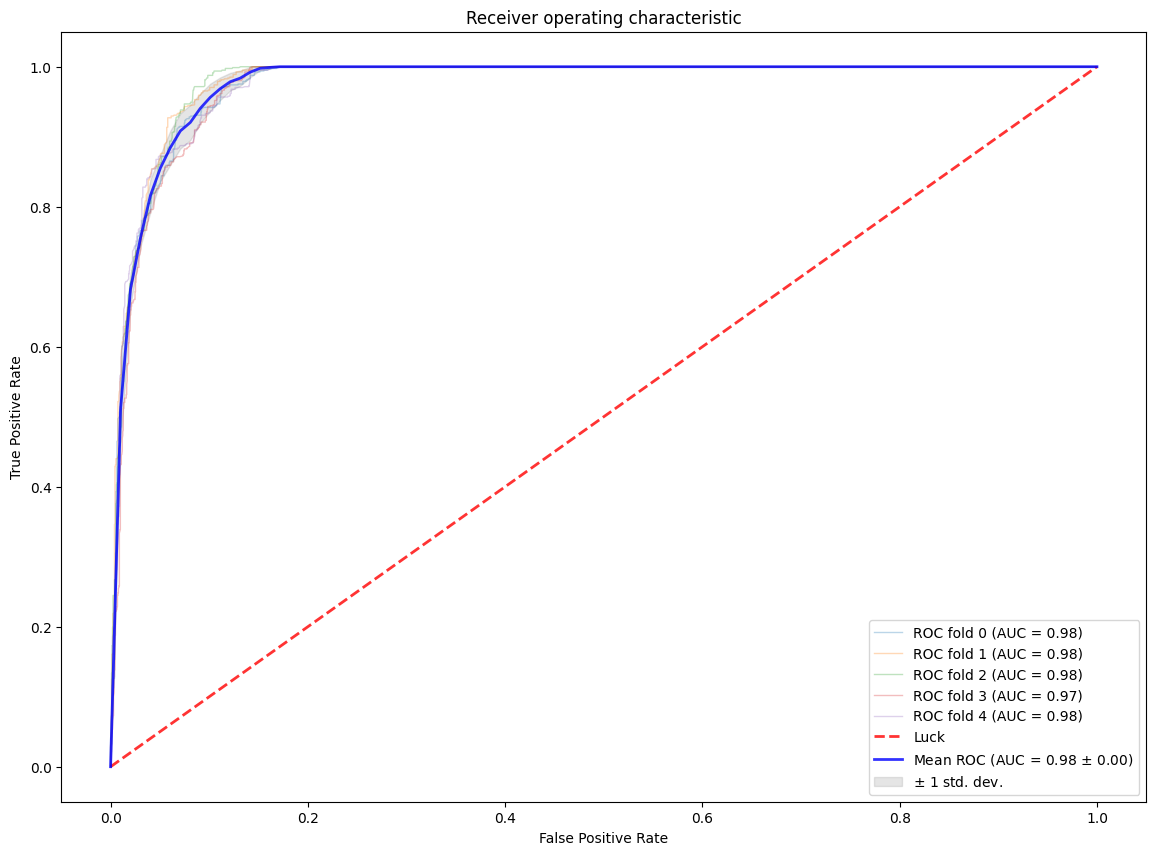

Accaracy list :  [0.9197596323789324, 0.9264757864969954, 0.9229409685401202, 0.9186991869918699, 0.9232673267326733]
equal opportunity for tpr :  [0.04447835840105907, 0.004553233101087906, 0.0020983213429256464, 0.09530736227065484, 0.009855839952927381]
equal opportunity for fpr :  [0.05219814186802317, 0.036978290679577155, 0.05700386954118297, 0.05123675486454745, 0.03359666860883573]
odds difference list :  [0.04833825013454112, 0.02076576189033253, 0.02955109544205431, 0.07327205856760115, 0.021726254280881555]
The mean accuracy is  0.922 ± 0.003
The mean equal opportunity for tpr: (close to 0) 0.031 ± 0.035
The mean equal opportunity for fpr: (close to 0) 0.046 ± 0.009
The mean odds difference: (close to 0) 0.039 ± 0.020
The mean parity difference: (close to 0) 0.029 ± 0.018
The mean disperate impact: (close to 1) 1.000 ± 0.000
End Of Trial Number: 145
---------------------------------------------------------------------------------------------------
Trial Number: 106
Values (O

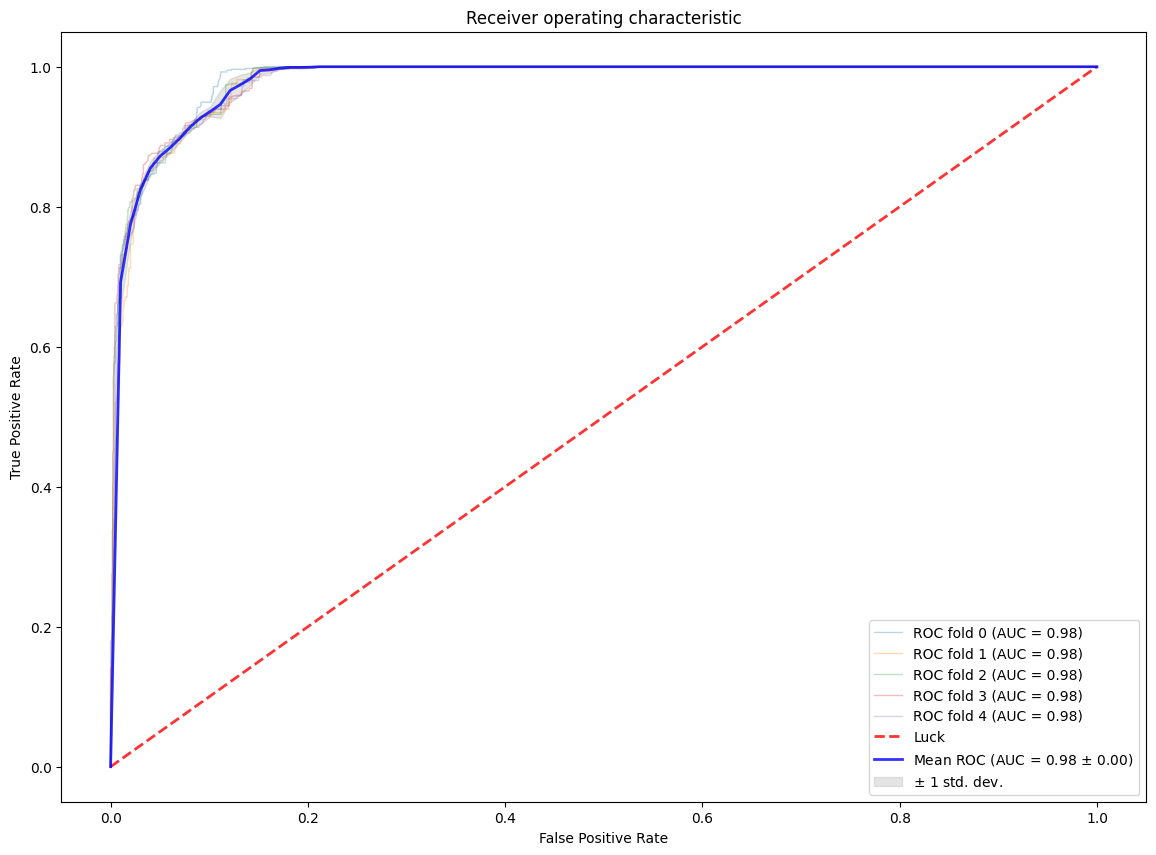

Accaracy list :  [0.9269769201664775, 0.9174867524602573, 0.9227857683573051, 0.9269492808478426, 0.9239212717638153]
equal opportunity for tpr :  [0.02041827187671985, 0.024200815275691845, 0.03680929095354524, 0.06121950026893541, 0.039842317565089824]
equal opportunity for fpr :  [0.06104830794954746, 0.03787077248171315, 0.05834725038768938, 0.02061191626409018, 0.0762719503332338]
odds difference list :  [0.04073328991313366, 0.0310357938787025, 0.047578270670617304, 0.04091570826651279, 0.058057133949161815]
The mean accuracy is  0.924 ± 0.003
The mean equal opportunity for tpr: (close to 0) 0.036 ± 0.014
The mean equal opportunity for fpr: (close to 0) 0.051 ± 0.019
The mean odds difference: (close to 0) 0.044 ± 0.009
The mean parity difference: (close to 0) 0.023 ± 0.016
The mean disperate impact: (close to 1) 1.000 ± 0.000
End Of Trial Number: 106
---------------------------------------------------------------------------------------------------
Trial Number: 26
Values (Object

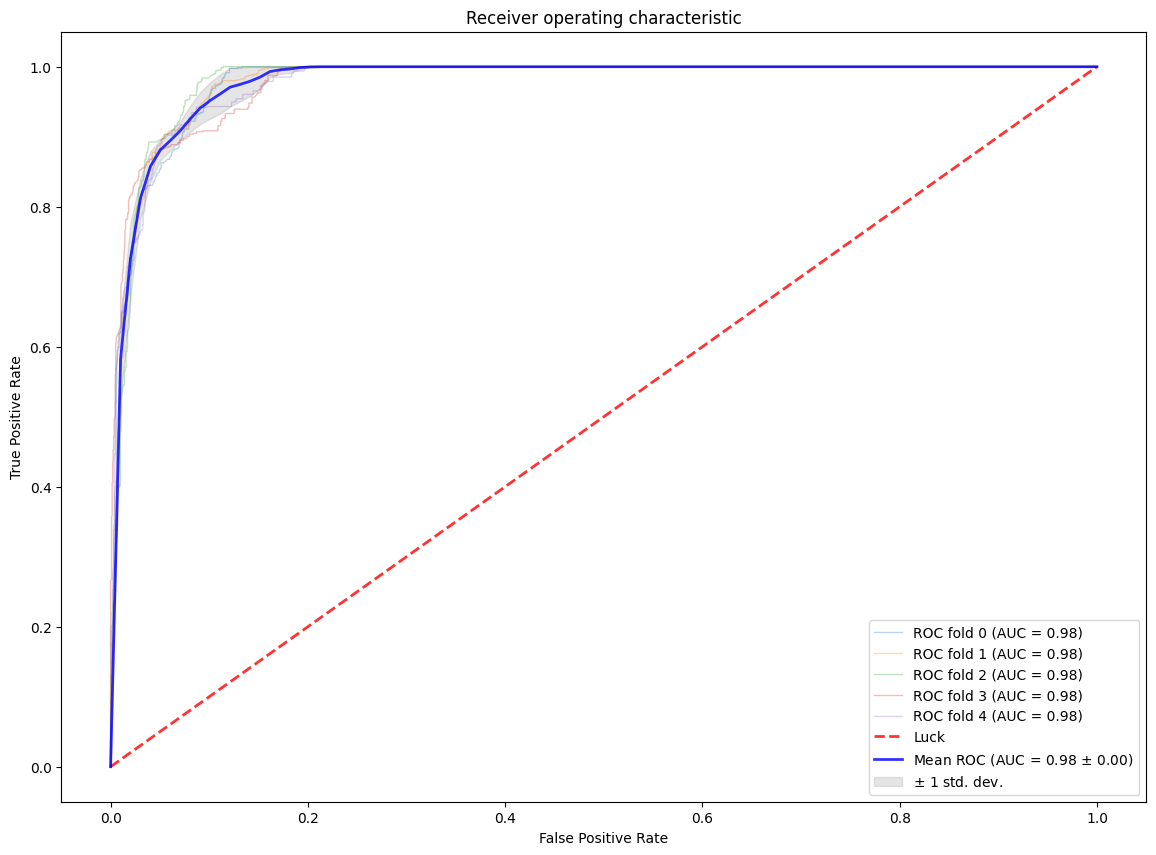

Accaracy list :  [0.9207920792079208, 0.9321598826549322, 0.9284928492849285, 0.9343360234776229, 0.9262655906089509]
equal opportunity for tpr :  [0.02558068459657703, 0.04331228894435479, 0.024141388206238013, 0.11280228031998041, 0.056136855358212445]
equal opportunity for fpr :  [0.06163921382016467, 0.05878591831715945, 0.08448748522277934, 0.03408050971653545, 0.06607397774240081]
odds difference list :  [0.04360994920837085, 0.051049103630757126, 0.054314436714508675, 0.07344139501825793, 0.06110541655030663]
The mean accuracy is  0.928 ± 0.005
The mean equal opportunity for tpr: (close to 0) 0.052 ± 0.032
The mean equal opportunity for fpr: (close to 0) 0.061 ± 0.016
The mean odds difference: (close to 0) 0.057 ± 0.010
The mean parity difference: (close to 0) 0.040 ± 0.011
The mean disperate impact: (close to 1) 1.000 ± 0.000
End Of Trial Number: 26
---------------------------------------------------------------------------------------------------
Trial Number: 112
Values (Obje

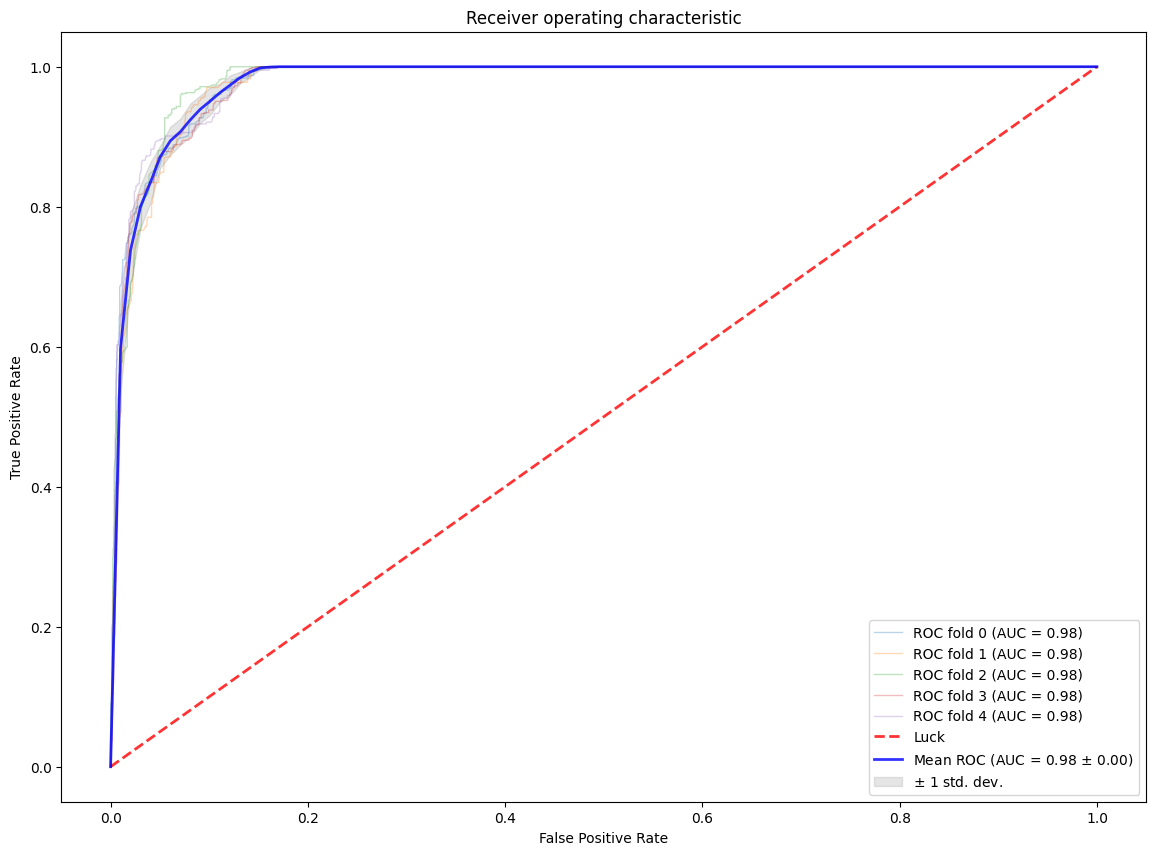

Accaracy list :  [0.9242753623188406, 0.9184782608695652, 0.928623188405797, 0.9166666666666666, 0.9253352664008698]
equal opportunity for tpr :  [0.09307486336793458, 0.021180326265072047, 0.028469206776343903, 0.01817637132865413, 0.028797095761381564]
equal opportunity for fpr :  [0.06349981279319888, 0.03693745028906537, 0.07218097595025065, 0.05439624115997571, 0.04637644112767131]
odds difference list :  [0.07828733808056673, 0.02905888827706871, 0.05032509136329728, 0.03628630624431492, 0.037586768444526436]
The mean accuracy is  0.923 ± 0.004
The mean equal opportunity for tpr: (close to 0) 0.038 ± 0.028
The mean equal opportunity for fpr: (close to 0) 0.055 ± 0.012
The mean odds difference: (close to 0) 0.046 ± 0.017
The mean parity difference: (close to 0) 0.027 ± 0.026
The mean disperate impact: (close to 1) 1.000 ± 0.000
End Of Trial Number: 112
---------------------------------------------------------------------------------------------------
Trial Number: 114
Values (Obje

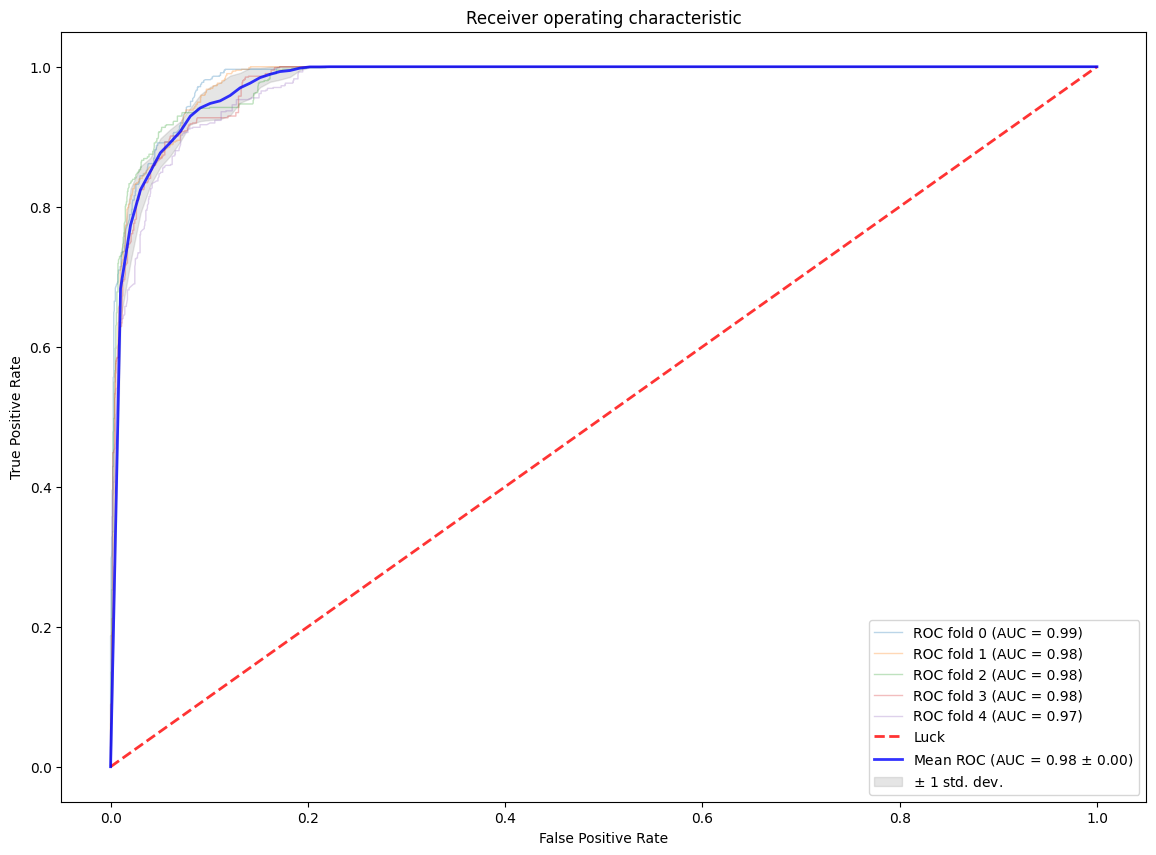

Accaracy list :  [0.9254843517138599, 0.9273472429210134, 0.9366380916884085, 0.9239657100260902, 0.9142750652254938]
equal opportunity for tpr :  [0.016354454525445705, 0.0016196657987702645, 0.08034581850043199, 0.11592766603044091, 0.03099822727550583]
equal opportunity for fpr :  [0.05543400016502448, 0.07570047070758859, 0.06567874626348395, 0.053813067617240966, 0.03961696707810698]
odds difference list :  [0.03589422734523509, 0.03866006825317943, 0.07301228238195798, 0.08487036682384094, 0.035307597176806406]
The mean accuracy is  0.926 ± 0.007
The mean equal opportunity for tpr: (close to 0) 0.049 ± 0.043
The mean equal opportunity for fpr: (close to 0) 0.058 ± 0.012
The mean odds difference: (close to 0) 0.054 ± 0.021
The mean parity difference: (close to 0) 0.027 ± 0.014
The mean disperate impact: (close to 1) 1.000 ± 0.000
End Of Trial Number: 114
---------------------------------------------------------------------------------------------------
Trial Number: 93
Values (Obj

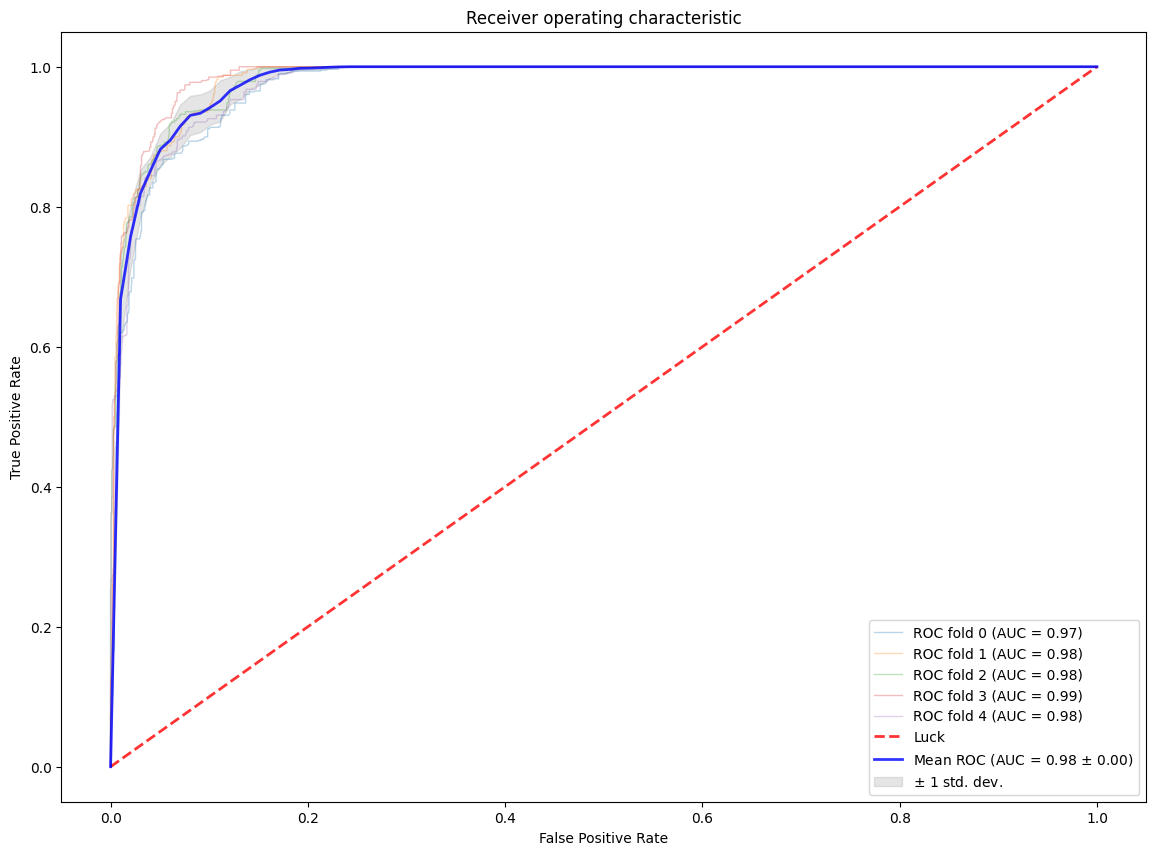

Accaracy list :  [0.9113394216133942, 0.9295774647887324, 0.9311001141987058, 0.9390940236010659, 0.9231062047963456]
equal opportunity for tpr :  [0.03404478998581972, 0.08057359970584632, 0.08630363036303623, 0.0663300899577749, 0.07935138970444311]
equal opportunity for fpr :  [0.08988042219994602, 0.04712509476876422, 0.05115934060075821, 0.04840670100730068, 0.06248160661102544]
odds difference list :  [0.06196260609288287, 0.06384934723730527, 0.06873148548189723, 0.05736839548253779, 0.07091649815773428]
The mean accuracy is  0.927 ± 0.009
The mean equal opportunity for tpr: (close to 0) 0.069 ± 0.019
The mean equal opportunity for fpr: (close to 0) 0.060 ± 0.016
The mean odds difference: (close to 0) 0.065 ± 0.005
The mean parity difference: (close to 0) 0.029 ± 0.015
The mean disperate impact: (close to 1) 1.000 ± 0.000
End Of Trial Number: 93
---------------------------------------------------------------------------------------------------
Trial Number: 25
Values (Objectives

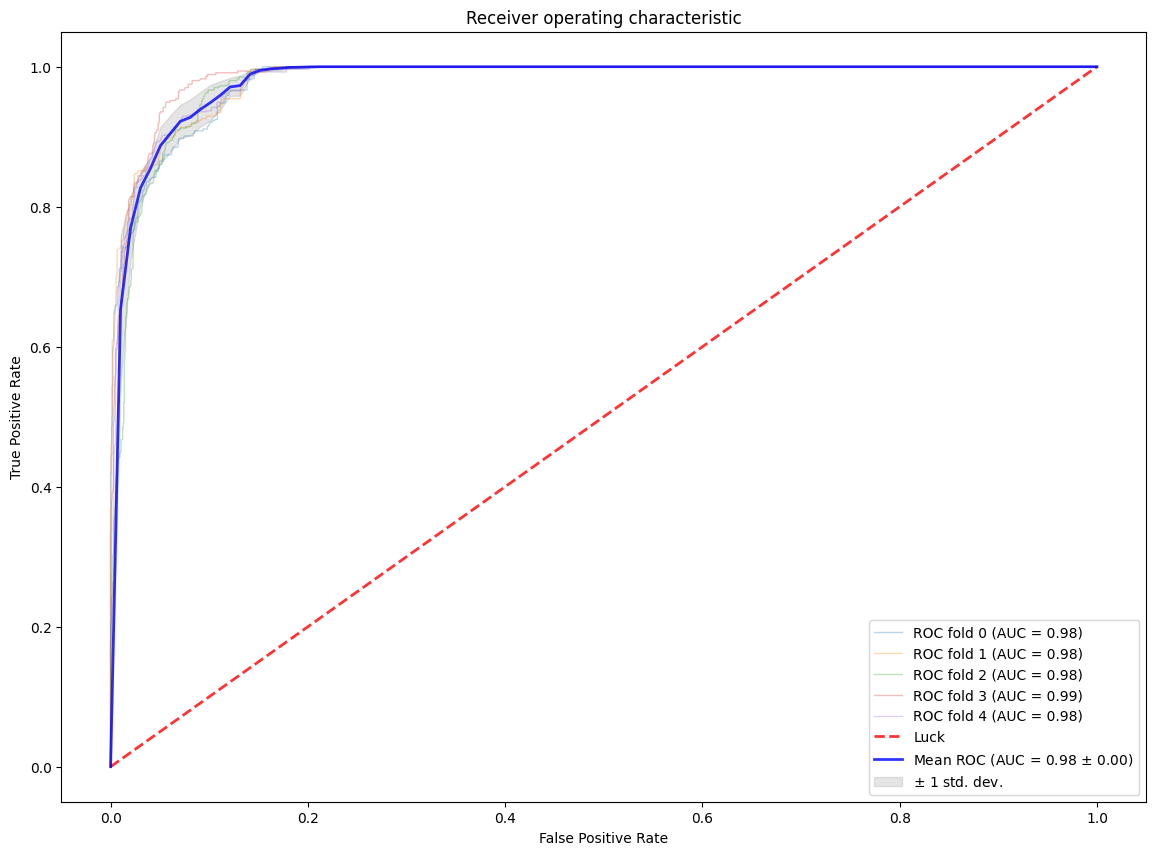

Accaracy list :  [0.9218390804597701, 0.9295019157088122, 0.9252873563218391, 0.9451897278650824, 0.9333077807589114]
equal opportunity for tpr :  [0.053583434180449085, 0.07959879712483497, 0.07404034229828849, 0.09178360901608607, 0.0644864287555702]
equal opportunity for fpr :  [0.0016813746765041576, 0.07613532127920897, 0.08232553958566756, 0.09133346210804198, 0.03991099320404391]
odds difference list :  [0.02763240442847662, 0.07786705920202197, 0.07818294094197803, 0.09155853556206403, 0.05219871097980706]
The mean accuracy is  0.931 ± 0.008
The mean equal opportunity for tpr: (close to 0) 0.073 ± 0.013
The mean equal opportunity for fpr: (close to 0) 0.058 ± 0.033
The mean odds difference: (close to 0) 0.065 ± 0.023
The mean parity difference: (close to 0) 0.056 ± 0.032
The mean disperate impact: (close to 1) 1.000 ± 0.000
End Of Trial Number: 25
---------------------------------------------------------------------------------------------------
Trial Number: 79
Values (Objecti

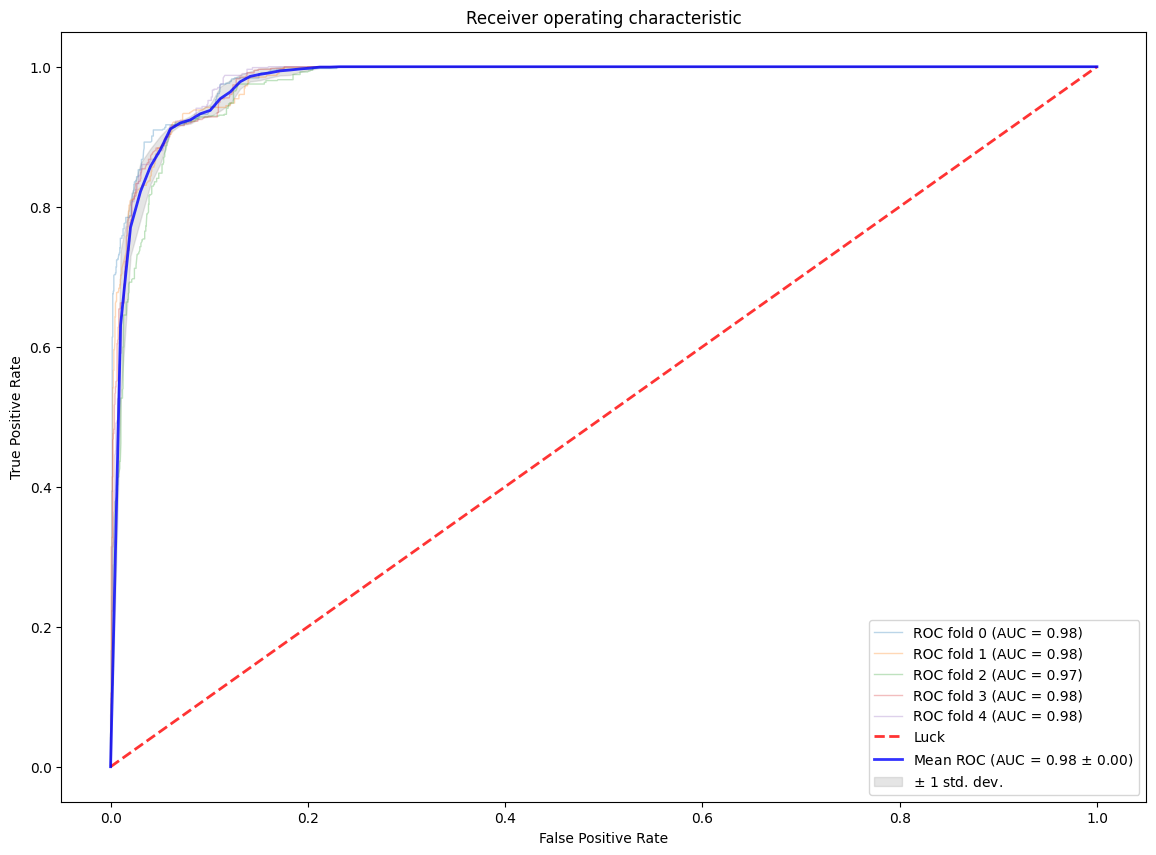

Accaracy list :  [0.9346256176358799, 0.928164196123147, 0.9293044469783353, 0.9327251995438997, 0.927023945267959]
equal opportunity for tpr :  [0.09672754013972296, 0.022154956277135707, 0.06278421593076133, 0.11094609460946103, 0.016721283411997745]
equal opportunity for fpr :  [0.06756284434469881, 0.0386142208774584, 0.09142208774583964, 0.04460907279334193, 0.03685834879392745]
odds difference list :  [0.08214519224221088, 0.030384588577297054, 0.0771031518383005, 0.07777758370140148, 0.026789816102962598]
The mean accuracy is  0.930 ± 0.003
The mean equal opportunity for tpr: (close to 0) 0.062 ± 0.038
The mean equal opportunity for fpr: (close to 0) 0.056 ± 0.021
The mean odds difference: (close to 0) 0.059 ± 0.025
The mean parity difference: (close to 0) 0.038 ± 0.018
The mean disperate impact: (close to 1) 1.000 ± 0.000
End Of Trial Number: 79
---------------------------------------------------------------------------------------------------
Trial Number: 190
Values (Objectiv

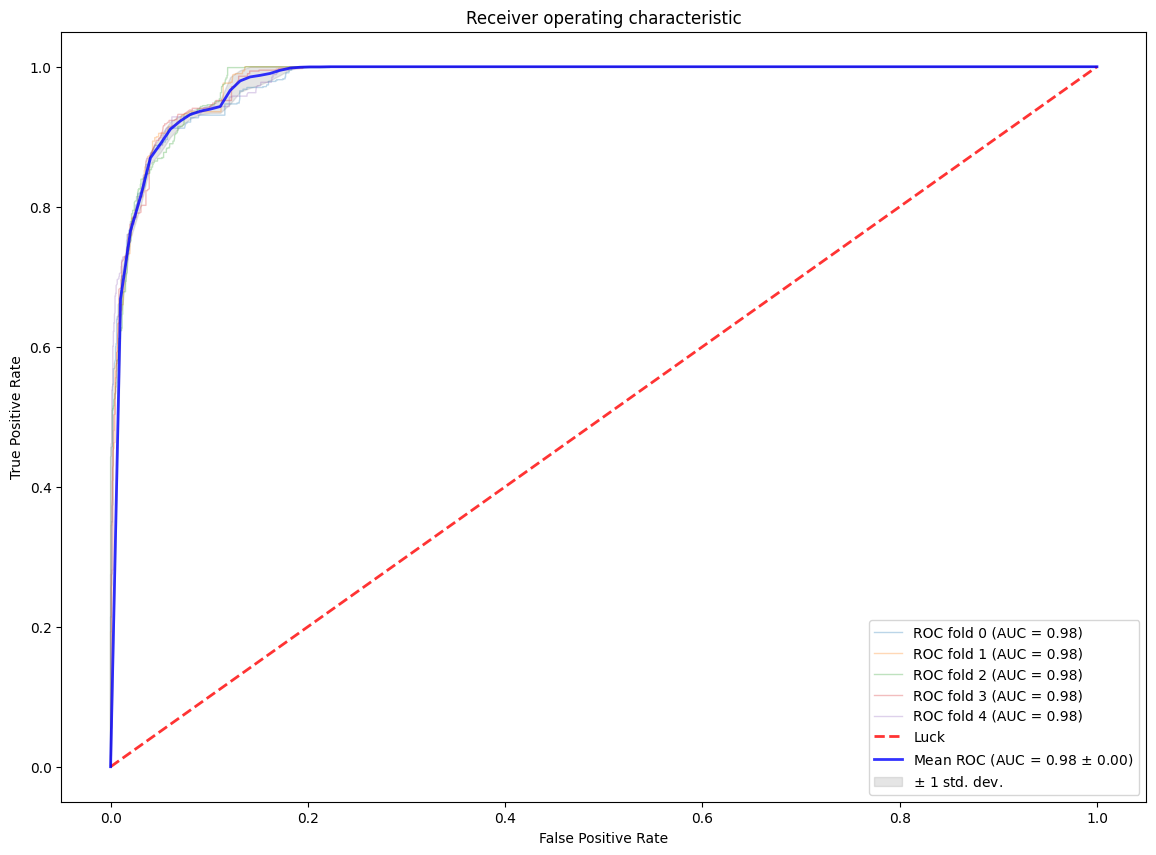

Accaracy list :  [0.9283513097072419, 0.9329738058551618, 0.922573189522342, 0.9341040462427745, 0.933718689788054]
equal opportunity for tpr :  [0.09940064827839268, 0.06181281680828654, 0.054651020657621285, 0.09454054717212612, 0.09097023503803159]
equal opportunity for fpr :  [0.0397876337498979, 0.04606386392811297, 0.0782663861898561, 0.041289211772321185, 0.10552704023875681]
odds difference list :  [0.0695941410141453, 0.05393834036819976, 0.06645870342373869, 0.06791487947222366, 0.0982486376383942]
The mean accuracy is  0.930 ± 0.004
The mean equal opportunity for tpr: (close to 0) 0.080 ± 0.018
The mean equal opportunity for fpr: (close to 0) 0.062 ± 0.026
The mean odds difference: (close to 0) 0.071 ± 0.015
The mean parity difference: (close to 0) 0.034 ± 0.016
The mean disperate impact: (close to 1) 1.000 ± 0.000
End Of Trial Number: 190
---------------------------------------------------------------------------------------------------
Trial Number: 86
Values (Objectives):

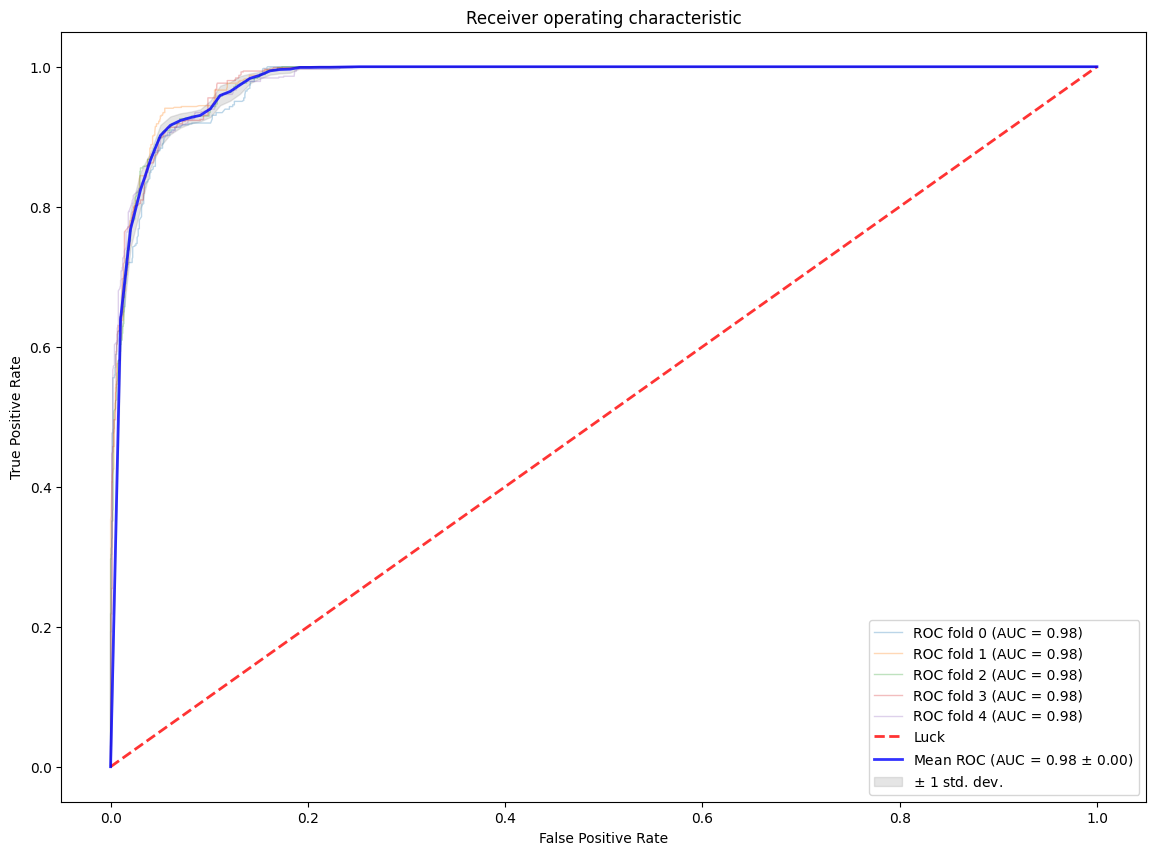

Accaracy list :  [0.9309679907443116, 0.9433089086000771, 0.9332819128422677, 0.9298110296953336, 0.9325106054762823]
equal opportunity for tpr :  [0.10206934608663665, 0.09861095799801567, 0.09257154033273429, 0.08656365550848488, 0.08325080389783468]
equal opportunity for fpr :  [0.03418779613476549, 0.07486965251465397, 0.049004975124378104, 0.061798175821859015, 0.06317741083665873]
odds difference list :  [0.06812857111070107, 0.08674030525633482, 0.0707882577285562, 0.07418091566517195, 0.0732141073672467]
The mean accuracy is  0.934 ± 0.005
The mean equal opportunity for tpr: (close to 0) 0.093 ± 0.007
The mean equal opportunity for fpr: (close to 0) 0.057 ± 0.014
The mean odds difference: (close to 0) 0.075 ± 0.006
The mean parity difference: (close to 0) 0.039 ± 0.023
The mean disperate impact: (close to 1) 1.000 ± 0.000
End Of Trial Number: 86
---------------------------------------------------------------------------------------------------


In [ ]:
# Record the end time
end_time = time.time()
# Calculate the elapsed time in minutes
elapsed_time_minutes = (end_time - start_time) / 60

pareto_front_trials = study.best_trials
pareto_front_trials = sorted(pareto_front_trials, key=lambda trial: trial.values[0])


trail_list = []
fairness_values_list = []

acc_values_list = []
growth_list = []

# Process each trial in the Pareto front
for trial in pareto_front_trials:
   trail_list.append(trial.number)
   fairness_values_list.append(trial.values[0])
   acc_values_list.append(trial.values[1])

   lambda1 = trial.params['lambda_0']
   lambda2 = trial.params['lambda_1']
   upsampled_df = Upsampling_Dataset(lambda1,lambda2)
   growth_list.append((len(upsampled_df) - len(orig_data))/ len(orig_data) * 100 )

   print("Trial Number:", trial.number)
   print("Values (Objectives):", trial.values)
   print("Parameters:", trial.params)
   print("Dataset Growth Percent :", (len(upsampled_df) - len(orig_data))/ len(orig_data) * 100)
   print('---------------------------------------------------------------------------------------------------')
   y_debias = upsampled_df[TARGET_COL]
   upsampled_df_features = upsampled_df.loc[:, feature_columns]
   upsampled_acc ,upsampled_op_diff, upsampled_op_diff_fpr, upsampled_od_diff, upsampled_par_diff , upsampled_dis_impact  = fairness_metrics_roc_auc_std(upsampled_df_features, y_debias )

   print("End Of Trial Number:", trial.number)
   print('---------------------------------------------------------------------------------------------------')



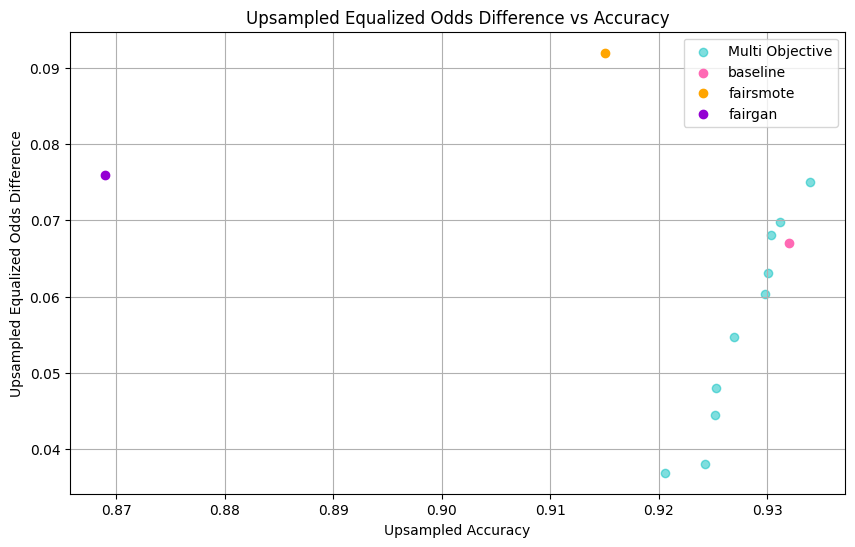

In [ ]:
import matplotlib.pyplot as plt

# Plot upsampled_op_diff against upsampled_acc
plt.figure(figsize=(10, 6))
plt.scatter(acc_values_list,fairness_values_list, alpha=0.5,color = 'c', label = 'Multi Objective')

# Add the three additional points
plt.scatter(0.932, 0.067, color='hotpink', label='baseline')  # Baseline point
plt.scatter(0.915, 0.092, color='orange', label='fairsmote')  # Fairsmote point
plt.scatter(0.869, 0.076, color='darkviolet', label='fairgan')  # Fairgan point

plt.xlabel('Upsampled Accuracy')
plt.ylabel('Upsampled Equalized Odds Difference')
plt.title('Upsampled Equalized Odds Difference vs Accuracy')
plt.grid(True)
plt.legend()  # Show legend with labels
plt.show()

conf matrix:
  [[1695   89]
 [  73  735]] 
accuracy:  0.9375 precision:  0.8919902912621359 recall:  0.9096534653465347 fpr:  0.04988789237668161 tpr:  0.9096534653465347 fn+fp 162
conf matrix:
  [[1282   44]
 [  53  339]] 
accuracy:  0.9435389988358557 precision:  0.8851174934725848 recall:  0.8647959183673469 fpr:  0.033182503770739065 tpr:  0.8647959183673469 fn+fp 97
conf matrix:
  [[413  45]
 [ 20 396]] 
accuracy:  0.9256292906178489 precision:  0.8979591836734694 recall:  0.9519230769230769 fpr:  0.0982532751091703 tpr:  0.9519230769230769 fn+fp 65
conf matrix:
  [[1691   92]
 [  74  735]] 
accuracy:  0.9359567901234568 precision:  0.8887545344619106 recall:  0.9085290482076638 fpr:  0.051598429613011774 tpr:  0.9085290482076638 fn+fp 166
conf matrix:
  [[1259   55]
 [  56  367]] 
accuracy:  0.9360967184801382 precision:  0.8696682464454977 recall:  0.8676122931442081 fpr:  0.04185692541856925 tpr:  0.8676122931442081 fn+fp 111
conf matrix:
  [[432  37]
 [ 18 368]] 
accuracy:  0.

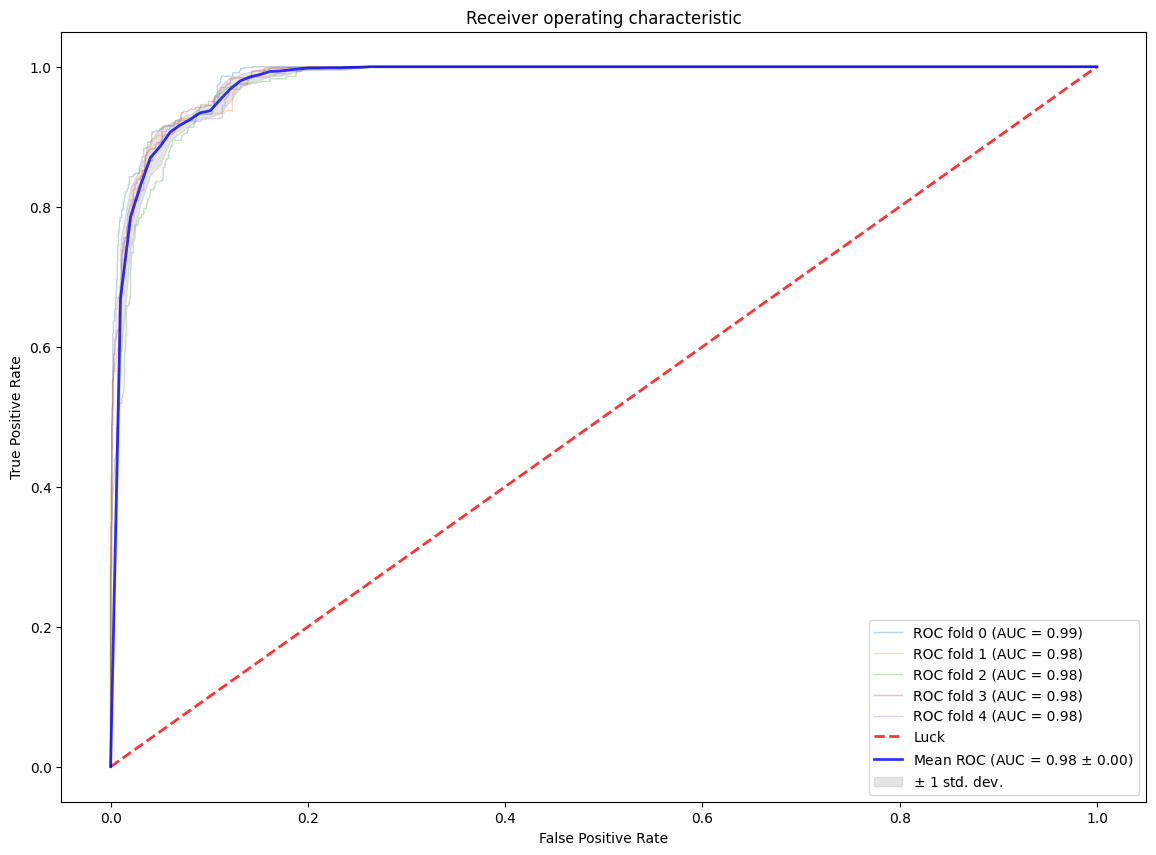

Accaracy list :  [0.9375, 0.9359567901234568, 0.9189814814814815, 0.9317129629629629, 0.933641975308642]
equal opportunity for tpr :  [0.08712715855572994, 0.08575558250346027, 0.02741442542787287, 0.051650366748166254, 0.12909437699446136]
equal opportunity for fpr :  [0.06507077133843123, 0.03703433257716636, 0.06398109062933383, 0.07287988663832624, 0.051213865799146996]
odds difference list :  [0.07609896494708059, 0.061394957540313315, 0.04569775802860335, 0.06226512669324625, 0.09015412139680418]
The mean accuracy is  0.932 ± 0.007
The mean equal opportunity for tpr: (close to 0) 0.076 ± 0.035
The mean equal opportunity for fpr: (close to 0) 0.058 ± 0.013
The mean odds difference: (close to 0) 0.067 ± 0.015
The mean parity difference: (close to 0) 0.043 ± 0.021
The mean disperate impact: (close to 1) 1.000 ± 0.000


In [ ]:
orig_acc ,orig_op_diff, orig_op_diff_fpr, orig_od_diff, orig_par_diff , orig_dis_impact  = fairness_metrics_roc_auc(orig_data_encoded, y_orig )

In [ ]:
print('Running time is: ',elapsed_time_minutes)

Running time is:  5.2859693964322405
